In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""
%load_ext autoreload
%autoreload 2

# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gym
import torch
torch.cuda.set_device('cuda:3')

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity, AgentWrapper, ActionTrackingStateAugmentation

from matplotlib import pyplot as plt
logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [18]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v1"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [19]:
# Parameters
gymid = "CyberBattleToyCtf-v1"
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10

reload = False


In [20]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [21]:
debugging = True
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    print(fe_example.encode_at(a, 0))

port_count = 7, property_count = 10
1


###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 12|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 12|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 1|Iteration 21|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 1|Iteration 21|reward:   22.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 1|Iteration 22|reward:   31.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 1|Iteration 30|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 1|Iteration 30|reward:   42.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 1|Iteration 41|reward:   56.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 1|Iteration 41|reward:   56.0|last_reward_at:   41|Elapsed Time: 0:00:00||
Episod

    + t=12 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=21 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=22 explore r=9.0 cum_reward:31.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=30 explore r=11.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=1  
    + t=41 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=2  
    + t=46 explore r=6.0 cum_reward:62.0 a=None-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=2  
    + t=78 exploit r=50.0 cum_reward:112.0 a=None-{'connect': array([0, 4, 1, 1], dtype=int32)} creds=2  
    + t=108 explore r=11.0 cum_reward:123.0 a=None-{'remote_vulnerability': array([4, 2, 3], dtype=int32)} creds=2  
    + t=116 explore r=14.0 cum_reward:137.0 a=None-{'remote_vulnerability': array([0, 5, 7], 

Episode 1|Iteration 120|reward:  187.0|last_reward_at:  116|Elapsed Time: 0:00:00||
Episode 1|Iteration 120|reward:  187.0|last_reward_at:  120|Elapsed Time: 0:00:00||


    + t=120 exploit r=50.0 cum_reward:187.0 a=None-{'connect': array([4, 6, 1, 2], dtype=int32)} creds=3  


Episode 1|Iteration 152|reward:  187.0|last_reward_at:  120|Elapsed Time: 0:00:00||
Episode 1|Iteration 188|reward:  187.0|last_reward_at:  120|Elapsed Time: 0:00:00||
Episode 1|Iteration 209|reward:  187.0|last_reward_at:  120|Elapsed Time: 0:00:00||
Episode 1|Iteration 228|reward:  187.0|last_reward_at:  120|Elapsed Time: 0:00:00||
Episode 1|Iteration 241|reward:  198.0|last_reward_at:  120|Elapsed Time: 0:00:00||
Episode 1|Iteration 241|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:00||
Episode 1|Iteration 266|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:00||
Episode 1|Iteration 304|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:00||


    + t=241 explore r=11.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  


Episode 1|Iteration 323|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:00||
Episode 1|Iteration 361|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:00||
Episode 1|Iteration 393|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 415|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 437|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 474|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 494|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 513|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 551|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 570|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 589|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:00:01||
Episode 1|Iteration 608|reward:  198.0|last_reward_at:  241|Elapsed Time: 0:

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/136 (0.01)
    explore-remote: 8/1121 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/232 (0.01)
  exploit deflected to exploration: 3
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7886, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 17|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 2|Iteration 55|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 2|Iteration 55|reward:   36.0|last_reward_at:   55|Elapsed Time: 0:00:00||
Episode 2|Iteration 56|reward:   86.0|last_reward_at:   55|Elapsed Time: 0:00:00||
Episode 2|Iteration 56|reward:   86.0|last_reward_at:   56|Elapsed Time: 0:00:00||
Episode 2|Iteration 60|reward:   97.0|last_reward_at:   56|Elapsed Time: 0:00:00||
Episode 2|Iteration 60|reward:   97.0|last_reward_at:   60|Elapsed Time: 0:00:00||
Episode 

    + t=3 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=17 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=55 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=56 exploit r=50.0 cum_reward:86.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=60 explore r=11.0 cum_reward:97.0 a=None-{'remote_vulnerability': array([3, 1, 6], dtype=int32)} creds=1  
    + t=75 explore r=11.0 cum_reward:108.0 a=None-{'remote_vulnerability': array([0, 4, 3], dtype=int32)} creds=1  
    + t=78 explore r=14.0 cum_reward:122.0 a=None-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=2  
    + t=87 exploit r=50.0 cum_reward:172.0 a=None-{'connect': array([3, 6, 1, 1], dtype=int32)} creds=2  


Episode 2|Iteration 114|reward:  172.0|last_reward_at:   87|Elapsed Time: 0:00:00||
Episode 2|Iteration 121|reward:  178.0|last_reward_at:   87|Elapsed Time: 0:00:00||
Episode 2|Iteration 121|reward:  178.0|last_reward_at:  121|Elapsed Time: 0:00:00||
Episode 2|Iteration 152|reward:  178.0|last_reward_at:  121|Elapsed Time: 0:00:00||
Episode 2|Iteration 178|reward:  187.0|last_reward_at:  121|Elapsed Time: 0:00:00||
Episode 2|Iteration 178|reward:  187.0|last_reward_at:  178|Elapsed Time: 0:00:00||


    + t=121 explore r=6.0 cum_reward:178.0 a=None-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=2  
    + t=178 explore r=9.0 cum_reward:187.0 a=None-{'remote_vulnerability': array([6, 4, 4], dtype=int32)} creds=3  


Episode 2|Iteration 209|reward:  187.0|last_reward_at:  178|Elapsed Time: 0:00:00||
Episode 2|Iteration 231|reward:  198.0|last_reward_at:  178|Elapsed Time: 0:00:00||
Episode 2|Iteration 231|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:00||
Episode 2|Iteration 266|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:00||
Episode 2|Iteration 285|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:00||
Episode 2|Iteration 304|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:00||


    + t=231 explore r=11.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  


Episode 2|Iteration 323|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:00||
Episode 2|Iteration 342|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:00||
Episode 2|Iteration 361|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:00||
Episode 2|Iteration 380|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:00||
Episode 2|Iteration 418|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:01||
Episode 2|Iteration 437|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:01||
Episode 2|Iteration 456|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:01||
Episode 2|Iteration 494|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:01||
Episode 2|Iteration 513|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:01||
Episode 2|Iteration 531|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:01||
Episode 2|Iteration 546|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:00:01||
Episode 2|Iteration 570|reward:  198.0|last_reward_at:  231|Elapsed Time: 0:

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/118 (0.01)
    explore-remote: 8/1011 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/360 (0.01)
  exploit deflected to exploration: 41
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6927, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 3|Iteration 23|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 3|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 3|Iteration 72|reward:   47.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 3|Iteration 72|reward:   47.0|last_reward_at:   72|Elapsed Time: 0:00:00||
Episode 3|Iteration 78|reward:   97.0|last_reward_at:   72|Elapsed Time: 0:00:00||
Episode 3|Iteration 78|reward:   97.0|last_reward_at:   78|Elapsed Time: 0:00:00||
Episode 

    + t=7 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=15 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=23 exploit[undefined]->explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=0  
    + t=72 explore r=14.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 3, 7], dtype=int32)} creds=1  
    + t=78 exploit r=50.0 cum_reward:97.0 a=None-{'connect': array([0, 4, 1, 0], dtype=int32)} creds=1  
    + t=82 explore r=9.0 cum_reward:106.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=2  
    + t=90 explore r=11.0 cum_reward:117.0 a=None-{'remote_vulnerability': array([0, 4, 2], dtype=int32)} creds=2  


Episode 3|Iteration 133|reward:  117.0|last_reward_at:   90|Elapsed Time: 0:00:00||
Episode 3|Iteration 171|reward:  117.0|last_reward_at:   90|Elapsed Time: 0:00:00||
Episode 3|Iteration 209|reward:  117.0|last_reward_at:   90|Elapsed Time: 0:00:00||
Episode 3|Iteration 215|reward:  128.0|last_reward_at:   90|Elapsed Time: 0:00:00||
Episode 3|Iteration 215|reward:  128.0|last_reward_at:  215|Elapsed Time: 0:00:00||
Episode 3|Iteration 247|reward:  128.0|last_reward_at:  215|Elapsed Time: 0:00:00||
Episode 3|Iteration 285|reward:  128.0|last_reward_at:  215|Elapsed Time: 0:00:00||


    + t=215 explore r=11.0 cum_reward:128.0 a=None-{'remote_vulnerability': array([4, 1, 5], dtype=int32)} creds=2  


Episode 3|Iteration 323|reward:  128.0|last_reward_at:  215|Elapsed Time: 0:00:00||
Episode 3|Iteration 342|reward:  128.0|last_reward_at:  215|Elapsed Time: 0:00:00||
Episode 3|Iteration 361|reward:  128.0|last_reward_at:  215|Elapsed Time: 0:00:00||
Episode 3|Iteration 380|reward:  128.0|last_reward_at:  215|Elapsed Time: 0:00:00||
Episode 3|Iteration 399|reward:  128.0|last_reward_at:  215|Elapsed Time: 0:00:00||
Episode 3|Iteration 403|reward:  142.0|last_reward_at:  215|Elapsed Time: 0:00:00||
Episode 3|Iteration 403|reward:  142.0|last_reward_at:  403|Elapsed Time: 0:00:00||
Episode 3|Iteration 407|reward:  192.0|last_reward_at:  403|Elapsed Time: 0:00:00||
Episode 3|Iteration 407|reward:  192.0|last_reward_at:  407|Elapsed Time: 0:00:00||
Episode 3|Iteration 437|reward:  192.0|last_reward_at:  407|Elapsed Time: 0:00:01||
Episode 3|Iteration 456|reward:  192.0|last_reward_at:  407|Elapsed Time: 0:00:01||


    + t=403 explore r=14.0 cum_reward:142.0 a=None-{'remote_vulnerability': array([4, 6, 1], dtype=int32)} creds=3  
    + t=407 exploit r=50.0 cum_reward:192.0 a=None-{'connect': array([4, 7, 1, 2], dtype=int32)} creds=3  


Episode 3|Iteration 475|reward:  192.0|last_reward_at:  407|Elapsed Time: 0:00:01||
Episode 3|Iteration 494|reward:  192.0|last_reward_at:  407|Elapsed Time: 0:00:01||
Episode 3|Iteration 513|reward:  192.0|last_reward_at:  407|Elapsed Time: 0:00:01||
Episode 3|Iteration 551|reward:  192.0|last_reward_at:  407|Elapsed Time: 0:00:01||
Episode 3|Iteration 551|reward:  198.0|last_reward_at:  407|Elapsed Time: 0:00:01||
Episode 3|Iteration 551|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:01||
Episode 3|Iteration 589|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:01||
Episode 3|Iteration 627|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:01||


    + t=551 explore r=6.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([7, 7, 0], dtype=int32)} creds=3  


Episode 3|Iteration 660|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:01||
Episode 3|Iteration 684|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:01||
Episode 3|Iteration 722|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:01||
Episode 3|Iteration 760|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:01||
Episode 3|Iteration 779|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:01||
Episode 3|Iteration 817|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:02||
Episode 3|Iteration 855|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:02||
Episode 3|Iteration 893|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:02||
Episode 3|Iteration 931|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:02||
Episode 3|Iteration 969|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:02||
Episode 3|Iteration 1007|reward:  198.0|last_reward_at:  551|Elapsed Time: 0:00:02||
Episode 3|Iteration 1026|reward:  198.0|last_reward_at:  551|Elapsed Time: 

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/128 (0.01)
    explore-remote: 8/843 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/518 (0.00)
  exploit deflected to exploration: 27
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.6102, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iteration 14|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 4|Iteration 28|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 4|Iteration 28|reward:   44.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 4|Iteration 31|reward:   58.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 4|Iteration 31|reward:   58.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 4|

    + t=2 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=9 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=14 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=28 explore r=11.0 cum_reward:44.0 a=None-{'remote_vulnerability': array([0, 3, 3], dtype=int32)} creds=0  
    + t=31 exploit[undefined]->explore r=14.0 cum_reward:58.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=32 exploit r=50.0 cum_reward:108.0 a=None-{'connect': array([0, 5, 1, 0], dtype=int32)} creds=1  
    + t=36 explore r=9.0 cum_reward:117.0 a=None-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=2  


Episode 4|Iteration 83|reward:  123.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 4|Iteration 83|reward:  123.0|last_reward_at:   83|Elapsed Time: 0:00:00||


    + t=83 explore r=6.0 cum_reward:123.0 a=None-{'remote_vulnerability': array([0, 5, 0], dtype=int32)} creds=2  


Episode 4|Iteration 94|reward:  137.0|last_reward_at:   83|Elapsed Time: 0:00:00||
Episode 4|Iteration 94|reward:  137.0|last_reward_at:   94|Elapsed Time: 0:00:00||
Episode 4|Iteration 97|reward:  148.0|last_reward_at:   94|Elapsed Time: 0:00:00||
Episode 4|Iteration 97|reward:  148.0|last_reward_at:   97|Elapsed Time: 0:00:00||
Episode 4|Iteration 99|reward:  198.0|last_reward_at:   97|Elapsed Time: 0:00:00||
Episode 4|Iteration 99|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 114|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||


    + t=94 explore r=14.0 cum_reward:137.0 a=None-{'remote_vulnerability': array([0, 4, 7], dtype=int32)} creds=3  
    + t=97 explore r=11.0 cum_reward:148.0 a=None-{'remote_vulnerability': array([5, 6, 2], dtype=int32)} creds=3  
    + t=99 exploit r=50.0 cum_reward:198.0 a=None-{'connect': array([5, 6, 1, 2], dtype=int32)} creds=3  


Episode 4|Iteration 133|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 171|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 209|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 228|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 247|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 266|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 304|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 323|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:00||
Episode 4|Iteration 361|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:01||
Episode 4|Iteration 399|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:01||
Episode 4|Iteration 437|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:00:01||
Episode 4|Iteration 475|reward:  198.0|last_reward_at:   99|Elapsed Time: 0:

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/92 (0.01)
    explore-remote: 8/749 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/648 (0.00)
  exploit deflected to exploration: 17
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.5391, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 24|reward:   36.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 24|reward:   36.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 5|Iteration 28|reward:   47.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 5|Iteration 28|reward:   47.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 5|Iteration 29|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 5|Iteration 29|reward:   97.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episod

    + t=10 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=12 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=24 explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=28 explore r=11.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  
    + t=29 exploit r=50.0 cum_reward:97.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=33 explore r=9.0 cum_reward:106.0 a=None-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=2  
    + t=109 explore r=6.0 cum_reward:112.0 a=None-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=2  


Episode 5|Iteration 152|reward:  112.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 5|Iteration 190|reward:  112.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 5|Iteration 228|reward:  112.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 5|Iteration 247|reward:  112.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 5|Iteration 266|reward:  112.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 5|Iteration 285|reward:  112.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 5|Iteration 296|reward:  123.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 5|Iteration 296|reward:  123.0|last_reward_at:  296|Elapsed Time: 0:00:00||
Episode 5|Iteration 323|reward:  123.0|last_reward_at:  296|Elapsed Time: 0:00:00||
Episode 5|Iteration 361|reward:  123.0|last_reward_at:  296|Elapsed Time: 0:00:00||
Episode 5|Iteration 374|reward:  137.0|last_reward_at:  296|Elapsed Time: 0:00:00||
Episode 5|Iteration 374|reward:  137.0|last_reward_at:  374|Elapsed Time: 0:

    + t=296 explore r=11.0 cum_reward:123.0 a=None-{'remote_vulnerability': array([3, 4, 3], dtype=int32)} creds=2  
    + t=374 explore r=14.0 cum_reward:137.0 a=None-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=3  
    + t=378 exploit r=50.0 cum_reward:187.0 a=None-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  


Episode 5|Iteration 399|reward:  187.0|last_reward_at:  378|Elapsed Time: 0:00:00||
Episode 5|Iteration 437|reward:  187.0|last_reward_at:  378|Elapsed Time: 0:00:00||
Episode 5|Iteration 463|reward:  198.0|last_reward_at:  378|Elapsed Time: 0:00:01||
Episode 5|Iteration 463|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 494|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 513|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 532|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||


    + t=463 explore r=11.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([3, 6, 2], dtype=int32)} creds=3  


Episode 5|Iteration 570|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 608|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 646|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 684|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 722|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 759|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 779|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 817|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:01||
Episode 5|Iteration 836|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:02||
Episode 5|Iteration 855|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:02||
Episode 5|Iteration 874|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:00:02||
Episode 5|Iteration 912|reward:  198.0|last_reward_at:  463|Elapsed Time: 0:

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/79 (0.01)
    explore-remote: 8/678 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/732 (0.00)
  exploit deflected to exploration: 11
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.4779, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 12|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 6|Iteration 16|reward:   36.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 6|Iteration 16|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 6|Iteration 18|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 6|Iteration 18|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 57|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 95|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 

    + t=3 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=12 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=16 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=18 exploit r=50.0 cum_reward:86.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=105 explore r=6.0 cum_reward:92.0 a=None-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=1  
    + t=108 explore r=11.0 cum_reward:103.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  


Episode 6|Iteration 130|reward:  114.0|last_reward_at:  108|Elapsed Time: 0:00:00||
Episode 6|Iteration 130|reward:  114.0|last_reward_at:  130|Elapsed Time: 0:00:00||
Episode 6|Iteration 152|reward:  114.0|last_reward_at:  130|Elapsed Time: 0:00:00||
Episode 6|Iteration 171|reward:  114.0|last_reward_at:  130|Elapsed Time: 0:00:00||
Episode 6|Iteration 190|reward:  114.0|last_reward_at:  130|Elapsed Time: 0:00:00||


    + t=130 exploit[undefined]->explore r=11.0 cum_reward:114.0 a=None-{'remote_vulnerability': array([0, 4, 3], dtype=int32)} creds=1  


Episode 6|Iteration 209|reward:  114.0|last_reward_at:  130|Elapsed Time: 0:00:00||
Episode 6|Iteration 229|reward:  128.0|last_reward_at:  130|Elapsed Time: 0:00:00||
Episode 6|Iteration 229|reward:  128.0|last_reward_at:  229|Elapsed Time: 0:00:00||
Episode 6|Iteration 232|reward:  178.0|last_reward_at:  229|Elapsed Time: 0:00:00||
Episode 6|Iteration 232|reward:  178.0|last_reward_at:  232|Elapsed Time: 0:00:00||
Episode 6|Iteration 266|reward:  178.0|last_reward_at:  232|Elapsed Time: 0:00:00||
Episode 6|Iteration 296|reward:  189.0|last_reward_at:  232|Elapsed Time: 0:00:00||
Episode 6|Iteration 296|reward:  189.0|last_reward_at:  296|Elapsed Time: 0:00:00||


    + t=229 explore r=14.0 cum_reward:128.0 a=None-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=2  
    + t=232 exploit r=50.0 cum_reward:178.0 a=None-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  
    + t=296 exploit[undefined]->explore r=11.0 cum_reward:189.0 a=None-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=2  


Episode 6|Iteration 323|reward:  189.0|last_reward_at:  296|Elapsed Time: 0:00:00||
Episode 6|Iteration 340|reward:  198.0|last_reward_at:  296|Elapsed Time: 0:00:00||
Episode 6|Iteration 340|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:00||
Episode 6|Iteration 361|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:00||
Episode 6|Iteration 399|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:00||


    + t=340 exploit[undefined]->explore r=9.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([6, 4, 4], dtype=int32)} creds=3  


Episode 6|Iteration 437|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 475|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 513|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 551|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 570|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 589|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 608|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 646|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 665|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 703|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 741|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 6|Iteration 779|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/89 (0.01)
    explore-remote: 8/741 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/659 (0.00)
  exploit deflected to exploration: 179
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.4253, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 7|Iteration 36|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 7|Iteration 36|reward:   36.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 7|Iteration 37|reward:   86.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 7|Iteration 37|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 7|Iteration 57|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 7|Iteration 76|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:00||


    + t=1 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=10 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=36 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=37 exploit r=50.0 cum_reward:86.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  


Episode 7|Iteration 103|reward:   92.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 7|Iteration 103|reward:   92.0|last_reward_at:  103|Elapsed Time: 0:00:00||
Episode 7|Iteration 133|reward:   92.0|last_reward_at:  103|Elapsed Time: 0:00:00||
Episode 7|Iteration 133|reward:  103.0|last_reward_at:  103|Elapsed Time: 0:00:00||
Episode 7|Iteration 133|reward:  103.0|last_reward_at:  133|Elapsed Time: 0:00:00||
Episode 7|Iteration 135|reward:  114.0|last_reward_at:  133|Elapsed Time: 0:00:00||
Episode 7|Iteration 135|reward:  114.0|last_reward_at:  135|Elapsed Time: 0:00:00||
Episode 7|Iteration 136|reward:  123.0|last_reward_at:  135|Elapsed Time: 0:00:00||
Episode 7|Iteration 136|reward:  123.0|last_reward_at:  136|Elapsed Time: 0:00:00||
Episode 7|Iteration 171|reward:  123.0|last_reward_at:  136|Elapsed Time: 0:00:00||


    + t=103 exploit[undefined]->explore r=6.0 cum_reward:92.0 a=None-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=1  
    + t=133 explore r=11.0 cum_reward:103.0 a=None-{'remote_vulnerability': array([3, 1, 6], dtype=int32)} creds=1  
    + t=135 explore r=11.0 cum_reward:114.0 a=None-{'remote_vulnerability': array([0, 4, 3], dtype=int32)} creds=1  
    + t=136 exploit[undefined]->explore r=9.0 cum_reward:123.0 a=None-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=2  


Episode 7|Iteration 209|reward:  123.0|last_reward_at:  136|Elapsed Time: 0:00:00||
Episode 7|Iteration 230|reward:  137.0|last_reward_at:  136|Elapsed Time: 0:00:00||
Episode 7|Iteration 230|reward:  137.0|last_reward_at:  230|Elapsed Time: 0:00:00||
Episode 7|Iteration 233|reward:  187.0|last_reward_at:  230|Elapsed Time: 0:00:00||
Episode 7|Iteration 233|reward:  187.0|last_reward_at:  233|Elapsed Time: 0:00:00||
Episode 7|Iteration 266|reward:  187.0|last_reward_at:  233|Elapsed Time: 0:00:00||
Episode 7|Iteration 297|reward:  198.0|last_reward_at:  233|Elapsed Time: 0:00:00||
Episode 7|Iteration 297|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:00||


    + t=230 explore r=14.0 cum_reward:137.0 a=None-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=3  
    + t=233 exploit r=50.0 cum_reward:187.0 a=None-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  
    + t=297 explore r=11.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  


Episode 7|Iteration 323|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:00||
Episode 7|Iteration 361|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:00||
Episode 7|Iteration 399|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:00||
Episode 7|Iteration 437|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:00||
Episode 7|Iteration 475|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:01||
Episode 7|Iteration 513|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:01||
Episode 7|Iteration 551|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:01||
Episode 7|Iteration 589|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:01||
Episode 7|Iteration 627|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:01||
Episode 7|Iteration 658|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:01||
Episode 7|Iteration 679|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:00:01||
Episode 7|Iteration 701|reward:  198.0|last_reward_at:  297|Elapsed Time: 0:

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/81 (0.01)
    explore-remote: 8/634 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/774 (0.00)
  exploit deflected to exploration: 86
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.3800, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 20|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 8|Iteration 35|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 8|Iteration 35|reward:   42.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 8|Iteration 45|reward:   53.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 8|Iteration 45|reward:   53.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 8|Iteration 54|reward:   67.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 8

    + t=1 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=5 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=20 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=35 explore r=9.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=1  
    + t=45 explore r=11.0 cum_reward:53.0 a=None-{'remote_vulnerability': array([0, 3, 3], dtype=int32)} creds=1  
    + t=54 explore r=14.0 cum_reward:67.0 a=None-{'remote_vulnerability': array([0, 4, 7], dtype=int32)} creds=2  
    + t=55 exploit r=50.0 cum_reward:117.0 a=None-{'connect': array([0, 5, 1, 1], dtype=int32)} creds=2  
    + t=75 explore r=11.0 cum_reward:128.0 a=None-{'remote_vulnerability': array([5, 5, 2], dtype=int32)} creds=2  


Episode 8|Iteration 114|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 152|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 190|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 228|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 247|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 285|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 323|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 361|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 399|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 437|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||
Episode 8|Iteration 445|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:01||
Episode 8|Iteration 451|reward:  142.0|last_reward_at:   75|Elapsed Time: 0:

    + t=451 explore r=14.0 cum_reward:142.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=3  
    + t=453 exploit r=50.0 cum_reward:192.0 a=None-{'connect': array([0, 7, 1, 2], dtype=int32)} creds=3  


Episode 8|Iteration 551|reward:  192.0|last_reward_at:  453|Elapsed Time: 0:00:01||
Episode 8|Iteration 589|reward:  192.0|last_reward_at:  453|Elapsed Time: 0:00:01||
Episode 8|Iteration 606|reward:  198.0|last_reward_at:  453|Elapsed Time: 0:00:01||
Episode 8|Iteration 606|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:01||
Episode 8|Iteration 627|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:01||
Episode 8|Iteration 646|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:01||


    + t=606 explore r=6.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([7, 7, 0], dtype=int32)} creds=3  


Episode 8|Iteration 684|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:01||
Episode 8|Iteration 722|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:01||
Episode 8|Iteration 741|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:01||
Episode 8|Iteration 760|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:01||
Episode 8|Iteration 779|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:01||
Episode 8|Iteration 817|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:02||
Episode 8|Iteration 855|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:02||
Episode 8|Iteration 893|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:02||
Episode 8|Iteration 931|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:02||
Episode 8|Iteration 969|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:02||
Episode 8|Iteration 1007|reward:  198.0|last_reward_at:  606|Elapsed Time: 0:00:02||
Episode 8|Iteration 1045|reward:  198.0|last_reward_at:  606|Elapsed Time: 

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/71 (0.01)
    explore-remote: 8/481 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/937 (0.00)
  exploit deflected to exploration: 19
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.3410, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 28|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 28|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 9|Iteration 46|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 9|Iteration 46|reward:   36.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 9|Iteration 47|reward:   86.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 9|Iteration 47|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 9|Iteration 62|reward:   92.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 9|Iteration 62|reward:   92.0|last_reward_at:   62|Elapsed Time: 0:00:00||
Episode 

    + t=2 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=28 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=46 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=47 exploit r=50.0 cum_reward:86.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=62 exploit[undefined]->explore r=6.0 cum_reward:92.0 a=None-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=1  
    + t=90 exploit[undefined]->explore r=11.0 cum_reward:103.0 a=None-{'remote_vulnerability': array([3, 1, 6], dtype=int32)} creds=1  
    + t=102 explore r=11.0 cum_reward:114.0 a=None-{'remote_vulnerability': array([0, 4, 3], dtype=int32)} creds=1  


Episode 9|Iteration 133|reward:  114.0|last_reward_at:  102|Elapsed Time: 0:00:00||
Episode 9|Iteration 171|reward:  114.0|last_reward_at:  102|Elapsed Time: 0:00:00||
Episode 9|Iteration 209|reward:  114.0|last_reward_at:  102|Elapsed Time: 0:00:00||
Episode 9|Iteration 211|reward:  128.0|last_reward_at:  102|Elapsed Time: 0:00:00||
Episode 9|Iteration 211|reward:  128.0|last_reward_at:  211|Elapsed Time: 0:00:00||
Episode 9|Iteration 212|reward:  178.0|last_reward_at:  211|Elapsed Time: 0:00:00||
Episode 9|Iteration 212|reward:  178.0|last_reward_at:  212|Elapsed Time: 0:00:00||
Episode 9|Iteration 247|reward:  178.0|last_reward_at:  212|Elapsed Time: 0:00:00||
Episode 9|Iteration 250|reward:  189.0|last_reward_at:  212|Elapsed Time: 0:00:00||
Episode 9|Iteration 250|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:00||
Episode 9|Iteration 285|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:00||


    + t=211 exploit[undefined]->explore r=14.0 cum_reward:128.0 a=None-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=2  
    + t=212 exploit r=50.0 cum_reward:178.0 a=None-{'connect': array([3, 6, 1, 1], dtype=int32)} creds=2  
    + t=250 exploit[undefined]->explore r=11.0 cum_reward:189.0 a=None-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=2  


Episode 9|Iteration 303|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:00||
Episode 9|Iteration 321|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:00||
Episode 9|Iteration 342|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:00||
Episode 9|Iteration 358|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:00||
Episode 9|Iteration 380|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:01||
Episode 9|Iteration 399|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:01||
Episode 9|Iteration 418|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:01||
Episode 9|Iteration 437|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:01||
Episode 9|Iteration 456|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:01||
Episode 9|Iteration 487|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:01||
Episode 9|Iteration 510|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:00:01||
Episode 9|Iteration 532|reward:  189.0|last_reward_at:  250|Elapsed Time: 0:

    + t=552 exploit[undefined]->explore r=9.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=3  


Episode 9|Iteration 665|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:01||
Episode 9|Iteration 703|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 741|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 779|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 817|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 836|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 874|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 912|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 950|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 988|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 1007|reward:  198.0|last_reward_at:  552|Elapsed Time: 0:00:02||
Episode 9|Iteration 1026|reward:  198.0|last_reward_at:  552|Elapsed Time: 

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/92 (0.01)
    explore-remote: 8/734 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/663 (0.00)
  exploit deflected to exploration: 384
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.3074, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 10|Iteration 20|reward:   86.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 10|Iteration 20|reward:   86.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 10|Iteration 25|reward:   92.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 10|Iteration 25|reward:   92.0|last_reward_at:   25|Elapsed Time: 0:00:0

    + t=3 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=11 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=19 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=20 exploit r=50.0 cum_reward:86.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=25 exploit[undefined]->explore r=6.0 cum_reward:92.0 a=None-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=1  
    + t=98 explore r=11.0 cum_reward:103.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  


Episode 10|Iteration 109|reward:  114.0|last_reward_at:   98|Elapsed Time: 0:00:00||
Episode 10|Iteration 109|reward:  114.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 10|Iteration 112|reward:  128.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 10|Iteration 112|reward:  128.0|last_reward_at:  112|Elapsed Time: 0:00:00||
Episode 10|Iteration 113|reward:  178.0|last_reward_at:  112|Elapsed Time: 0:00:00||
Episode 10|Iteration 113|reward:  178.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 10|Iteration 133|reward:  178.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 10|Iteration 152|reward:  178.0|last_reward_at:  113|Elapsed Time: 0:00:00||


    + t=109 exploit[undefined]->explore r=11.0 cum_reward:114.0 a=None-{'remote_vulnerability': array([3, 4, 3], dtype=int32)} creds=1  
    + t=112 exploit[undefined]->explore r=14.0 cum_reward:128.0 a=None-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=2  
    + t=113 exploit r=50.0 cum_reward:178.0 a=None-{'connect': array([3, 6, 1, 1], dtype=int32)} creds=2  


Episode 10|Iteration 170|reward:  189.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 10|Iteration 170|reward:  189.0|last_reward_at:  170|Elapsed Time: 0:00:00||
Episode 10|Iteration 174|reward:  198.0|last_reward_at:  170|Elapsed Time: 0:00:00||
Episode 10|Iteration 174|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:00||
Episode 10|Iteration 209|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:00||
Episode 10|Iteration 247|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:00||


    + t=170 exploit[undefined]->explore r=11.0 cum_reward:189.0 a=None-{'remote_vulnerability': array([3, 6, 2], dtype=int32)} creds=2  
    + t=174 exploit[undefined]->explore r=9.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([6, 4, 4], dtype=int32)} creds=3  


Episode 10|Iteration 285|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:00||
Episode 10|Iteration 319|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:00||
Episode 10|Iteration 342|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:00||
Episode 10|Iteration 361|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:01||
Episode 10|Iteration 380|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:01||
Episode 10|Iteration 399|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:01||
Episode 10|Iteration 437|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:01||
Episode 10|Iteration 475|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:01||
Episode 10|Iteration 513|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:01||
Episode 10|Iteration 551|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:01||
Episode 10|Iteration 589|reward:  198.0|last_reward_at:  174|Elapsed Time: 0:00:01||
Episode 10|Iteration 627|reward:  198.0|last_reward_at:  174|Elap

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/69 (0.01)
    explore-remote: 8/479 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/941 (0.00)
  exploit deflected to exploration: 114
simulation ended


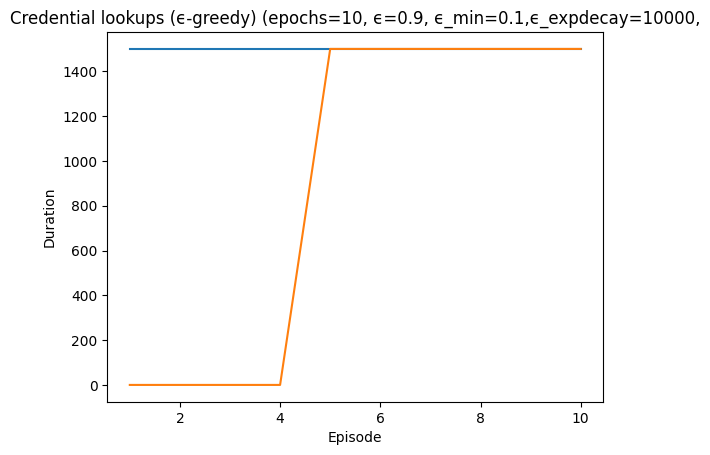

In [22]:
if reload: pass
else:
    # Evaluate a random agent that opportunistically exploits
    # credentials gathere in its local cache
    credlookup_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=rca.CredentialCacheExploiter(),
        episode_count=10,
        iteration_count=iteration_count,
        epsilon=0.90,
        render=False,
        epsilon_exponential_decay=10000,
        epsilon_minimum=0.10,
        verbosity=Verbosity.Normal,
        title="Credential lookups (ϵ-greedy)"
    )

In [23]:
if reload: pass
else:
    # Evaluate a Tabular Q-learning agent
    tabularq_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=tqa.QTabularLearner(
            ep,
            gamma=0.015, learning_rate=0.01, exploit_percentile=100),
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=0.90,
        epsilon_exponential_decay=5000,
        epsilon_minimum=0.01,
        verbosity=Verbosity.Normal,
        render=False,
        plot_episodes_length=False,
        title="Tabular Q-learning"
    )

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 15|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 1|Iteration 38|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 1|Iteration 45|reward:   36.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 1|Iteration 45|reward:   36.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 1|Iteration 47|reward:   86.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 1|Iteration 47|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||


    + t=1 explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1433 err=121.00Q=-1.00] Qattack[state=5623 err=121.00 Q=-1.00] 
    + t=15 explore r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  Qsource[state=1433 err=118.95Q=-1.00] Qattack[state=6772 err=121.00 Q=-1.00] 
    + t=45 explore r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  Qsource[state=1433 err

Episode 1|Iteration 76|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 94|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 114|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 127|reward:   97.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 127|reward:   97.0|last_reward_at:  127|Elapsed Time: 0:00:00||
Episode 1|Iteration 152|reward:   97.0|last_reward_at:  127|Elapsed Time: 0:00:00||
Episode 1|Iteration 171|reward:   97.0|last_reward_at:  127|Elapsed Time: 0:00:00||
Episode 1|Iteration 189|reward:  106.0|last_reward_at:  127|Elapsed Time: 0:00:00||
Episode 1|Iteration 189|reward:  106.0|last_reward_at:  189|Elapsed Time: 0:00:00||


    + t=127 explore r=11.0 cum_reward:97.0 a=ChosenActionMetadata(Q_source_state=34, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=9, Q_attack_state=6779)-{'remote_vulnerability': array([3, 1, 6], dtype=int32)} creds=1  Qsource[state=34 err=121.00Q=-1.00] Qattack[state=6779 err=121.00 Q=-1.00] 
    + t=189 explore r=9.0 cum_reward:106.0 a=ChosenActionMetadata(Q_source_state=34, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=2165)-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=2  Qsource[state=34 err=80.99Q=-1.00] Qattack[state=2165 err=81.00 Q=-1.00] 


Episode 1|Iteration 197|reward:  112.0|last_reward_at:  189|Elapsed Time: 0:00:00||
Episode 1|Iteration 197|reward:  112.0|last_reward_at:  197|Elapsed Time: 0:00:00||
Episode 1|Iteration 228|reward:  112.0|last_reward_at:  197|Elapsed Time: 0:00:00||
Episode 1|Iteration 247|reward:  112.0|last_reward_at:  197|Elapsed Time: 0:00:00||
Episode 1|Iteration 256|reward:  123.0|last_reward_at:  197|Elapsed Time: 0:00:00||
Episode 1|Iteration 256|reward:  123.0|last_reward_at:  256|Elapsed Time: 0:00:00||


    + t=197 explore r=6.0 cum_reward:112.0 a=ChosenActionMetadata(Q_source_state=4180, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=3, Q_attack_state=6900)-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=2  Qsource[state=4180 err=36.00Q=-1.00] Qattack[state=6900 err=36.00 Q=-1.00] 
    + t=256 explore r=11.0 cum_reward:123.0 a=ChosenActionMetadata(Q_source_state=4180, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=6, Q_attack_state=2165)-{'remote_vulnerability': array([0, 4, 3], dtype=int32)} creds=2  Qsource[state=4180 err=121.01Q=-1.00] Qattack[state=2165 err=121.00 Q=-1.00] 


Episode 1|Iteration 273|reward:  137.0|last_reward_at:  256|Elapsed Time: 0:00:00||
Episode 1|Iteration 273|reward:  137.0|last_reward_at:  273|Elapsed Time: 0:00:00||
Episode 1|Iteration 304|reward:  137.0|last_reward_at:  273|Elapsed Time: 0:00:01||
Episode 1|Iteration 320|reward:  187.0|last_reward_at:  273|Elapsed Time: 0:00:01||
Episode 1|Iteration 320|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||


    + t=273 explore r=14.0 cum_reward:137.0 a=ChosenActionMetadata(Q_source_state=4180, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=10, Q_attack_state=4855)-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=3  Qsource[state=4180 err=193.13Q=-1.00] Qattack[state=4855 err=196.00 Q=-1.00] 
    + t=320 exploit r=50.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=3621, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=12, Q_attack_state=4529)-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  Qsource[state=3621 err=2500.00Q=-1.00] Qattack[state=4529 err=2500.00 Q=-1.00] 


Episode 1|Iteration 342|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 361|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 380|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 399|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 418|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 437|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 456|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 475|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 494|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 513|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 532|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:00:01||
Episode 1|Iteration 551|reward:  187.0|last_reward_at:  320|Elapsed Time: 0:

    + t=645 explore r=11.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=5, Q_attack_state=701)-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  Qsource[state=344 err=121.00Q=-1.00] Qattack[state=701 err=121.00 Q=-1.00] 


Episode 1|Iteration 703|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:02||
Episode 1|Iteration 722|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:02||
Episode 1|Iteration 741|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:02||
Episode 1|Iteration 760|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:02||
Episode 1|Iteration 779|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:02||
Episode 1|Iteration 798|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:02||
Episode 1|Iteration 817|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:02||
Episode 1|Iteration 836|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:02||
Episode 1|Iteration 855|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:03||
Episode 1|Iteration 874|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:03||
Episode 1|Iteration 893|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:00:03||
Episode 1|Iteration 912|reward:  198.0|last_reward_at:  645|Elapsed Time: 0:

    + t=1068 explore r=100.0 cum_reward:298.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=15, Q_attack_state=5052)-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=3  Qsource[state=344 err=9999.96Q=-1.00] Qattack[state=5052 err=10000.00 Q=-1.00] 
    + t=1075 explore r=14.0 cum_reward:312.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=1, Q_attack_state=1333)-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  Qsource[state=344 err=195.99Q=-1.00] Qattack[state=1333 err=196.00 Q=-1.00] 


Episode 1|Iteration 1121|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1140|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1159|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1178|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1197|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1216|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1235|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1254|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1273|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1292|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1310|reward:  312.0|last_reward_at: 1075|Elapsed Time: 0:00:04||
Episode 1|Iteration 1330|reward:  312.0|last_reward_at: 1075|Elap

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/88 (0.02)
    explore-remote: 8/583 (0.01)
    explore-connect: 1/532 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/4 (0.00)
    exploit-connect: 2/280 (0.01)
  exploit deflected to exploration: 23
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6695, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 15|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 2|Iteration 15|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 2|Iteration 36|reward:   97.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 2|Iteration 36|reward:   97.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 2|It

    + t=2 explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1433 err=114.86Q=-1.00] Qattack[state=5623 err=118.63 Q=-1.00] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=0.3943031666419216, Q_attack_expectedq=0.3943031666419216, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=112.61Q=0.39] Qattack[state=6772 err=118.64 Q=0.39] 
    + t=8 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=0.48099216414317597, Q_attack_expectedq=0.48099216414317597, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0, 2, 

Episode 2|Iteration 76|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 2|Iteration 95|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 2|Iteration 109|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 2|Iteration 130|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 2|Iteration 152|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 2|Iteration 171|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 2|Iteration 175|reward:  187.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 2|Iteration 175|reward:  187.0|last_reward_at:  175|Elapsed Time: 0:00:00||
Episode 2|Iteration 178|reward:  287.0|last_reward_at:  175|Elapsed Time: 0:00:00||
Episode 2|Iteration 178|reward:  287.0|last_reward_at:  178|Elapsed Time: 0:00:00||
Episode 2|Iteration 181|reward:  301.0|last_reward_at:  178|Elapsed Time: 0:00:00||
Episode 2|Iteration 181|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00

    + t=175 explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=4529)-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=74.35Q=-1.00] Qattack[state=4529 err=81.16 Q=-1.00] 
    + t=178 explore r=100.0 cum_reward:287.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=15, Q_attack_state=2864)-{'connect': array([3, 1, 4, 2], dtype=int32)} creds=3  Qsource[state=344 err=10000.88Q=-1.00] Qattack[state=2864 err=10000.00 Q=-1.00] 
    + t=181 explore r=14.0 cum_reward:301.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=1, Q_attack_state=2600)-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  Qsource[state=344 err=1

Episode 2|Iteration 247|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:00||
Episode 2|Iteration 266|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 285|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 304|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 323|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 342|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 361|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 380|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 399|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 418|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 437|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 2|Iteration 456|reward:  301.0|last_reward_at:  181|Elapsed Time: 0:

    + t=758 explore r=11.0 cum_reward:312.0 a=ChosenActionMetadata(Q_source_state=598, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=5, Q_attack_state=2549)-{'remote_vulnerability': array([3, 6, 2], dtype=int32)} creds=4  Qsource[state=598 err=121.00Q=-1.00] Qattack[state=2549 err=121.00 Q=-1.00] 


Episode 2|Iteration 817|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:03||
Episode 2|Iteration 836|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:03||
Episode 2|Iteration 855|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:03||
Episode 2|Iteration 874|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:03||
Episode 2|Iteration 893|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:03||
Episode 2|Iteration 911|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:04||
Episode 2|Iteration 925|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:04||
Episode 2|Iteration 948|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:04||
Episode 2|Iteration 969|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:04||
Episode 2|Iteration 988|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:04||
Episode 2|Iteration 1007|reward:  312.0|last_reward_at:  758|Elapsed Time: 0:00:04||
Episode 2|Iteration 1026|reward:  312.0|last_reward_at:  758|Elapsed Time: 

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/69 (0.03)
    explore-remote: 4/446 (0.01)
    explore-connect: 1/424 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/6 (0.40)
    exploit-connect: 2/542 (0.00)
  exploit deflected to exploration: 49
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.4985, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 8|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 19|reward:   92.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 3|Iteration 19|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iter

    + t=2 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=0.610187108663102, Q_attack_expectedq=0.610187108663102, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=108.14Q=0.61] Qattack[state=5623 err=116.30 Q=0.61] 
    + t=4 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=0.7071421245011892, Q_attack_expectedq=0.7071421245011892, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=106.16Q=0.71] Qattack[state=6772 err=116.32 Q=0.71] 
    + t=5 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=0.8101767745748525, Q_attack_expectedq=0.8101767745748525, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': 

Episode 3|Iteration 57|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 76|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 95|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 114|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 130|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 148|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 171|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 190|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 209|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 228|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 247|reward:   92.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 3|Iteration 257|reward:  103.0|last_reward_at:   19|Elapsed Time: 0:00:

    + t=257 exploit r=11.0 cum_reward:103.0 a=ChosenActionMetadata(Q_source_state=34, Q_source_expectedq=0.04097698274302835, Q_attack_expectedq=0.04097698274302835, source_node=3, source_node_encoding=512, abstract_action=9, Q_attack_state=6779)-{'remote_vulnerability': array([3, 1, 6])} creds=1  Qsource[state=34 err=120.11Q=0.04] Qattack[state=6779 err=118.77 Q=0.04] 


Episode 3|Iteration 322|reward:  103.0|last_reward_at:  257|Elapsed Time: 0:00:01||
Episode 3|Iteration 340|reward:  103.0|last_reward_at:  257|Elapsed Time: 0:00:01||
Episode 3|Iteration 358|reward:  114.0|last_reward_at:  257|Elapsed Time: 0:00:01||
Episode 3|Iteration 358|reward:  114.0|last_reward_at:  358|Elapsed Time: 0:00:01||
Episode 3|Iteration 380|reward:  114.0|last_reward_at:  358|Elapsed Time: 0:00:01||
Episode 3|Iteration 381|reward:  128.0|last_reward_at:  358|Elapsed Time: 0:00:01||
Episode 3|Iteration 381|reward:  128.0|last_reward_at:  381|Elapsed Time: 0:00:01||
Episode 3|Iteration 385|reward:  178.0|last_reward_at:  381|Elapsed Time: 0:00:01||
Episode 3|Iteration 385|reward:  178.0|last_reward_at:  385|Elapsed Time: 0:00:01||
Episode 3|Iteration 399|reward:  178.0|last_reward_at:  385|Elapsed Time: 0:00:01||


    + t=358 explore r=11.0 cum_reward:114.0 a=ChosenActionMetadata(Q_source_state=34, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=6, Q_attack_state=6900)-{'remote_vulnerability': array([3, 4, 3], dtype=int32)} creds=1  Qsource[state=34 err=119.41Q=-1.00] Qattack[state=6900 err=121.00 Q=-1.00] 
    + t=381 explore r=14.0 cum_reward:128.0 a=ChosenActionMetadata(Q_source_state=34, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=10, Q_attack_state=4801)-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=2  Qsource[state=34 err=192.69Q=-1.00] Qattack[state=4801 err=196.42 Q=-1.00] 
    + t=385 exploit r=50.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=1828, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=12, Q_attack_state=4529)-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  Qsource[state=1828 err

Episode 3|Iteration 418|reward:  178.0|last_reward_at:  385|Elapsed Time: 0:00:01||
Episode 3|Iteration 437|reward:  178.0|last_reward_at:  385|Elapsed Time: 0:00:01||
Episode 3|Iteration 456|reward:  178.0|last_reward_at:  385|Elapsed Time: 0:00:01||
Episode 3|Iteration 457|reward:  187.0|last_reward_at:  385|Elapsed Time: 0:00:01||
Episode 3|Iteration 457|reward:  187.0|last_reward_at:  457|Elapsed Time: 0:00:01||
Episode 3|Iteration 474|reward:  187.0|last_reward_at:  457|Elapsed Time: 0:00:01||
Episode 3|Iteration 494|reward:  187.0|last_reward_at:  457|Elapsed Time: 0:00:01||
Episode 3|Iteration 502|reward:  287.0|last_reward_at:  457|Elapsed Time: 0:00:01||
Episode 3|Iteration 502|reward:  287.0|last_reward_at:  502|Elapsed Time: 0:00:01||


    + t=457 exploit[undefined]->explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=7, Q_attack_state=701)-{'remote_vulnerability': array([6, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=80.83Q=-1.00] Qattack[state=701 err=81.03 Q=-1.00] 


Episode 3|Iteration 511|reward:  301.0|last_reward_at:  502|Elapsed Time: 0:00:02||
Episode 3|Iteration 511|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 532|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 551|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||


    + t=502 explore r=100.0 cum_reward:287.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=15, Q_attack_state=701)-{'connect': array([6, 1, 4, 2], dtype=int32)} creds=3  Qsource[state=344 err=9982.77Q=-1.00] Qattack[state=701 err=10000.30 Q=-1.00] 
    + t=511 exploit[undefined]->explore r=14.0 cum_reward:301.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=1, Q_attack_state=2600)-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  Qsource[state=344 err=188.42Q=-1.00] Qattack[state=2600 err=192.15 Q=-1.00] 


Episode 3|Iteration 570|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 589|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 608|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 627|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 646|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 665|reward:  301.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 671|reward:  312.0|last_reward_at:  511|Elapsed Time: 0:00:02||
Episode 3|Iteration 671|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:02||
Episode 3|Iteration 696|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:02||


    + t=671 explore r=11.0 cum_reward:312.0 a=ChosenActionMetadata(Q_source_state=598, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=5, Q_attack_state=2549)-{'remote_vulnerability': array([3, 6, 2], dtype=int32)} creds=4  Qsource[state=598 err=120.76Q=-1.00] Qattack[state=2549 err=118.64 Q=-1.00] 


Episode 3|Iteration 721|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:02||
Episode 3|Iteration 741|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:02||
Episode 3|Iteration 760|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:02||
Episode 3|Iteration 779|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:03||
Episode 3|Iteration 798|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:03||
Episode 3|Iteration 817|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:03||
Episode 3|Iteration 836|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:03||
Episode 3|Iteration 855|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:03||
Episode 3|Iteration 874|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:03||
Episode 3|Iteration 893|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:03||
Episode 3|Iteration 912|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:00:03||
Episode 3|Iteration 931|reward:  312.0|last_reward_at:  671|Elapsed Time: 0:

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/46 (0.02)
    explore-remote: 5/402 (0.01)
    explore-connect: 1/392 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/57 (0.05)
    exploit-connect: 2/590 (0.00)
  exploit deflected to exploration: 177
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.3719, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 12|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 12|reward:   36.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:   86.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 14|reward:   97.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 14|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 4|

    + t=3 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=0.9238217896119285, Q_attack_expectedq=0.9238217896119285, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=101.81Q=0.92] Qattack[state=5623 err=114.02 Q=0.92] 
    + t=7 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=0.9947388896150242, Q_attack_expectedq=0.9947388896150242, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=100.40Q=0.99] Qattack[state=6772 err=114.12 Q=0.99] 
    + t=12 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.052433275520275, Q_attack_expectedq=1.052433275520275, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability':

Episode 4|Iteration 71|reward:  183.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 4|Iteration 91|reward:  183.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 4|Iteration 97|reward:  189.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 4|Iteration 97|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:00||
Episode 4|Iteration 114|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:00||
Episode 4|Iteration 133|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:00||


    + t=97 exploit r=6.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=0.6272451191419655, Q_attack_expectedq=0.6272451191419655, source_node=6, source_node_encoding=256, abstract_action=3, Q_attack_state=1933)-{'remote_vulnerability': array([6, 3, 0])} creds=2  Qsource[state=344 err=28.97Q=0.63] Qattack[state=1933 err=36.00 Q=0.63] 


Episode 4|Iteration 152|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:00||
Episode 4|Iteration 171|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:00||
Episode 4|Iteration 190|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:00||
Episode 4|Iteration 202|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:00||
Episode 4|Iteration 220|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 4|Iteration 240|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 4|Iteration 255|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 4|Iteration 266|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 4|Iteration 285|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 4|Iteration 304|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 4|Iteration 323|reward:  189.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 4|Iteration 339|reward:  198.0|last_reward_at:   97|Elapsed Time: 0:

    + t=339 exploit-1->explore r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=7, Q_attack_state=1933)-{'remote_vulnerability': array([6, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=77.47Q=-1.00] Qattack[state=1933 err=81.01 Q=-1.00] 


Episode 4|Iteration 374|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:01||
Episode 4|Iteration 395|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:01||
Episode 4|Iteration 418|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:01||
Episode 4|Iteration 437|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:02||
Episode 4|Iteration 456|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:02||
Episode 4|Iteration 475|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:02||
Episode 4|Iteration 494|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:02||
Episode 4|Iteration 513|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:02||
Episode 4|Iteration 529|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:02||
Episode 4|Iteration 548|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:02||
Episode 4|Iteration 570|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:00:02||
Episode 4|Iteration 589|reward:  198.0|last_reward_at:  339|Elapsed Time: 0:

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/34 (0.00)
    explore-remote: 2/249 (0.01)
    explore-connect: 0/272 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/118 (0.05)
    exploit-connect: 2/816 (0.00)
  exploit deflected to exploration: 97
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.2781, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 6|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iteration 8|reward:  108.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 5|Iterat

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.1822626465901207, Q_attack_expectedq=1.1822626465901207, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=96.74Q=1.18] Qattack[state=5623 err=111.79 Q=1.18] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.280617359521208, Q_attack_expectedq=1.280617359521208, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=94.84Q=1.28] Qattack[state=6772 err=111.89 Q=1.28] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.378003278529924, Q_attack_expectedq=1.378003278529924, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': arra

Episode 5|Iteration 76|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Iteration 95|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Iteration 114|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Iteration 133|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Iteration 152|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Iteration 171|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Iteration 178|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Iteration 178|reward:  131.0|last_reward_at:  178|Elapsed Time: 0:00:00||
Episode 5|Iteration 179|reward:  181.0|last_reward_at:  178|Elapsed Time: 0:00:00||
Episode 5|Iteration 179|reward:  181.0|last_reward_at:  179|Elapsed Time: 0:00:00||
Episode 5|Iteration 209|reward:  181.0|last_reward_at:  179|Elapsed Time: 0:00:00||
Episode 5|Iteration 209|reward:  192.0|last_reward_at:  179|Elapsed Time: 0:00

    + t=178 explore r=14.0 cum_reward:131.0 a=ChosenActionMetadata(Q_source_state=4180, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=10, Q_attack_state=4855)-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=3  Qsource[state=4180 err=193.12Q=-1.00] Qattack[state=4855 err=189.04 Q=-1.00] 
    + t=179 exploit r=50.0 cum_reward:181.0 a=ChosenActionMetadata(Q_source_state=3621, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=12, Q_attack_state=2864)-{'connect': array([3, 6, 1, 2], dtype=int32)} creds=3  Qsource[state=3621 err=2500.30Q=-1.00] Qattack[state=2864 err=2500.91 Q=-1.00] 
    + t=209 explore r=11.0 cum_reward:192.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=5, Q_attack_state=701)-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  Qsource[state=

Episode 5|Iteration 247|reward:  192.0|last_reward_at:  209|Elapsed Time: 0:00:00||
Episode 5|Iteration 266|reward:  192.0|last_reward_at:  209|Elapsed Time: 0:00:00||
Episode 5|Iteration 282|reward:  192.0|last_reward_at:  209|Elapsed Time: 0:00:00||
Episode 5|Iteration 304|reward:  192.0|last_reward_at:  209|Elapsed Time: 0:00:01||
Episode 5|Iteration 323|reward:  192.0|last_reward_at:  209|Elapsed Time: 0:00:01||
Episode 5|Iteration 340|reward:  198.0|last_reward_at:  209|Elapsed Time: 0:00:01||
Episode 5|Iteration 340|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 361|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 380|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 399|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||


    + t=340 explore r=6.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=3, Q_attack_state=5052)-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=3  Qsource[state=344 err=35.97Q=-1.00] Qattack[state=5052 err=36.06 Q=-1.00] 


Episode 5|Iteration 418|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 437|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 456|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 475|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 494|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 513|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 532|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 551|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 570|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 589|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:01||
Episode 5|Iteration 608|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:00:02||
Episode 5|Iteration 627|reward:  198.0|last_reward_at:  340|Elapsed Time: 0:

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/22 (0.00)
    explore-remote: 4/166 (0.02)
    explore-connect: 0/180 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/7 (0.36)
    exploit-connect: 2/1114 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.2086, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iterat

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.5047191903870887, Q_attack_expectedq=1.5047191903870887, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=90.59Q=1.50] Qattack[state=5623 err=109.60 Q=1.50] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.5998977063617759, Q_attack_expectedq=1.5998977063617759, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=88.81Q=1.60] Qattack[state=6772 err=109.70 Q=1.60] 
    + t=4 explore r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} c

Episode 6|Iteration 52|reward:  189.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 6|Iteration 76|reward:  189.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 6|Iteration 92|reward:  198.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 6|Iteration 92|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 114|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 133|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 152|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||


    + t=92 exploit-1->explore r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=5052)-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=80.96Q=-1.00] Qattack[state=5052 err=81.07 Q=-1.00] 


Episode 6|Iteration 171|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 190|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 209|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 228|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 247|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 266|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 6|Iteration 285|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:01||
Episode 6|Iteration 304|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:01||
Episode 6|Iteration 323|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:01||
Episode 6|Iteration 342|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:01||
Episode 6|Iteration 361|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:00:01||
Episode 6|Iteration 380|reward:  198.0|last_reward_at:   92|Elapsed Time: 0:

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 4/145 (0.03)
    explore-connect: 0/160 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/21 (0.16)
    exploit-connect: 2/1149 (0.00)
  exploit deflected to exploration: 49
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.1571, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 16|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 16|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 7|Iteration 22|reward:  108.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 7|Ite

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.8012429309645126, Q_attack_expectedq=1.8012429309645126, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=85.11Q=1.80] Qattack[state=5623 err=107.45 Q=1.80] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.8748497063167813, Q_attack_expectedq=1.8748497063167813, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=83.78Q=1.87] Qattack[state=6772 err=107.56 Q=1.87] 
    + t=5 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=1.9470135697079718, Q_attack_expectedq=1.9470135697079718, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': 

Episode 7|Iteration 53|reward:  187.0|last_reward_at:   40|Elapsed Time: 0:00:00||
Episode 7|Iteration 53|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 76|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 95|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 114|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||


    + t=53 exploit-1->explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=4529)-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=79.95Q=-1.00] Qattack[state=4529 err=79.95 Q=-1.00] 


Episode 7|Iteration 133|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 152|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 171|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 190|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 209|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 228|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 247|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 266|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 285|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 7|Iteration 304|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:01||
Episode 7|Iteration 323|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:00:01||
Episode 7|Iteration 342|reward:  187.0|last_reward_at:   53|Elapsed Time: 0:

    + t=560 explore r=100.0 cum_reward:287.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=15, Q_attack_state=4529)-{'connect': array([0, 1, 4, 2], dtype=int32)} creds=3  Qsource[state=344 err=9993.82Q=-1.00] Qattack[state=4529 err=10005.80 Q=-1.00] 
    + t=564 exploit[undefined]->explore r=14.0 cum_reward:301.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=1, Q_attack_state=2600)-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  Qsource[state=344 err=192.96Q=-1.00] Qattack[state=2600 err=188.33 Q=-1.00] 


Episode 7|Iteration 627|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 646|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 665|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 681|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 703|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 722|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 741|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 760|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 779|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 798|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 817|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:00:02||
Episode 7|Iteration 836|reward:  301.0|last_reward_at:  564|Elapsed Time: 0:

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 2/114 (0.02)
    explore-connect: 1/106 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/20 (0.20)
    exploit-connect: 2/1234 (0.00)
  exploit deflected to exploration: 17
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.1190, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 10|reward:  108.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Itera

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.0681732702403903, Q_attack_expectedq=2.0681732702403903, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=80.33Q=2.07] Qattack[state=5623 err=105.34 Q=2.07] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.1578017635285223, Q_attack_expectedq=2.1578017635285223, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=78.76Q=2.16] Qattack[state=6772 err=105.46 Q=2.16] 
    + t=4 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.2244189241086127, Q_attack_expectedq=2.2244189241086127, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': 

Episode 8|Iteration 54|reward:  172.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 8|Iteration 67|reward:  172.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 8|Iteration 68|reward:  178.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 8|Iteration 68|reward:  178.0|last_reward_at:   68|Elapsed Time: 0:00:00||
Episode 8|Iteration 76|reward:  178.0|last_reward_at:   68|Elapsed Time: 0:00:00||
Episode 8|Iteration 95|reward:  178.0|last_reward_at:   68|Elapsed Time: 0:00:00||


    + t=68 exploit[undefined]->explore r=6.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=3, Q_attack_state=4529)-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=30.21Q=-1.00] Qattack[state=4529 err=35.50 Q=-1.00] 


Episode 8|Iteration 114|reward:  178.0|last_reward_at:   68|Elapsed Time: 0:00:00||
Episode 8|Iteration 133|reward:  178.0|last_reward_at:   68|Elapsed Time: 0:00:00||
Episode 8|Iteration 152|reward:  178.0|last_reward_at:   68|Elapsed Time: 0:00:00||
Episode 8|Iteration 167|reward:  187.0|last_reward_at:   68|Elapsed Time: 0:00:00||
Episode 8|Iteration 167|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:00||
Episode 8|Iteration 190|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:00||
Episode 8|Iteration 209|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:00||
Episode 8|Iteration 228|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||


    + t=167 exploit-1->explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=4529)-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=77.49Q=-1.00] Qattack[state=4529 err=78.16 Q=-1.00] 


Episode 8|Iteration 247|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 266|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 285|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 304|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 323|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 342|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 361|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 380|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 399|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 416|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 432|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:00:01||
Episode 8|Iteration 456|reward:  187.0|last_reward_at:  167|Elapsed Time: 0:

    + t=721 explore r=11.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=4529)-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=3  Qsource[state=344 err=119.91Q=-1.00] Qattack[state=4529 err=118.75 Q=-1.00] 


Episode 8|Iteration 779|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:02||
Episode 8|Iteration 798|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 817|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 836|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 853|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 874|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 893|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 912|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 931|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 950|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 969|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:00:03||
Episode 8|Iteration 988|reward:  198.0|last_reward_at:  721|Elapsed Time: 0:

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/20 (0.00)
    explore-remote: 3/133 (0.02)
    explore-connect: 0/139 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/3 (0.62)
    exploit-connect: 2/1194 (0.00)
  exploit deflected to exploration: 135
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.0908, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iteration 10|reward:  108.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Itera

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.34294131453785, Q_attack_expectedq=2.34294131453785, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=75.55Q=2.34] Qattack[state=5623 err=103.28 Q=2.34] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.4298633425896523, Q_attack_expectedq=2.4298633425896523, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=74.07Q=2.43] Qattack[state=6772 err=103.40 Q=2.43] 
    + t=7 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.418256595144798, Q_attack_expectedq=2.418256595144798, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array(

Episode 9|Iteration 46|reward:  172.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 9|Iteration 57|reward:  172.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 9|Iteration 71|reward:  181.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 9|Iteration 71|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||
Episode 9|Iteration 95|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||
Episode 9|Iteration 114|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||
Episode 9|Iteration 133|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||


    + t=71 exploit-1->explore r=9.0 cum_reward:181.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=7, Q_attack_state=701)-{'remote_vulnerability': array([6, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=80.98Q=-1.00] Qattack[state=701 err=79.67 Q=-1.00] 


Episode 9|Iteration 152|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||
Episode 9|Iteration 171|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||
Episode 9|Iteration 190|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||
Episode 9|Iteration 209|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||
Episode 9|Iteration 228|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:00||
Episode 9|Iteration 247|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 9|Iteration 266|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 9|Iteration 285|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 9|Iteration 304|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 9|Iteration 323|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 9|Iteration 342|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 9|Iteration 361|reward:  181.0|last_reward_at:   71|Elapsed Time: 0:

    + t=954 explore r=11.0 cum_reward:192.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=5, Q_attack_state=701)-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  Qsource[state=344 err=120.88Q=-1.00] Qattack[state=701 err=116.82 Q=-1.00] 


Episode 9|Iteration 1023|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:03||
Episode 9|Iteration 1040|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:03||
Episode 9|Iteration 1064|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:03||
Episode 9|Iteration 1083|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:03||
Episode 9|Iteration 1102|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:03||
Episode 9|Iteration 1121|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:03||
Episode 9|Iteration 1140|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:04||
Episode 9|Iteration 1159|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:04||
Episode 9|Iteration 1175|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:04||
Episode 9|Iteration 1194|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:04||
Episode 9|Iteration 1216|reward:  192.0|last_reward_at:  954|Elapsed Time: 0:00:04||
Episode 9|Iteration 1232|reward:  192.0|last_reward_at:  954|Elap

    + t=1414 explore r=6.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=3, Q_attack_state=2549)-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=3  Qsource[state=344 err=36.00Q=-1.00] Qattack[state=2549 err=35.37 Q=-1.00] 


Episode 9|Iteration 1482|reward:  198.0|last_reward_at: 1414|Elapsed Time: 0:00:05||
Episode 9|Iteration 1500|reward:  198.0|last_reward_at: 1414|Elapsed Time: 0:00:05||


  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 3/66 (0.04)
    explore-connect: 0/81 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/7 (0.42)
    exploit-connect: 2/1326 (0.00)
  exploit deflected to exploration: 49
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.0698, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 16|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 16|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:  108.0|last_reward_at:   16|Elapsed Time: 0:00:00||
E

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.5349079700977537, Q_attack_expectedq=2.5349079700977537, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=72.30Q=2.53] Qattack[state=5623 err=101.25 Q=2.53] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.619939126592291, Q_attack_expectedq=2.619939126592291, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=70.89Q=2.62] Qattack[state=6772 err=101.37 Q=2.62] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.7041327261953567, Q_attack_expectedq=2.7041327261953567, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': ar

Episode 10|Iteration 68|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 95|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 114|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 133|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 152|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 171|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 190|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 209|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 228|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 247|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 266|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 285|reward:  181.0|last_reward_at:   45|Elapse

    + t=350 explore r=6.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=3, Q_attack_state=2864)-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=3  Qsource[state=344 err=35.82Q=-1.00] Qattack[state=2864 err=36.36 Q=-1.00] 


Episode 10|Iteration 418|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:01||
Episode 10|Iteration 437|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:01||
Episode 10|Iteration 456|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:01||
Episode 10|Iteration 475|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:01||
Episode 10|Iteration 494|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:01||
Episode 10|Iteration 513|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:01||
Episode 10|Iteration 531|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:01||
Episode 10|Iteration 551|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:01||
Episode 10|Iteration 570|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:02||
Episode 10|Iteration 589|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:02||
Episode 10|Iteration 608|reward:  187.0|last_reward_at:  350|Elapsed Time: 0:00:02||
Episode 10|Iteration 627|reward:  187.0|last_reward_at:  350|Elap

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 2/48 (0.04)
    explore-connect: 0/52 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/29 (0.15)
    exploit-connect: 2/1356 (0.00)
  exploit deflected to exploration: 4
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.0543, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 11|Iteration 7|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 11|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 11|Iteration 8|reward:  108.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.817992033847, Q_attack_expectedq=2.817992033847, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=67.64Q=2.82] Qattack[state=5623 err=99.27 Q=2.82] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.9002348123136072, Q_attack_expectedq=2.9002348123136072, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=66.31Q=2.90] Qattack[state=6772 err=99.39 Q=2.90] 
    + t=5 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=2.923217938508857, Q_attack_expectedq=2.923217938508857, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0, 2,

Episode 11|Iteration 52|reward:  172.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 64|reward:  181.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 64|reward:  181.0|last_reward_at:   64|Elapsed Time: 0:00:00||
Episode 11|Iteration 95|reward:  181.0|last_reward_at:   64|Elapsed Time: 0:00:00||
Episode 11|Iteration 114|reward:  181.0|last_reward_at:   64|Elapsed Time: 0:00:00||


    + t=64 exploit-1->explore r=9.0 cum_reward:181.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=7, Q_attack_state=2864)-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=80.96Q=-1.00] Qattack[state=2864 err=81.51 Q=-1.00] 


Episode 11|Iteration 133|reward:  181.0|last_reward_at:   64|Elapsed Time: 0:00:00||
Episode 11|Iteration 152|reward:  181.0|last_reward_at:   64|Elapsed Time: 0:00:00||
Episode 11|Iteration 170|reward:  192.0|last_reward_at:   64|Elapsed Time: 0:00:00||
Episode 11|Iteration 170|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:00||
Episode 11|Iteration 190|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:00||
Episode 11|Iteration 209|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:00||
Episode 11|Iteration 228|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:00||
Episode 11|Iteration 247|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:00||


    + t=170 explore r=11.0 cum_reward:192.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=4529)-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=3  Qsource[state=344 err=120.98Q=-1.00] Qattack[state=4529 err=116.51 Q=-1.00] 


Episode 11|Iteration 264|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 285|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 304|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 323|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 342|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 361|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 378|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 399|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 402|reward:  292.0|last_reward_at:  170|Elapsed Time: 0:00:01||
Episode 11|Iteration 402|reward:  292.0|last_reward_at:  402|Elapsed Time: 0:00:01||
Episode 11|Iteration 418|reward:  292.0|last_reward_at:  402|Elapsed Time: 0:00:01||
Episode 11|Iteration 436|reward:  292.0|last_reward_at:  402|Elap

    + t=402 explore r=100.0 cum_reward:292.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=15, Q_attack_state=1933)-{'connect': array([6, 1, 4, 2], dtype=int32)} creds=3  Qsource[state=344 err=9999.94Q=-1.00] Qattack[state=1933 err=10000.01 Q=-1.00] 


Episode 11|Iteration 451|reward:  306.0|last_reward_at:  402|Elapsed Time: 0:00:01||
Episode 11|Iteration 451|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:01||
Episode 11|Iteration 475|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:01||
Episode 11|Iteration 494|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||


    + t=451 exploit[undefined]->explore r=14.0 cum_reward:306.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=1, source_node_encoding=19, abstract_action=1, Q_attack_state=1333)-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  Qsource[state=344 err=194.25Q=-1.00] Qattack[state=1333 err=192.60 Q=-1.00] 


Episode 11|Iteration 508|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 532|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 551|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 570|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 589|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 608|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 627|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 641|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 656|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 684|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 703|reward:  306.0|last_reward_at:  451|Elapsed Time: 0:00:02||
Episode 11|Iteration 722|reward:  306.0|last_reward_at:  451|Elap

    + t=1369 explore r=6.0 cum_reward:312.0 a=ChosenActionMetadata(Q_source_state=598, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=3, Q_attack_state=4193)-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=4  Qsource[state=598 err=36.00Q=-1.00] Qattack[state=4193 err=36.00 Q=-1.00] 


Episode 11|Iteration 1425|reward:  312.0|last_reward_at: 1369|Elapsed Time: 0:00:05||
Episode 11|Iteration 1444|reward:  312.0|last_reward_at: 1369|Elapsed Time: 0:00:06||
Episode 11|Iteration 1463|reward:  312.0|last_reward_at: 1369|Elapsed Time: 0:00:06||
Episode 11|Iteration 1482|reward:  312.0|last_reward_at: 1369|Elapsed Time: 0:00:06||
Episode 11|Iteration 1500|reward:  312.0|last_reward_at: 1369|Elapsed Time: 0:00:06||


  Episode 11 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 3/79 (0.04)
    explore-connect: 1/78 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/2 (0.71)
    exploit-connect: 2/1319 (0.00)
  exploit deflected to exploration: 98
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.0428, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 9|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 9|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 12|Iteration 13|reward:  108.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.034952426721858, Q_attack_expectedq=3.034952426721858, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=64.17Q=3.03] Qattack[state=5623 err=97.32 Q=3.03] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.1150581453186477, Q_attack_expectedq=3.1150581453186477, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=62.91Q=3.12] Qattack[state=6772 err=97.44 Q=3.12] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.194374822587259, Q_attack_expectedq=3.194374822587259, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array(

Episode 12|Iteration 51|reward:  183.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 12|Iteration 51|reward:  183.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 12|Iteration 72|reward:  183.0|last_reward_at:   51|Elapsed Time: 0:00:00||


    + t=51 exploit[undefined]->explore r=11.0 cum_reward:183.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=4529)-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=2  Qsource[state=344 err=120.26Q=-1.00] Qattack[state=4529 err=114.20 Q=-1.00] 


Episode 12|Iteration 93|reward:  183.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 12|Iteration 114|reward:  183.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 12|Iteration 133|reward:  183.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 12|Iteration 152|reward:  183.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 12|Iteration 155|reward:  189.0|last_reward_at:   51|Elapsed Time: 0:00:00||
Episode 12|Iteration 155|reward:  189.0|last_reward_at:  155|Elapsed Time: 0:00:00||
Episode 12|Iteration 171|reward:  189.0|last_reward_at:  155|Elapsed Time: 0:00:00||
Episode 12|Iteration 190|reward:  189.0|last_reward_at:  155|Elapsed Time: 0:00:00||
Episode 12|Iteration 194|reward:  198.0|last_reward_at:  155|Elapsed Time: 0:00:00||
Episode 12|Iteration 194|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:00||


    + t=155 exploit[undefined]->explore r=6.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=3, Q_attack_state=1933)-{'remote_vulnerability': array([6, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=34.22Q=-1.00] Qattack[state=1933 err=35.80 Q=-1.00] 
    + t=194 exploit-1->explore r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=7, Q_attack_state=2549)-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=80.67Q=-1.00] Qattack[state=2549 err=81.02 Q=-1.00] 


Episode 12|Iteration 227|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 247|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 266|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 282|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 304|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 323|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 342|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 361|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 380|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 399|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 418|reward:  198.0|last_reward_at:  194|Elapsed Time: 0:00:01||
Episode 12|Iteration 437|reward:  198.0|last_reward_at:  194|Elap

  Episode 12 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 3/107 (0.03)
    explore-connect: 0/100 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/16 (0.24)
    exploit-connect: 2/1257 (0.00)
  exploit deflected to exploration: 163
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.0343, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 13|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 13|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 13|Iteration 5|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 13|Iteration 5|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:  108.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epi

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.3035277929803017, Q_attack_expectedq=3.3035277929803017, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=60.00Q=3.30] Qattack[state=5623 err=95.41 Q=3.30] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.3809880442194458, Q_attack_expectedq=3.3809880442194458, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=58.82Q=3.38] Qattack[state=6772 err=95.54 Q=3.38] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.457685311983884, Q_attack_expectedq=3.457685311983884, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': arra

Episode 13|Iteration 76|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 95|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 131|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 152|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 171|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 190|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 209|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 228|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 246|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 266|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 285|reward:  181.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 13|Iteration 304|reward:  181.0|last_reward_at:   21|Elapse

  Episode 13 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/23 (0.04)
    explore-connect: 0/27 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/8 (0.38)
    exploit-connect: 2/1431 (0.00)
  exploit deflected to exploration: 4
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.0280, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 7|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 14|Iteration 9|reward:  108.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.5643326582368156, Q_attack_expectedq=3.5643326582368156, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=56.09Q=3.56] Qattack[state=5623 err=93.54 Q=3.56] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.639223981553183, Q_attack_expectedq=3.639223981553183, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=54.99Q=3.64] Qattack[state=6772 err=93.68 Q=3.64] 
    + t=4 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.6768008557253355, Q_attack_expectedq=3.6768008557253355, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': arra

Episode 14|Iteration 57|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 76|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 95|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 114|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 133|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 143|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 152|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 170|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 190|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 209|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 228|reward:  187.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 247|reward:  187.0|last_reward_at:   26|Elapsed

  Episode 14 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 2/15 (0.12)
    explore-connect: 0/25 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/7 (0.42)
    exploit-connect: 2/1439 (0.00)
  exploit deflected to exploration: 11
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.0233, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 15|Iteration 7|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 15|Iteration 7|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 15|Iteration 8|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 15|Iteration 8|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 14|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 14|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 15|Iteration 18|reward:  108.0|last_reward_at:   14|Elapsed Time: 0:00:00||
E

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.7813819805021547, Q_attack_expectedq=3.7813819805021547, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=52.93Q=3.78] Qattack[state=5623 err=91.71 Q=3.78] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.8541353679942083, Q_attack_expectedq=3.8541353679942083, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=51.89Q=3.85] Qattack[state=6772 err=91.84 Q=3.85] 
    + t=7 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.773751543164323, Q_attack_expectedq=3.773751543164323, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': arra

Episode 15|Iteration 57|reward:  172.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 15|Iteration 76|reward:  172.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 15|Iteration 84|reward:  181.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 15|Iteration 84|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 114|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 133|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 152|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||


    + t=84 exploit-1->explore r=9.0 cum_reward:181.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=7, Q_attack_state=701)-{'remote_vulnerability': array([6, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=80.99Q=-1.00] Qattack[state=701 err=78.17 Q=-1.00] 


Episode 15|Iteration 171|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 190|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 209|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 228|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 247|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 266|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 285|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 15|Iteration 304|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:01||
Episode 15|Iteration 323|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:01||
Episode 15|Iteration 342|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:01||
Episode 15|Iteration 361|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:01||
Episode 15|Iteration 380|reward:  181.0|last_reward_at:   84|Elap

  Episode 15 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 1/45 (0.02)
    explore-connect: 0/48 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/12 (0.29)
    exploit-connect: 2/1381 (0.00)
  exploit deflected to exploration: 63
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.0199, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 7|reward:  108.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.877424715382295, Q_attack_expectedq=3.877424715382295, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=51.56Q=3.88] Qattack[state=5623 err=89.91 Q=3.88] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=3.9492320819357793, Q_attack_expectedq=3.9492320819357793, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=50.55Q=3.95] Qattack[state=6772 err=90.03 Q=3.95] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.020332145928712, Q_attack_expectedq=4.020332145928712, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array(

Episode 16|Iteration 55|reward:  172.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 16|Iteration 76|reward:  172.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 16|Iteration 95|reward:  172.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 16|Iteration 114|reward:  172.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 16|Iteration 133|reward:  172.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 16|Iteration 141|reward:  178.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 16|Iteration 141|reward:  178.0|last_reward_at:  141|Elapsed Time: 0:00:00||
Episode 16|Iteration 152|reward:  178.0|last_reward_at:  141|Elapsed Time: 0:00:00||
Episode 16|Iteration 171|reward:  178.0|last_reward_at:  141|Elapsed Time: 0:00:00||
Episode 16|Iteration 175|reward:  189.0|last_reward_at:  141|Elapsed Time: 0:00:00||
Episode 16|Iteration 175|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:00||


    + t=141 exploit-1->explore r=6.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=3, Q_attack_state=701)-{'remote_vulnerability': array([6, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=35.99Q=-1.00] Qattack[state=701 err=36.07 Q=-1.00] 
    + t=175 exploit[undefined]->explore r=11.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=4529)-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=2  Qsource[state=344 err=120.99Q=-1.00] Qattack[state=4529 err=112.33 Q=-1.00] 


Episode 16|Iteration 185|reward:  198.0|last_reward_at:  175|Elapsed Time: 0:00:00||
Episode 16|Iteration 185|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:00||
Episode 16|Iteration 209|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:00||
Episode 16|Iteration 228|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 247|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||


    + t=185 exploit r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=0.10139533983899816, Q_attack_expectedq=0.10139533983899816, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=5052)-{'remote_vulnerability': array([0, 4, 4])} creds=3  Qsource[state=344 err=79.21Q=0.10] Qattack[state=5052 err=79.65 Q=0.10] 


Episode 16|Iteration 266|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 285|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 304|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 323|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 342|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 361|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 380|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 399|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 418|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 437|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 456|reward:  198.0|last_reward_at:  185|Elapsed Time: 0:00:01||
Episode 16|Iteration 475|reward:  198.0|last_reward_at:  185|Elap

  Episode 16 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 2/74 (0.03)
    explore-connect: 0/88 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/22 (0.21)
    exploit-connect: 2/1300 (0.00)
  exploit deflected to exploration: 150
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.0173, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 7|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 13|reward:  108.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epi

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.121600454839987, Q_attack_expectedq=4.121600454839987, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=48.17Q=4.12] Qattack[state=5623 err=88.15 Q=4.12] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.191002690359813, Q_attack_expectedq=4.191002690359813, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=47.22Q=4.19] Qattack[state=6772 err=88.27 Q=4.19] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.259721313859769, Q_attack_expectedq=4.259721313859769, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0

Episode 17|Iteration 57|reward:  178.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 17|Iteration 76|reward:  178.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 17|Iteration 95|reward:  178.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 17|Iteration 100|reward:  189.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 17|Iteration 100|reward:  189.0|last_reward_at:  100|Elapsed Time: 0:00:00||
Episode 17|Iteration 101|reward:  198.0|last_reward_at:  100|Elapsed Time: 0:00:00||
Episode 17|Iteration 101|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 17|Iteration 133|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 17|Iteration 152|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:00||


    + t=100 exploit[undefined]->explore r=11.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=5, Q_attack_state=4529)-{'remote_vulnerability': array([0, 6, 2], dtype=int32)} creds=2  Qsource[state=344 err=120.96Q=-1.00] Qattack[state=4529 err=110.31 Q=-1.00] 
    + t=101 exploit r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=0.11226814261302516, Q_attack_expectedq=0.11226814261302516, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=5052)-{'remote_vulnerability': array([0, 4, 4])} creds=3  Qsource[state=344 err=79.02Q=0.11] Qattack[state=5052 err=78.09 Q=0.11] 


Episode 17|Iteration 171|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 17|Iteration 190|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 17|Iteration 209|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 17|Iteration 228|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 17|Iteration 247|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 17|Iteration 266|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 17|Iteration 285|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 17|Iteration 304|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 17|Iteration 323|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 17|Iteration 342|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 17|Iteration 361|reward:  198.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 17|Iteration 380|reward:  198.0|last_reward_at:  101|Elap

  Episode 17 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 2/54 (0.04)
    explore-connect: 0/39 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/7 (0.46)
    exploit-connect: 2/1384 (0.00)
  exploit deflected to exploration: 83
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.0154, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 6|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 6|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 18|Iteration 8|reward:  108.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.3587157490857935, Q_attack_expectedq=4.3587157490857935, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=44.98Q=4.36] Qattack[state=5623 err=86.42 Q=4.36] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.425782398957298, Q_attack_expectedq=4.425782398957298, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=44.10Q=4.43] Qattack[state=6772 err=86.55 Q=4.43] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.492188442327569, Q_attack_expectedq=4.492188442327569, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array(

Episode 18|Iteration 57|reward:  172.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 18|Iteration 58|reward:  178.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 18|Iteration 58|reward:  178.0|last_reward_at:   58|Elapsed Time: 0:00:00||
Episode 18|Iteration 76|reward:  178.0|last_reward_at:   58|Elapsed Time: 0:00:00||
Episode 18|Iteration 94|reward:  178.0|last_reward_at:   58|Elapsed Time: 0:00:00||


    + t=58 exploit-1->explore r=6.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=3, Q_attack_state=701)-{'remote_vulnerability': array([6, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=36.00Q=-1.00] Qattack[state=701 err=35.35 Q=-1.00] 


Episode 18|Iteration 114|reward:  178.0|last_reward_at:   58|Elapsed Time: 0:00:00||
Episode 18|Iteration 133|reward:  178.0|last_reward_at:   58|Elapsed Time: 0:00:00||
Episode 18|Iteration 137|reward:  189.0|last_reward_at:   58|Elapsed Time: 0:00:00||
Episode 18|Iteration 137|reward:  189.0|last_reward_at:  137|Elapsed Time: 0:00:00||
Episode 18|Iteration 152|reward:  189.0|last_reward_at:  137|Elapsed Time: 0:00:00||
Episode 18|Iteration 170|reward:  189.0|last_reward_at:  137|Elapsed Time: 0:00:00||


    + t=137 exploit[undefined]->explore r=11.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=5, Q_attack_state=2864)-{'remote_vulnerability': array([3, 6, 2], dtype=int32)} creds=2  Qsource[state=344 err=121.00Q=-1.00] Qattack[state=2864 err=118.92 Q=-1.00] 


Episode 18|Iteration 186|reward:  189.0|last_reward_at:  137|Elapsed Time: 0:00:00||
Episode 18|Iteration 203|reward:  189.0|last_reward_at:  137|Elapsed Time: 0:00:00||
Episode 18|Iteration 206|reward:  198.0|last_reward_at:  137|Elapsed Time: 0:00:01||
Episode 18|Iteration 206|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 228|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 245|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||


    + t=206 exploit r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=0.056375155622506654, Q_attack_expectedq=0.056375155622506654, source_node=3, source_node_encoding=512, abstract_action=7, Q_attack_state=2549)-{'remote_vulnerability': array([3, 4, 4])} creds=3  Qsource[state=344 err=80.00Q=0.06] Qattack[state=2549 err=79.55 Q=0.06] 


Episode 18|Iteration 266|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 285|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 304|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 323|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 342|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 361|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 380|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 399|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 418|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 437|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 456|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:01||
Episode 18|Iteration 475|reward:  198.0|last_reward_at:  206|Elap

  Episode 18 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 2/55 (0.04)
    explore-connect: 0/49 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/97 (0.06)
    exploit-connect: 2/1276 (0.00)
  exploit deflected to exploration: 99
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.0140, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 8|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 19|Iteration 10|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epi

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.588975834675018, Q_attack_expectedq=4.588975834675018, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=41.99Q=4.59] Qattack[state=5623 err=84.73 Q=4.59] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.653774422703469, Q_attack_expectedq=4.653774422703469, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=41.17Q=4.65] Qattack[state=6772 err=84.86 Q=4.65] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.71793474463984, Q_attack_expectedq=4.71793474463984, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0, 

Episode 19|Iteration 42|reward:  189.0|last_reward_at:   38|Elapsed Time: 0:00:00||
Episode 19|Iteration 42|reward:  189.0|last_reward_at:   42|Elapsed Time: 0:00:00||


    + t=42 exploit[undefined]->explore r=11.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=5, Q_attack_state=2864)-{'remote_vulnerability': array([3, 6, 2], dtype=int32)} creds=2  Qsource[state=344 err=120.98Q=-1.00] Qattack[state=2864 err=116.58 Q=-1.00] 


Episode 19|Iteration 48|reward:  198.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 19|Iteration 48|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 69|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||


    + t=48 exploit r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=0.10636128162277796, Q_attack_expectedq=0.10636128162277796, source_node=3, source_node_encoding=512, abstract_action=7, Q_attack_state=2549)-{'remote_vulnerability': array([3, 4, 4])} creds=3  Qsource[state=344 err=79.13Q=0.11] Qattack[state=2549 err=78.14 Q=0.11] 


Episode 19|Iteration 89|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 105|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 133|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 152|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 171|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 190|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 209|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 228|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 247|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 19|Iteration 266|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:01||
Episode 19|Iteration 285|reward:  198.0|last_reward_at:   48|Elapsed Time: 0:00:01||
Episode 19|Iteration 304|reward:  198.0|last_reward_at:   48|Elaps

  Episode 19 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/16 (0.11)
    explore-connect: 0/27 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/9 (0.40)
    exploit-connect: 2/1435 (0.00)
  exploit deflected to exploration: 30
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0130, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 20|Iteration 8|reward:  108.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Epis

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.8125799645301575, Q_attack_expectedq=4.8125799645301575, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=39.18Q=4.81] Qattack[state=5623 err=83.07 Q=4.81] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.875176051879535, Q_attack_expectedq=4.875176051879535, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=38.41Q=4.88] Qattack[state=6772 err=83.21 Q=4.88] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=4.937155567768522, Q_attack_expectedq=4.937155567768522, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array(

Episode 20|Iteration 57|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 76|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 95|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 114|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 131|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 150|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 171|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 190|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 209|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 228|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 247|reward:  192.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 20|Iteration 266|reward:  192.0|last_reward_at:   28|Elapsed

  Episode 20 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/11 (0.08)
    explore-connect: 0/7 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 6/18 (0.25)
    exploit-connect: 2/1454 (0.00)
  exploit deflected to exploration: 1
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:  108.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Itera

    + t=1 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1433 err=35.64Q=-1.00] Qattack[state=5623 err=80.90 Q=-1.00] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': arr

Episode 1|Iteration 76|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 95|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 114|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 133|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 152|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 171|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 190|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 209|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 228|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 266|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 285|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 304|reward:  117.0|last_reward_at:   13|Elapsed Time: 0:00

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/6 (0.45)
    exploit-connect: 1/1487 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iteration 11|reward:   86.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iteration 11|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|

    + t=2 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1433 err=35.64Q=-1.00] Qattack[state=5623 err=80.90 Q=-1.00] 
    + t=7 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=10 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': ar

Episode 2|Iteration 49|reward:  172.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 2|Iteration 66|reward:  183.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 2|Iteration 66|reward:  183.0|last_reward_at:   66|Elapsed Time: 0:00:00||
Episode 2|Iteration 86|reward:  183.0|last_reward_at:   66|Elapsed Time: 0:00:00||
Episode 2|Iteration 103|reward:  189.0|last_reward_at:   66|Elapsed Time: 0:00:00||
Episode 2|Iteration 103|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:00||


    + t=66 exploit-1->explore r=11.0 cum_reward:183.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=5, Q_attack_state=2864)-{'remote_vulnerability': array([3, 6, 2], dtype=int32)} creds=2  Qsource[state=344 err=120.97Q=-1.00] Qattack[state=2864 err=111.93 Q=-1.00] 
    + t=103 exploit-1->explore r=6.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=3, Q_attack_state=5052)-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=36.00Q=-1.00] Qattack[state=5052 err=35.37 Q=-1.00] 


Episode 2|Iteration 126|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:00||
Episode 2|Iteration 143|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:00||
Episode 2|Iteration 152|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:00||
Episode 2|Iteration 164|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:00||
Episode 2|Iteration 171|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:00||
Episode 2|Iteration 188|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 207|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 228|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 247|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 266|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 285|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 304|reward:  189.0|last_reward_at:  103|Elapsed Time: 0:

    + t=702 exploit-1->explore r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=7, Q_attack_state=1933)-{'remote_vulnerability': array([6, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=81.00Q=-1.00] Qattack[state=1933 err=79.81 Q=-1.00] 


Episode 2|Iteration 760|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:03||
Episode 2|Iteration 779|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:03||
Episode 2|Iteration 798|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:03||
Episode 2|Iteration 817|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:03||
Episode 2|Iteration 836|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:03||
Episode 2|Iteration 855|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:03||
Episode 2|Iteration 874|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:04||
Episode 2|Iteration 893|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:04||
Episode 2|Iteration 912|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:04||
Episode 2|Iteration 931|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:04||
Episode 2|Iteration 950|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:00:04||
Episode 2|Iteration 969|reward:  198.0|last_reward_at:  702|Elapsed Time: 0:

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/44 (0.02)
    explore-remote: 3/327 (0.01)
    explore-connect: 0/294 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/26 (0.16)
    exploit-connect: 2/798 (0.00)
  exploit deflected to exploration: 669
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 15|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 15|reward:   97.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 3|Iteration 18|reward:  108.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 3|Ite

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=5623 err=80.90 Q=5.03] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=6 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0

Episode 3|Iteration 57|reward:  183.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 3|Iteration 72|reward:  189.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 3|Iteration 72|reward:  189.0|last_reward_at:   72|Elapsed Time: 0:00:00||
Episode 3|Iteration 95|reward:  189.0|last_reward_at:   72|Elapsed Time: 0:00:00||
Episode 3|Iteration 114|reward:  189.0|last_reward_at:   72|Elapsed Time: 0:00:00||


    + t=72 exploit-1->explore r=6.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=3, Q_attack_state=2549)-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=35.98Q=-1.00] Qattack[state=2549 err=35.03 Q=-1.00] 


Episode 3|Iteration 133|reward:  189.0|last_reward_at:   72|Elapsed Time: 0:00:00||
Episode 3|Iteration 152|reward:  189.0|last_reward_at:   72|Elapsed Time: 0:00:00||
Episode 3|Iteration 171|reward:  189.0|last_reward_at:   72|Elapsed Time: 0:00:00||
Episode 3|Iteration 173|reward:  198.0|last_reward_at:   72|Elapsed Time: 0:00:00||
Episode 3|Iteration 173|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||
Episode 3|Iteration 190|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||
Episode 3|Iteration 209|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||
Episode 3|Iteration 228|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||


    + t=173 exploit-1->explore r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=7, Q_attack_state=2549)-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=80.97Q=-1.00] Qattack[state=2549 err=75.48 Q=-1.00] 


Episode 3|Iteration 247|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:00||
Episode 3|Iteration 266|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 285|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 304|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 323|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 342|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 361|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 380|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 399|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 418|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 437|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:00:01||
Episode 3|Iteration 456|reward:  198.0|last_reward_at:  173|Elapsed Time: 0:

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/65 (0.04)
    explore-connect: 0/74 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/19 (0.21)
    exploit-connect: 2/1327 (0.00)
  exploit deflected to exploration: 146
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 17|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 4|Iteration 17|reward:   97.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 4|Iteration 21|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 4|Ite

    + t=1 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1433 err=35.64Q=-1.00] Qattack[state=5623 err=80.90 Q=-1.00] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=5 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': arr

Episode 4|Iteration 76|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 95|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 114|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 133|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 152|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 171|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 190|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 209|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 247|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 266|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 285|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 4|Iteration 304|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/15 (0.25)
    exploit-connect: 1/1478 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 18|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 18|reward:   97.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Iteration 20|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 5|Ite

    + t=1 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1433 err=35.64Q=-1.00] Qattack[state=5623 err=80.90 Q=-1.00] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': arr

Episode 5|Iteration 48|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 69|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 88|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 111|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 133|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 152|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 171|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 190|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 209|reward:  172.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 220|reward:  178.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 5|Iteration 220|reward:  178.0|last_reward_at:  220|Elapsed Time: 0:00:00||
Episode 5|Iteration 226|reward:  187.0|last_reward_at:  220|Elapsed Time: 0:00:

    + t=220 exploit-1->explore r=6.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=3, Q_attack_state=701)-{'remote_vulnerability': array([6, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=36.00Q=-1.00] Qattack[state=701 err=34.59 Q=-1.00] 
    + t=226 exploit-1->explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=4529)-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=81.00Q=-1.00] Qattack[state=4529 err=75.84 Q=-1.00] 


Episode 5|Iteration 283|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 304|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 323|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 342|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 378|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 399|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 418|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 437|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 456|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 475|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 494|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:00:01||
Episode 5|Iteration 513|reward:  187.0|last_reward_at:  226|Elapsed Time: 0:

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/95 (0.02)
    explore-connect: 0/89 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/22 (0.19)
    exploit-connect: 2/1274 (0.00)
  exploit deflected to exploration: 197
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 11|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 6|Iter

    + t=2 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=5623 err=80.90 Q=5.03] 
    + t=4 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=7 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0

Episode 6|Iteration 57|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 76|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 95|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 114|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 133|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 152|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 171|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 190|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 209|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 228|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 266|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 6|Iteration 285|reward:  117.0|last_reward_at:   18|Elapsed Time: 0:00:

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/10 (0.33)
    exploit-connect: 1/1482 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 7|Iter

    + t=3 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=5623 err=80.90 Q=5.03] 
    + t=5 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=6 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0

Episode 7|Iteration 50|reward:  183.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 7|Iteration 73|reward:  183.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 7|Iteration 87|reward:  183.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 7|Iteration 95|reward:  183.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 7|Iteration 106|reward:  183.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 7|Iteration 127|reward:  183.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 7|Iteration 141|reward:  189.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 7|Iteration 141|reward:  189.0|last_reward_at:  141|Elapsed Time: 0:00:00||
Episode 7|Iteration 163|reward:  189.0|last_reward_at:  141|Elapsed Time: 0:00:00||
Episode 7|Iteration 185|reward:  189.0|last_reward_at:  141|Elapsed Time: 0:00:01||


    + t=141 exploit-1->explore r=6.0 cum_reward:189.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=3, Q_attack_state=1933)-{'remote_vulnerability': array([6, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=36.00Q=-1.00] Qattack[state=1933 err=35.08 Q=-1.00] 


Episode 7|Iteration 201|reward:  189.0|last_reward_at:  141|Elapsed Time: 0:00:01||
Episode 7|Iteration 211|reward:  198.0|last_reward_at:  141|Elapsed Time: 0:00:01||
Episode 7|Iteration 211|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 228|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 247|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||


    + t=211 exploit-1->explore r=9.0 cum_reward:198.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=3, source_node_encoding=512, abstract_action=7, Q_attack_state=2549)-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=80.97Q=-1.00] Qattack[state=2549 err=75.48 Q=-1.00] 


Episode 7|Iteration 266|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 285|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 304|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 320|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 342|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 361|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 380|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 399|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 418|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 437|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:01||
Episode 7|Iteration 456|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:00:02||
Episode 7|Iteration 475|reward:  198.0|last_reward_at:  211|Elapsed Time: 0:

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/13 (0.00)
    explore-remote: 3/96 (0.03)
    explore-connect: 0/86 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/5 (0.50)
    exploit-connect: 2/1289 (0.00)
  exploit deflected to exploration: 198
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   86.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   86.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 14|reward:  108.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Itera

    + t=1 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  Qsource[state=1433 err=35.64Q=-1.00] Qattack[state=5623 err=80.90 Q=-1.00] 
    + t=2 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=3 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': arr

Episode 8|Iteration 76|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 95|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 133|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 152|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 171|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 190|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 209|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 228|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 265|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 285|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 304|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 8|Iteration 323|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/19 (0.21)
    exploit-connect: 1/1474 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iteration 16|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iteration 16|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 9|Iteration 22|reward:  108.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 9|Ite

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=5623 err=80.90 Q=5.03] 
    + t=3 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=8 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0

Episode 9|Iteration 49|reward:  178.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 9|Iteration 49|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||


    + t=49 exploit-1->explore r=6.0 cum_reward:178.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=6, source_node_encoding=256, abstract_action=3, Q_attack_state=701)-{'remote_vulnerability': array([6, 3, 0], dtype=int32)} creds=2  Qsource[state=344 err=36.00Q=-1.00] Qattack[state=701 err=34.59 Q=-1.00] 


Episode 9|Iteration 71|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 9|Iteration 95|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 9|Iteration 114|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 9|Iteration 133|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 9|Iteration 152|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 9|Iteration 165|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 9|Iteration 179|reward:  178.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 9|Iteration 181|reward:  187.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 9|Iteration 181|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:00||
Episode 9|Iteration 209|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:00||
Episode 9|Iteration 228|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||


    + t=181 exploit-1->explore r=9.0 cum_reward:187.0 a=ChosenActionMetadata(Q_source_state=344, Q_source_expectedq=-1, Q_attack_expectedq=-1, source_node=0, source_node_encoding=0, abstract_action=7, Q_attack_state=4529)-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=3  Qsource[state=344 err=81.00Q=-1.00] Qattack[state=4529 err=75.84 Q=-1.00] 


Episode 9|Iteration 247|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 266|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 285|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 304|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 323|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 341|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 361|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 380|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 399|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 418|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 437|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:00:01||
Episode 9|Iteration 456|reward:  187.0|last_reward_at:  181|Elapsed Time: 0:

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/10 (0.00)
    explore-remote: 2/63 (0.03)
    explore-connect: 0/79 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/19 (0.21)
    exploit-connect: 2/1319 (0.00)
  exploit deflected to exploration: 154
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 9|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 9|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 10|Iteration 17|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 10|Iteration 17|reward:   97.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 10|Iteration 24|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:00||
E

    + t=1 exploit r=11.0 cum_reward:11.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=2, Q_attack_state=5623)-{'local_vulnerability': array([0, 2])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=5623 err=80.90 Q=5.03] 
    + t=4 exploit r=11.0 cum_reward:22.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=8, Q_attack_state=6772)-{'remote_vulnerability': array([0, 1, 5])} creds=0  Qsource[state=1433 err=35.64Q=5.03] Qattack[state=6772 err=80.93 Q=5.03] 
    + t=8 exploit r=14.0 cum_reward:36.0 a=ChosenActionMetadata(Q_source_state=1433, Q_source_expectedq=5.029665391084098, Q_attack_expectedq=5.029665391084098, source_node=0, source_node_encoding=0, abstract_action=4, Q_attack_state=581)-{'remote_vulnerability': array([0

Episode 10|Iteration 57|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 94|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 114|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 133|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 152|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 171|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 190|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 209|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 228|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 247|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 266|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 10|Iteration 285|reward:  117.0|last_reward_at:   26|Elapse

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/19 (0.21)
    exploit-connect: 1/1474 (0.00)
  exploit deflected to exploration: 0
simulation ended


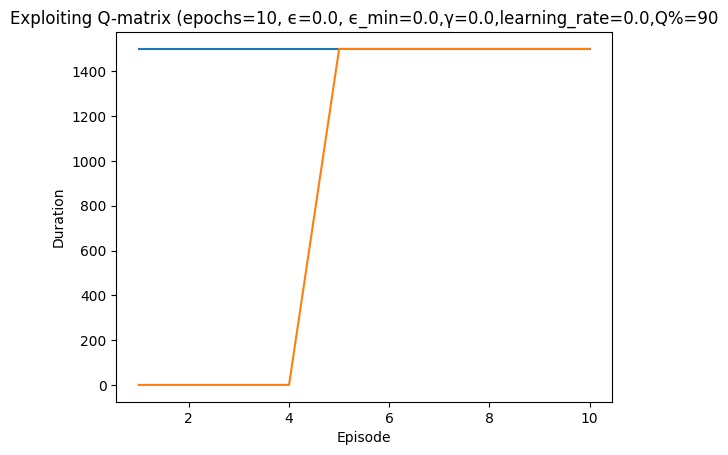

In [24]:
if reload: pass
else:
    # Evaluate an agent that exploits the Q-table learnt above
    tabularq_exploit_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=tqa.QTabularLearner(
            ep,
            trained=tabularq_run['learner'],
            gamma=0.0,
            learning_rate=0.0,
            exploit_percentile=90),
        episode_count=eval_episode_count,
        iteration_count=iteration_count,
        epsilon=0.0,
        render=False,
        verbosity=Verbosity.Normal,
        title="Exploiting Q-matrix"
    )

len(dql_run['all_episodes_availability'])

learner = dql_run['learner']
learner.policy_net.eval()
learner.target_net.eval()


os.makedirs(logs_dir, exist_ok=True)
torch.save(learner.policy_net.state_dict(), 
           os.path.join(logs_dir, "dql_policy_net_state_dict.pt"))
torch.save(learner.target_net.state_dict(), 
           os.path.join(logs_dir, "dql_policy_net_state_dict.pt"))

In [ ]:
learner = dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    )
learner.policy_net.load_state_dict(torch.load(os.path.join(logs_dir, "dql_policy_net_state_dict.pt")))
learner.target_net.load_state_dict(torch.load(os.path.join(logs_dir, "dql_target_net_state_dict.pt")))
learner.policy_net.eval()
learner.target_net.eval()

In [ ]:
reload=False
if reload: pass
else:
    # Evaluate the Deep Q-learning agent
    dql_run_1000 = learner.epsilon_greedy_search(
        cyberbattle_gym_env=gym_env,
        environment_properties=ep,
        learner=dqla.DeepQLearnerPolicy(
            ep=ep,
            gamma=0.015,
            replay_memory_size=10000,
            target_update=10,
            batch_size=512,
            # torch default learning rate is 1e-2
            # a large value helps converge in less episodes
            learning_rate=0.01
        ),
        episode_count=1000,
        iteration_count=iteration_count,
        epsilon=0.90,
        epsilon_exponential_decay=5000,
        epsilon_minimum=0.10,
        verbosity=Verbosity.Quiet,
        render=False,
        plot_episodes_length=False,
        title="DQL"
    )

In [25]:
reload=False
if reload: pass
else:
    # Evaluate the Deep Q-learning agent
    dql_run_200 = learner.epsilon_greedy_search(
        cyberbattle_gym_env=gym_env,
        environment_properties=ep,
        learner=dqla.DeepQLearnerPolicy(
            ep=ep,
            gamma=0.015,
            replay_memory_size=10000,
            target_update=10,
            batch_size=512,
            # torch default learning rate is 1e-2
            # a large value helps converge in less episodes
            learning_rate=0.01
        ),
        episode_count=200,
        iteration_count=iteration_count,
        epsilon=0.90,
        epsilon_exponential_decay=5000,
        epsilon_minimum=0.10,
        verbosity=Verbosity.Quiet,
        render=False,
        plot_episodes_length=False,
        title="DQL"
    )

###### DQL
Learning with: episode_count=200,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/200 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 29|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 29|reward:   22.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 1|Iteration 33|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 1|Iteration 33|reward:   31.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 1|Iteration 34|reward:   31.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 1|Iteration 54|reward:  131.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 1|Iteration 54|reward:  131.0|last_reward_at:   54|Elapsed Time: 0:00:00||
Episode 1|Iteration 76|reward:  131.0|last_reward_at:   54|Elapsed Time: 0:00:00||
Episode 

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/130 (0.02)
    explore-remote: 7/530 (0.01)
    explore-connect: 2/523 (0.00)
    exploit-local: 0/28 (0.00)
    exploit-remote: 1/178 (0.01)
    exploit-connect: 1/98 (0.01)
  exploit deflected to exploration: 3
  ## Episode: 2/200 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 19|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 29|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 29|reward:   22.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 2|Iteration 38|reward:   22.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 2|Iteration 46|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 2|Iteration 46|reward:   33.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 2|Iteration 51|reward:   42.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 

  Episode 2 ended at t=647 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/42 (0.07)
    explore-remote: 7/224 (0.03)
    explore-connect: 3/170 (0.02)
    exploit-local: 0/73 (0.00)
    exploit-remote: 0/113 (0.00)
    exploit-connect: 1/11 (0.08)
  exploit deflected to exploration: 36
  ## Episode: 3/200 'DQL' ϵ=0.6208, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 24|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 3|Iteration 31|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 3|Iteration 38|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 3|Iteration 39|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 3|Iteration 39|reward:   33.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 3|Iteration 48|reward:   42.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 

  Episode 3 ended at t=404 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/38 (0.05)
    explore-remote: 4/111 (0.03)
    explore-connect: 0/102 (0.00)
    exploit-local: 1/20 (0.05)
    exploit-remote: 2/104 (0.02)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 13
  ## Episode: 4/200 'DQL' ϵ=0.5804, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 4|Iteration 19|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 4|Iteration 28|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 4|Iteration 28|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 4|Iteration 32|reward:   47.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 4|Iteration 32|reward:   47.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 4|Iteration 38|reward:   47.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 4|Iteration 45|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode

  Episode 4 ended at t=950 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/56 (0.02)
    explore-remote: 6/239 (0.02)
    explore-connect: 1/241 (0.00)
    exploit-local: 2/25 (0.07)
    exploit-remote: 2/295 (0.01)
    exploit-connect: 3/79 (0.04)
  exploit deflected to exploration: 32
  ## Episode: 5/200 'DQL' ϵ=0.4973, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 5|Iteration 16|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 5|Iteration 16|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 5|Iteration 23|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 5|Iteration 23|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 5|Iteration 28|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 5|Iteration 33|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode

  Episode 5 ended at t=445 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 5/137 (0.04)
    explore-connect: 1/105 (0.01)
    exploit-local: 1/17 (0.06)
    exploit-remote: 3/127 (0.02)
    exploit-connect: 3/29 (0.09)
  exploit deflected to exploration: 51
  ## Episode: 6/200 'DQL' ϵ=0.4634, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 13|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 22|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 6|Iteration 27|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 6|Iteration 27|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 6|Iteration 29|reward:   53.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 6

  Episode 6 ended at t=736 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/34 (0.03)
    explore-remote: 4/180 (0.02)
    explore-connect: 1/173 (0.01)
    exploit-local: 2/67 (0.03)
    exploit-remote: 4/259 (0.02)
    exploit-connect: 3/8 (0.27)
  exploit deflected to exploration: 73
  ## Episode: 7/200 'DQL' ϵ=0.4137, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 7|Iteration 11|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 7|Iteration 11|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 7|Iteration 19|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 7|Iteration 26|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 7|Iteration 35|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 7|Iteration 35|reward:   44.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 

  Episode 7 ended at t=601 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/26 (0.07)
    explore-remote: 1/110 (0.01)
    explore-connect: 0/116 (0.00)
    exploit-local: 1/41 (0.02)
    exploit-remote: 7/236 (0.03)
    exploit-connect: 4/57 (0.07)
  exploit deflected to exploration: 16
  ## Episode: 8/200 'DQL' ϵ=0.3782, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iteration 18|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iteration 22|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 8|Iteration 26|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 8|Iteration 33|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 8|Iteration 35|reward:   47.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 8|

  Episode 8 ended at t=288 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 4/69 (0.05)
    explore-connect: 0/44 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 4/106 (0.04)
    exploit-connect: 4/28 (0.12)
  exploit deflected to exploration: 19
  ## Episode: 9/200 'DQL' ϵ=0.3626, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 15|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 18|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 18|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 9|Iteration 22|reward:   53.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 9|Iteration 22|reward:   53.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 9|I

  Episode 9 ended at t=367 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 5/64 (0.07)
    explore-connect: 0/65 (0.00)
    exploit-local: 1/22 (0.04)
    exploit-remote: 3/161 (0.02)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 19
  ## Episode: 10/200 'DQL' ϵ=0.3440, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 17|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 27|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 28|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 28|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 10|Iteration 31|reward:   47.0|last_reward_at:   28|Elapsed Time: 0:00:00||

  Episode 10 ended at t=367 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 2/79 (0.02)
    explore-connect: 0/61 (0.00)
    exploit-local: 2/36 (0.05)
    exploit-remote: 5/142 (0.03)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 34
  ## Episode: 11/200 'DQL' ϵ=0.3267, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 16|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 21|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 21|reward:   11.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 11|Iteration 22|reward:   22.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 11|Iteration 22|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 11|Iteration 30|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 11|Iteration 30|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 11|Iteration 33|reward:   47.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 11|Iteration 33|reward:   47.0|last_reward_at:   33|Elapsed Time: 0:00:

  Episode 11 ended at t=463 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/18 (0.10)
    explore-remote: 3/104 (0.03)
    explore-connect: 0/82 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 5/196 (0.02)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 68
  ## Episode: 12/200 'DQL' ϵ=0.3067, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 12|Iteration 11|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 12|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 12|Iteration 16|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 12|Iteration 16|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 12|Iteration 19|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 12|Iteration 19|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 12|Iteration 20|reward:   53.0|last_reward_at:   19|Elapsed Time: 0:00:

  Episode 12 ended at t=148 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 4/28 (0.12)
    explore-connect: 0/29 (0.00)
    exploit-local: 0/9 (0.00)
    exploit-remote: 3/51 (0.06)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 16
  ## Episode: 13/200 'DQL' ϵ=0.3007, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 13|Iteration 11|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 13|Iteration 11|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 13|Iteration 19|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 13|Iteration 28|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 13|Iteration 37|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 13|Iteration 39|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:0

  Episode 13 ended at t=437 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 3/63 (0.05)
    explore-connect: 0/62 (0.00)
    exploit-local: 2/47 (0.04)
    exploit-remote: 3/194 (0.02)
    exploit-connect: 4/34 (0.11)
  exploit deflected to exploration: 22
  ## Episode: 14/200 'DQL' ϵ=0.2839, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 14|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 14|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 14|Iteration 8|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 14|Iteration 8|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 14|Iteration 19|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 14|Iteration 27|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 14|Iteration 32|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 14|Iteration 32|reward:   86.0|last_reward_at:   32|Elapsed Time: 0:00:00||


  Episode 14 ended at t=446 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 3/82 (0.04)
    explore-connect: 0/72 (0.00)
    exploit-local: 2/39 (0.05)
    exploit-remote: 4/190 (0.02)
    exploit-connect: 4/32 (0.11)
  exploit deflected to exploration: 46
  ## Episode: 15/200 'DQL' ϵ=0.2682, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 12|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 16|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 15|Iteration 20|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 15|Iteration 20|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 15|Iteration 30|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 15|Iteration 38|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 15|Iteration 47|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:0

  Episode 15 ended at t=131 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 3/22 (0.12)
    explore-connect: 1/8 (0.11)
    exploit-local: 1/9 (0.10)
    exploit-remote: 3/57 (0.05)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 14
  ## Episode: 16/200 'DQL' ϵ=0.2638, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 13|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 19|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 23|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 31|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 36|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 16|Iteration 36|reward:   33.0|last_reward_at:   36|Elapsed Time: 0:00:00|

  Episode 16 ended at t=569 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 1/96 (0.01)
    explore-connect: 0/92 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 7/274 (0.02)
    exploit-connect: 4/52 (0.07)
  exploit deflected to exploration: 70
  ## Episode: 17/200 'DQL' ϵ=0.2462, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 17|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 17|Iteration 14|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 17|Iteration 25|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 17|Iteration 28|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 17|Iteration 28|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 17|Iteration 33|reward:   44.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 17|Iteration 33|reward:   44.0|last_reward_at:   33|Elapsed Time: 0:00:00|

  Episode 17 ended at t=262 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 5/55 (0.08)
    explore-connect: 0/34 (0.00)
    exploit-local: 0/13 (0.00)
    exploit-remote: 3/117 (0.03)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 27
  ## Episode: 18/200 'DQL' ϵ=0.2387, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 20|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 18|Iteration 26|reward:   36.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 18|Iteration 26|reward:   36.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 18|Iteration 35|reward:   36.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 18|Iteration 45|reward:   36.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 18|Iteration 50|reward:   86.0|last_reward_at:   26|Elapsed Time: 0:00:

  Episode 18 ended at t=445 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 4/53 (0.07)
    explore-connect: 0/62 (0.00)
    exploit-local: 3/39 (0.07)
    exploit-remote: 3/221 (0.01)
    exploit-connect: 4/51 (0.07)
  exploit deflected to exploration: 28
  ## Episode: 19/200 'DQL' ϵ=0.2269, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 19|Iteration 13|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 19|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 19|Iteration 19|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 19|Iteration 27|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 19|Iteration 29|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 19|Iteration 29|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 19|Iteration 38|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 19|Iteration 46|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:0

  Episode 19 ended at t=239 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/12 (0.14)
    explore-remote: 3/45 (0.06)
    explore-connect: 0/27 (0.00)
    exploit-local: 1/28 (0.03)
    exploit-remote: 4/100 (0.04)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 31
  ## Episode: 20/200 'DQL' ϵ=0.2210, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 20|Iteration 13|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 20|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 20|Iteration 19|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 20|Iteration 27|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 20|Iteration 30|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 20|Iteration 30|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:0

  Episode 20 ended at t=441 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/13 (0.00)
    explore-remote: 3/75 (0.04)
    explore-connect: 0/59 (0.00)
    exploit-local: 3/19 (0.14)
    exploit-remote: 5/228 (0.02)
    exploit-connect: 4/32 (0.11)
  exploit deflected to exploration: 47
  ## Episode: 21/200 'DQL' ϵ=0.2108, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 21|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 21|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 21|Iteration 9|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 21|Iteration 9|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 21|Iteration 16|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 21|Iteration 16|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 21|Iteration 25|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 21|Iteration 29|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 21|Iteration 35|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

  Episode 21 ended at t=277 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 3/32 (0.09)
    explore-connect: 0/39 (0.00)
    exploit-local: 3/21 (0.12)
    exploit-remote: 4/148 (0.03)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 32
  ## Episode: 22/200 'DQL' ϵ=0.2048, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 22|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 22|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 22|Iteration 15|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 22|Iteration 24|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 22|Iteration 31|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 22|Iteration 31|reward:   36.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 22|Iteration 38|reward:   36.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 22|Iteration 41|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00|

  Episode 22 ended at t=269 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 4/50 (0.07)
    explore-connect: 0/31 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 3/128 (0.02)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 39
  ## Episode: 23/200 'DQL' ϵ=0.1993, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 23|Iteration 12|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 23|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 23|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 23|Iteration 18|reward:   36.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 23|Iteration 18|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 23|Iteration 29|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 23|Iteration 37|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 23|Iteration 39|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:0

  Episode 23 ended at t=598 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/18 (0.05)
    explore-remote: 4/86 (0.04)
    explore-connect: 0/68 (0.00)
    exploit-local: 2/48 (0.04)
    exploit-remote: 3/307 (0.01)
    exploit-connect: 4/57 (0.07)
  exploit deflected to exploration: 54
  ## Episode: 24/200 'DQL' ϵ=0.1881, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 24|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 24|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 24|Iteration 6|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 24|Iteration 6|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 24|Iteration 8|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 24|Iteration 8|reward:   44.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 24|Iteration 9|reward:   58.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 24|Iteration 9|reward:   58.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 24|Iteration 16|reward:   58.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

  Episode 24 ended at t=715 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/23 (0.08)
    explore-remote: 3/102 (0.03)
    explore-connect: 0/117 (0.00)
    exploit-local: 1/25 (0.04)
    exploit-remote: 5/357 (0.01)
    exploit-connect: 4/76 (0.05)
  exploit deflected to exploration: 88
  ## Episode: 25/200 'DQL' ϵ=0.1764, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 10|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 16|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 22|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 29|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 25|Iteration 29|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 25|Iteration 38|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 25|Iteration 39|reward:   47.0|last_reward_at:   29|Elapsed Time: 0:00:00

  Episode 25 ended at t=409 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 3/54 (0.05)
    explore-connect: 0/32 (0.00)
    exploit-local: 1/20 (0.05)
    exploit-remote: 5/215 (0.02)
    exploit-connect: 4/66 (0.06)
  exploit deflected to exploration: 48
  ## Episode: 26/200 'DQL' ϵ=0.1704, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 26|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 26|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 26|Iteration 9|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 26|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 26|Iteration 18|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 26|Iteration 26|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 26|Iteration 31|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 26|Iteration 31|reward:   47.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 26|Iteration 33|reward:   97.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 26 ended at t=375 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 5/59 (0.08)
    explore-connect: 0/46 (0.00)
    exploit-local: 2/16 (0.11)
    exploit-remote: 3/166 (0.02)
    exploit-connect: 4/59 (0.06)
  exploit deflected to exploration: 52
  ## Episode: 27/200 'DQL' ϵ=0.1653, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 27|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 27|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 27|Iteration 5|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 27|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 27|Iteration 12|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 27|Iteration 19|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 27|Iteration 23|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 27|Iteration 23|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 27 ended at t=246 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 2/42 (0.05)
    explore-connect: 0/24 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 4/118 (0.03)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 33
  ## Episode: 28/200 'DQL' ϵ=0.1622, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 28|Iteration 15|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 28|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 28|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 28|Iteration 26|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 28|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 28|Iteration 35|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 28|Iteration 42|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 28|Iteration 44|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:0

  Episode 28 ended at t=296 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/43 (0.04)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 6/149 (0.04)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 54
  ## Episode: 29/200 'DQL' ϵ=0.1586, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 29|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 29|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 9|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 15|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 19|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 26|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 36|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 29|Iteration 42|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

  Episode 29 ended at t=228 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/44 (0.00)
    explore-connect: 1/13 (0.07)
    exploit-local: 2/12 (0.14)
    exploit-remote: 6/128 (0.04)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 36
  ## Episode: 30/200 'DQL' ϵ=0.1560, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 30|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 30|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 30|Iteration 9|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 30|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 30|Iteration 12|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 30|Iteration 12|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 30|Iteration 19|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 30|Iteration 23|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 30|Iteration 32|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||

  Episode 30 ended at t=332 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 4/41 (0.09)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/32 (0.06)
    exploit-remote: 2/161 (0.01)
    exploit-connect: 4/41 (0.09)
  exploit deflected to exploration: 41
  ## Episode: 31/200 'DQL' ϵ=0.1524, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 11|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 11|reward:   11.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 31|Iteration 12|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 31|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 31|Iteration 16|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 31|Iteration 16|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 31|Iteration 22|reward:   44.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 31|Iteration 22|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 31|Iteration 31|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:

  Episode 31 ended at t=171 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/31 (0.03)
    explore-connect: 0/14 (0.00)
    exploit-local: 2/12 (0.14)
    exploit-remote: 5/81 (0.06)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 31
  ## Episode: 32/200 'DQL' ϵ=0.1506, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 9|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 14|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 17|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 32|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 32|Iteration 25|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 32|Iteration 28|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 32|Iteration 28|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 32|Iteration 33|reward:   47.0|last_reward_at:   28|Elapsed Time: 0:00:00

  Episode 32 ended at t=517 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 2/74 (0.03)
    explore-connect: 0/62 (0.00)
    exploit-local: 1/53 (0.02)
    exploit-remote: 5/266 (0.02)
    exploit-connect: 4/34 (0.11)
  exploit deflected to exploration: 82
  ## Episode: 33/200 'DQL' ϵ=0.1457, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 8|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 33|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 33|Iteration 13|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 33|Iteration 15|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 33|Iteration 15|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 33|Iteration 22|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 33|Iteration 23|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||

  Episode 33 ended at t=410 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 3/35 (0.08)
    explore-connect: 0/34 (0.00)
    exploit-local: 2/39 (0.05)
    exploit-remote: 5/233 (0.02)
    exploit-connect: 4/43 (0.09)
  exploit deflected to exploration: 27
  ## Episode: 34/200 'DQL' ϵ=0.1421, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 34|Iteration 8|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 34|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 34|Iteration 9|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 34|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 34|Iteration 16|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 34|Iteration 18|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 34|Iteration 18|reward:   47.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 34|Iteration 21|reward:   58.0|last_reward_at:   18|Elapsed Time: 0:00:00||


  Episode 34 ended at t=264 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 1/30 (0.03)
    explore-connect: 0/26 (0.00)
    exploit-local: 2/21 (0.09)
    exploit-remote: 5/145 (0.03)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 27
  ## Episode: 35/200 'DQL' ϵ=0.1399, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 13|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 35|Iteration 14|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 35|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 35|Iteration 24|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 35|Iteration 26|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 35|Iteration 26|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 35|Iteration 32|reward:   58.0|last_reward_at:   26|Elapsed Time: 0:00:0

  Episode 35 ended at t=388 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 3/57 (0.05)
    explore-connect: 0/43 (0.00)
    exploit-local: 2/22 (0.08)
    exploit-remote: 5/221 (0.02)
    exploit-connect: 4/26 (0.13)
  exploit deflected to exploration: 50
  ## Episode: 36/200 'DQL' ϵ=0.1369, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 36|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 36|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 36|Iteration 7|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 36|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 36|Iteration 12|reward:   47.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 36|Iteration 12|reward:   47.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 36|Iteration 19|reward:   47.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 36|Iteration 21|reward:   56.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 36|Iteration 21|reward:   56.0|last_reward_at:   21|Elapsed Time: 0:00:00||

  Episode 36 ended at t=188 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/12 (0.00)
    exploit-local: 2/30 (0.06)
    exploit-remote: 6/91 (0.06)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 7
  ## Episode: 37/200 'DQL' ϵ=0.1356, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 37|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 37|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 37|Iteration 12|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 37|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 37|Iteration 13|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 37|Iteration 13|reward:   44.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 37|Iteration 19|reward:   44.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 37|Iteration 22|reward:   58.0|last_reward_at:   13|Elapsed Time: 0:00:00|

  Episode 37 ended at t=215 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 1/13 (0.07)
    explore-connect: 0/21 (0.00)
    exploit-local: 0/12 (0.00)
    exploit-remote: 7/110 (0.06)
    exploit-connect: 4/37 (0.10)
  exploit deflected to exploration: 21
  ## Episode: 38/200 'DQL' ϵ=0.1341, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 38|Iteration 9|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 38|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 38|Iteration 10|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 38|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 38|Iteration 18|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 38|Iteration 27|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 38|Iteration 36|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 38|Iteration 40|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00|

  Episode 38 ended at t=395 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 3/48 (0.06)
    explore-connect: 0/43 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 5/216 (0.02)
    exploit-connect: 4/37 (0.10)
  exploit deflected to exploration: 50
  ## Episode: 39/200 'DQL' ϵ=0.1315, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 39|Iteration 10|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 39|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 39|Iteration 18|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 39|Iteration 19|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 39|Iteration 19|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 39|Iteration 26|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 39|Iteration 34|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 39|Iteration 35|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:0

  Episode 39 ended at t=285 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/12 (0.14)
    explore-remote: 1/37 (0.03)
    explore-connect: 0/23 (0.00)
    exploit-local: 1/24 (0.04)
    exploit-remote: 6/152 (0.04)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 32
  ## Episode: 40/200 'DQL' ϵ=0.1297, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 40|Iteration 9|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 40|Iteration 13|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 40|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 40|Iteration 17|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 40|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 40|Iteration 26|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 40|Iteration 30|reward:   44.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 40|Iteration 30|reward:   44.0|last_reward_at:   30|Elapsed Time: 0:00:00

  Episode 40 ended at t=218 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/47 (0.04)
    explore-connect: 0/24 (0.00)
    exploit-local: 3/9 (0.25)
    exploit-remote: 5/108 (0.04)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 39
  ## Episode: 41/200 'DQL' ϵ=0.1285, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 41|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 41|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 41|Iteration 13|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 41|Iteration 17|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 41|Iteration 23|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 41|Iteration 29|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 41|Iteration 32|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 41|Iteration 32|reward:   31.0|last_reward_at:   32|Elapsed Time: 0:00:00|

  Episode 41 ended at t=246 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/10 (0.00)
    explore-remote: 1/31 (0.03)
    explore-connect: 0/23 (0.00)
    exploit-local: 3/22 (0.12)
    exploit-remote: 6/129 (0.04)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 29
  ## Episode: 42/200 'DQL' ϵ=0.1271, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 42|Iteration 8|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 42|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 42|Iteration 14|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 42|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 42|Iteration 15|reward:   47.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 42|Iteration 15|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 42|Iteration 16|reward:   97.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 42|Iteration 16|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:00|

  Episode 42 ended at t=196 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/24 (0.04)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 6/108 (0.05)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 24
  ## Episode: 43/200 'DQL' ϵ=0.1260, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 43|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 43|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 43|Iteration 17|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 43|Iteration 27|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 43|Iteration 34|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 43|Iteration 35|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 43|Iteration 35|reward:   36.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 43|Iteration 43|reward:   36.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 43|Iteration 45|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:00:00

  Episode 43 ended at t=363 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 1/35 (0.03)
    explore-connect: 0/35 (0.00)
    exploit-local: 1/26 (0.04)
    exploit-remote: 7/197 (0.03)
    exploit-connect: 4/41 (0.09)
  exploit deflected to exploration: 36
  ## Episode: 44/200 'DQL' ϵ=0.1242, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 44|Iteration 11|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 44|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 44|Iteration 14|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 44|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 44|Iteration 19|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 44|Iteration 19|reward:   42.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 44|Iteration 19|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 44|Iteration 27|reward:   53.0|last_reward_at:   19|Elapsed Time: 0:00:0

  Episode 44 ended at t=422 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/47 (0.02)
    explore-connect: 0/45 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 7/227 (0.03)
    exploit-connect: 4/59 (0.06)
  exploit deflected to exploration: 35
  ## Episode: 45/200 'DQL' ϵ=0.1223, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 14|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 21|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 27|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 33|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 37|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 41|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 45|Iteration 41|reward:   22.0|last_reward_at:   41|Elapsed Time: 0:00:00||
Episode 45|Iteration 47|reward:   22.0|last_reward_at:   41|Elapsed Time: 0:00:0

  Episode 45 ended at t=231 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/38 (0.05)
    explore-connect: 1/20 (0.05)
    exploit-local: 2/9 (0.18)
    exploit-remote: 6/125 (0.05)
    exploit-connect: 3/14 (0.18)
  exploit deflected to exploration: 45
  ## Episode: 46/200 'DQL' ϵ=0.1213, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 46|Iteration 13|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 46|Iteration 18|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 46|Iteration 20|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 46|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 46|Iteration 26|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 46|Iteration 26|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 46|Iteration 36|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 46|Iteration 39|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:0

  Episode 46 ended at t=401 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 0/32 (0.00)
    explore-connect: 0/34 (0.00)
    exploit-local: 2/33 (0.06)
    exploit-remote: 7/241 (0.03)
    exploit-connect: 4/37 (0.10)
  exploit deflected to exploration: 39
  ## Episode: 47/200 'DQL' ϵ=0.1196, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 47|Iteration 9|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 47|Iteration 10|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 47|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 47|Iteration 17|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 47|Iteration 17|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 47|Iteration 19|reward:   86.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 47|Iteration 19|reward:   86.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 47|Iteration 27|reward:   86.0|last_reward_at:   19|Elapsed Time: 0:00:00

  Episode 47 ended at t=285 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/44 (0.04)
    explore-connect: 0/47 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 4/137 (0.03)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 54
  ## Episode: 48/200 'DQL' ϵ=0.1185, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 48|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 48|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 48|Iteration 18|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 48|Iteration 20|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 48|Iteration 20|reward:   36.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 48|Iteration 22|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 48|Iteration 22|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 48|Iteration 28|reward:   92.0|last_reward_at:   22|Elapsed Time: 0:00:0

  Episode 48 ended at t=342 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/38 (0.03)
    explore-connect: 0/37 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 7/193 (0.04)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 48
  ## Episode: 49/200 'DQL' ϵ=0.1173, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 49|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 49|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 49|Iteration 5|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 49|Iteration 5|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 49|Iteration 15|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 49|Iteration 20|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 49|Iteration 20|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 49|Iteration 24|reward:   92.0|last_reward_at:   20|Elapsed Time: 0:00:00||


  Episode 49 ended at t=560 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 0/78 (0.00)
    explore-connect: 0/75 (0.00)
    exploit-local: 1/29 (0.03)
    exploit-remote: 7/318 (0.02)
    exploit-connect: 4/32 (0.11)
  exploit deflected to exploration: 95
  ## Episode: 50/200 'DQL' ϵ=0.1155, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 50|Iteration 10|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 50|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 50|Iteration 16|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 50|Iteration 18|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 50|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 50|Iteration 28|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 50|Iteration 29|reward:   44.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 50|Iteration 29|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:0

  Episode 50 ended at t=323 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 1/34 (0.03)
    explore-connect: 1/26 (0.04)
    exploit-local: 1/18 (0.05)
    exploit-remote: 5/178 (0.03)
    exploit-connect: 3/45 (0.06)
  exploit deflected to exploration: 36
  ## Episode: 51/200 'DQL' ϵ=0.1145, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 51|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 51|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 51|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 51|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 51|Iteration 9|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 51|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 51|Iteration 12|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 51|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 51|Iteration 19|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 51|Iteration 19|reward:   47.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 51|Iteration 19|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 51|Iteration 28|reward:   58.0|last_reward_at:   19|Elapsed Time: 0:00:00|

  Episode 51 ended at t=191 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 4/20 (0.17)
    explore-connect: 0/13 (0.00)
    exploit-local: 2/9 (0.18)
    exploit-remote: 4/93 (0.04)
    exploit-connect: 4/38 (0.10)
  exploit deflected to exploration: 22
  ## Episode: 52/200 'DQL' ϵ=0.1140, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 52|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 52|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 52|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 52|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 52|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 52|Iteration 11|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 52|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 52|Iteration 19|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 52|Iteration 20|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 52|Iteration 20|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 52|Iteration 28|reward:  142.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 52|Iteration 28|reward:  142.0|last_reward_at:   28|Elapsed Time: 0:00:00

  Episode 52 ended at t=186 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/21 (0.05)
    explore-connect: 0/12 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 6/95 (0.06)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 20
  ## Episode: 53/200 'DQL' ϵ=0.1135, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 53|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 53|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 53|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 53|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 53|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 53|Iteration 12|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 53|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 53|Iteration 18|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 53|Iteration 24|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 53|Iteration 31|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 53|Iteration 34|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 53|Iteration 34|reward:   44.0|last_reward_at:   34|Elapsed Time: 0:00:00

  Episode 53 ended at t=196 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 4/17 (0.19)
    explore-connect: 0/11 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 3/99 (0.03)
    exploit-connect: 4/31 (0.11)
  exploit deflected to exploration: 25
  ## Episode: 54/200 'DQL' ϵ=0.1129, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 54|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 54|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 54|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 54|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 54|Iteration 10|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 54|Iteration 15|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 54|Iteration 19|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 54|Iteration 19|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 54|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 54|Iteration 25|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 54|Iteration 25|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 54|Iteration 35|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:0

  Episode 54 ended at t=254 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 2/31 (0.06)
    explore-connect: 0/34 (0.00)
    exploit-local: 1/18 (0.05)
    exploit-remote: 5/131 (0.04)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 42
  ## Episode: 55/200 'DQL' ϵ=0.1123, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 55|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 55|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 55|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 55|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 55|Iteration 8|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 55|Iteration 18|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 55|Iteration 27|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 55|Iteration 35|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 55|Iteration 35|reward:   22.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 55|Iteration 45|reward:   22.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 55|Iteration 46|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 55|Iteration 46|reward:   33.0|last_reward_at:   46|Elapsed Time: 0:00:00

  Episode 55 ended at t=218 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 2/20 (0.09)
    explore-connect: 0/15 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 4/116 (0.03)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 23
  ## Episode: 56/200 'DQL' ϵ=0.1118, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 56|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 56|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 56|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 56|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 56|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 56|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 56|Iteration 15|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 56|Iteration 19|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 56|Iteration 25|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 56|Iteration 34|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 56|Iteration 35|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 56|Iteration 35|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:00|

  Episode 56 ended at t=172 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 2/22 (0.08)
    explore-connect: 1/13 (0.07)
    exploit-local: 1/14 (0.07)
    exploit-remote: 5/81 (0.06)
    exploit-connect: 3/20 (0.13)
  exploit deflected to exploration: 25
  ## Episode: 57/200 'DQL' ϵ=0.1114, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 57|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 57|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 57|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 57|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 57|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 57|Iteration 11|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 57|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 57|Iteration 13|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 57|Iteration 13|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 57|Iteration 17|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 57|Iteration 26|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 57|Iteration 30|reward:   42.0|last_reward_at:   13|Elapsed Time: 0:00:

  Episode 57 ended at t=170 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/28 (0.03)
    explore-connect: 0/15 (0.00)
    exploit-local: 2/8 (0.20)
    exploit-remote: 6/80 (0.07)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 26
  ## Episode: 58/200 'DQL' ϵ=0.1110, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 58|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 58|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 58|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 58|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 58|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 58|Iteration 17|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 58|Iteration 17|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 58|Iteration 21|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 58|Iteration 21|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 58|Iteration 28|reward:   97.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 58|Iteration 28|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 58|Iteration 35|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:00:

  Episode 58 ended at t=231 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/23 (0.00)
    exploit-local: 2/15 (0.12)
    exploit-remote: 6/118 (0.05)
    exploit-connect: 4/30 (0.12)
  exploit deflected to exploration: 31
  ## Episode: 59/200 'DQL' ϵ=0.1105, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 59|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 59|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 59|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 59|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 59|Iteration 15|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 59|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 59|Iteration 19|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 59|Iteration 19|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 59|Iteration 21|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 59|Iteration 21|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 59|Iteration 32|reward:   56.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 59|Iteration 32|reward:   56.0|last_reward_at:   32|Elapsed Time: 0:00:

  Episode 59 ended at t=329 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 1/30 (0.03)
    explore-connect: 0/24 (0.00)
    exploit-local: 1/39 (0.03)
    exploit-remote: 6/200 (0.03)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 44
  ## Episode: 60/200 'DQL' ϵ=0.1098, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 60|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 60|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 60|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 60|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 60|Iteration 9|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 60|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 60|Iteration 18|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 60|Iteration 25|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 60|Iteration 25|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 60|Iteration 34|reward:   44.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 60|Iteration 34|reward:   44.0|last_reward_at:   34|Elapsed Time: 0:00:00||
Episode 60|Iteration 37|reward:   58.0|last_reward_at:   34|Elapsed Time: 0:00:00|

  Episode 60 ended at t=280 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/41 (0.05)
    explore-connect: 0/22 (0.00)
    exploit-local: 2/25 (0.07)
    exploit-remote: 5/141 (0.03)
    exploit-connect: 4/31 (0.11)
  exploit deflected to exploration: 39
  ## Episode: 61/200 'DQL' ϵ=0.1093, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 61|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 61|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 61|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 61|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 61|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 61|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 61|Iteration 16|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 61|Iteration 23|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 61|Iteration 27|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 61|Iteration 27|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 61|Iteration 36|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 61|Iteration 45|reward:   86.0|last_reward_at:   27|Elapsed Time: 0:00:00|

  Episode 61 ended at t=223 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 2/27 (0.07)
    explore-connect: 0/9 (0.00)
    exploit-local: 1/20 (0.05)
    exploit-remote: 6/117 (0.05)
    exploit-connect: 4/31 (0.11)
  exploit deflected to exploration: 22
  ## Episode: 62/200 'DQL' ϵ=0.1089, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 62|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 62|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 62|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 62|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 62|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 62|Iteration 13|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 62|Iteration 13|reward:   36.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 62|Iteration 19|reward:   36.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 62|Iteration 29|reward:   36.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 62|Iteration 30|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 62|Iteration 30|reward:   86.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 62|Iteration 38|reward:   86.0|last_reward_at:   30|Elapsed Time: 0:00:00

  Episode 62 ended at t=732 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/75 (0.03)
    explore-connect: 0/99 (0.00)
    exploit-local: 2/54 (0.04)
    exploit-remote: 6/417 (0.01)
    exploit-connect: 4/62 (0.06)
  exploit deflected to exploration: 104
  ## Episode: 63/200 'DQL' ϵ=0.1077, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 63|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 63|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 63|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 63|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 63|Iteration 11|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 63|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 63|Iteration 17|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 63|Iteration 23|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 63|Iteration 26|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 63|Iteration 26|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 63|Iteration 36|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 63|Iteration 43|reward:  131.0|last_reward_at:   26|Elapsed Time: 0:00:0

  Episode 63 ended at t=172 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 1/13 (0.07)
    explore-connect: 0/13 (0.00)
    exploit-local: 1/19 (0.05)
    exploit-remote: 5/94 (0.05)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 19
  ## Episode: 64/200 'DQL' ϵ=0.1074, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 64|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 64|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 64|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 64|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 64|Iteration 10|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 64|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 64|Iteration 12|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 64|Iteration 12|reward:   36.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 64|Iteration 15|reward:   86.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 64|Iteration 15|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 64|Iteration 24|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 64|Iteration 28|reward:   97.0|last_reward_at:   15|Elapsed Time: 0:00:0

  Episode 64 ended at t=202 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 3/25 (0.11)
    explore-connect: 0/17 (0.00)
    exploit-local: 1/16 (0.06)
    exploit-remote: 4/110 (0.04)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 23
  ## Episode: 65/200 'DQL' ϵ=0.1071, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 65|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 65|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 65|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 65|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 65|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 65|Iteration 13|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 65|Iteration 19|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 65|Iteration 25|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 65|Iteration 31|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 65|Iteration 38|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 65|Iteration 44|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 65|Iteration 44|reward:   36.0|last_reward_at:   44|Elapsed Time: 0:00:00

  Episode 65 ended at t=295 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 1/34 (0.03)
    explore-connect: 0/24 (0.00)
    exploit-local: 1/30 (0.03)
    exploit-remote: 6/160 (0.04)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 37
  ## Episode: 66/200 'DQL' ϵ=0.1067, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 66|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 66|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 66|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 66|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 66|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 66|Iteration 8|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 66|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 66|Iteration 12|reward:   47.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 66|Iteration 12|reward:   47.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 66|Iteration 17|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 66|Iteration 17|reward:   97.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 66|Iteration 23|reward:   97.0|last_reward_at:   17|Elapsed Time: 0:00:00||

  Episode 66 ended at t=447 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 2/41 (0.05)
    explore-connect: 0/41 (0.00)
    exploit-local: 1/33 (0.03)
    exploit-remote: 6/274 (0.02)
    exploit-connect: 4/39 (0.09)
  exploit deflected to exploration: 38
  ## Episode: 67/200 'DQL' ϵ=0.1061, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 67|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 67|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 67|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 67|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 67|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 67|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 67|Iteration 17|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 67|Iteration 18|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 67|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 67|Iteration 23|reward:   44.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 67|Iteration 23|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 67|Iteration 29|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:00|

  Episode 67 ended at t=740 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 4/86 (0.04)
    explore-connect: 0/64 (0.00)
    exploit-local: 2/63 (0.03)
    exploit-remote: 4/427 (0.01)
    exploit-connect: 4/73 (0.05)
  exploit deflected to exploration: 102
  ## Episode: 68/200 'DQL' ϵ=0.1053, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 68|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 68|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 68|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 68|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 68|Iteration 16|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 68|Iteration 18|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 68|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 68|Iteration 23|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 68|Iteration 27|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 68|Iteration 31|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 68|Iteration 34|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 68|Iteration 38|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:0

  Episode 68 ended at t=299 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 2/35 (0.05)
    explore-connect: 0/14 (0.00)
    exploit-local: 2/19 (0.10)
    exploit-remote: 6/187 (0.03)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 32
  ## Episode: 69/200 'DQL' ϵ=0.1050, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 69|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 69|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 69|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 69|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 69|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 69|Iteration 5|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 69|Iteration 5|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 69|Iteration 15|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 69|Iteration 22|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 69|Iteration 22|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 69|Iteration 31|reward:   56.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 69|Iteration 31|reward:   56.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 69 ended at t=129 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/18 (0.05)
    explore-connect: 0/12 (0.00)
    exploit-local: 2/7 (0.22)
    exploit-remote: 5/69 (0.07)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 15
  ## Episode: 70/200 'DQL' ϵ=0.1049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 70|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 70|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 70|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 70|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 70|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 70|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 70|Iteration 13|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 70|Iteration 15|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 70|Iteration 15|reward:   36.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 70|Iteration 19|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 70|Iteration 19|reward:   86.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 70|Iteration 25|reward:   86.0|last_reward_at:   19|Elapsed Time: 0:00:00|

  Episode 70 ended at t=333 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 0/36 (0.00)
    explore-connect: 0/25 (0.00)
    exploit-local: 1/29 (0.03)
    exploit-remote: 7/199 (0.03)
    exploit-connect: 4/26 (0.13)
  exploit deflected to exploration: 38
  ## Episode: 71/200 'DQL' ϵ=0.1045, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 71|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 71|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 71|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 71|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 71|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 71|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 71|Iteration 17|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 71|Iteration 20|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 71|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 71|Iteration 22|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 71|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 71|Iteration 25|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:0

  Episode 71 ended at t=513 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 3/65 (0.04)
    explore-connect: 0/59 (0.00)
    exploit-local: 2/40 (0.05)
    exploit-remote: 5/285 (0.02)
    exploit-connect: 4/40 (0.09)
  exploit deflected to exploration: 83
  ## Episode: 72/200 'DQL' ϵ=0.1041, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 72|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 72|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 72|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 72|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 72|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 72|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 72|Iteration 9|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 72|Iteration 9|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 72|Iteration 14|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 72|Iteration 19|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 72|Iteration 27|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 72|Iteration 36|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||


  Episode 72 ended at t=695 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/23 (0.04)
    explore-remote: 2/88 (0.02)
    explore-connect: 0/66 (0.00)
    exploit-local: 2/81 (0.02)
    exploit-remote: 5/406 (0.01)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 106
  ## Episode: 73/200 'DQL' ϵ=0.1036, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 73|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 73|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 73|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 73|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 73|Iteration 13|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 73|Iteration 19|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 73|Iteration 19|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 73|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 73|Iteration 26|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 73|Iteration 26|reward:   36.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 73|Iteration 28|reward:   86.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 73|Iteration 28|reward:   86.0|last_reward_at:   28|Elapsed Time: 0:00:0

  Episode 73 ended at t=289 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 0/39 (0.00)
    explore-connect: 0/25 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 7/182 (0.04)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 43
  ## Episode: 74/200 'DQL' ϵ=0.1034, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 74|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 74|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 74|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 74|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 74|Iteration 15|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 74|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 74|Iteration 20|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 74|Iteration 20|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 74|Iteration 21|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 74|Iteration 21|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 74|Iteration 22|reward:  142.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 74|Iteration 22|reward:  142.0|last_reward_at:   22|Elapsed Time: 0:00:0

  Episode 74 ended at t=228 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 2/22 (0.08)
    explore-connect: 0/8 (0.00)
    exploit-local: 3/19 (0.14)
    exploit-remote: 6/148 (0.04)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 17
  ## Episode: 75/200 'DQL' ϵ=0.1032, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 75|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 75|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 75|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 75|Iteration 9|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 75|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 75|Iteration 18|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 75|Iteration 26|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 75|Iteration 32|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 75|Iteration 32|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 75|Iteration 38|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 75|Iteration 46|reward:   44.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 75|Iteration 46|reward:   44.0|last_reward_at:   46|Elapsed Time: 0:00:00

  Episode 75 ended at t=240 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 1/18 (0.05)
    explore-connect: 0/12 (0.00)
    exploit-local: 1/20 (0.05)
    exploit-remote: 7/145 (0.05)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 22
  ## Episode: 76/200 'DQL' ϵ=0.1031, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 76|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 76|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 76|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 76|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 76|Iteration 5|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 76|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 76|Iteration 11|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 76|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 76|Iteration 14|reward:  131.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 76|Iteration 14|reward:  131.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 76|Iteration 16|reward:  142.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 76|Iteration 16|reward:  142.0|last_reward_at:   16|Elapsed Time: 0:00:00|

  Episode 76 ended at t=356 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/31 (0.06)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/34 (0.06)
    exploit-remote: 5/194 (0.03)
    exploit-connect: 4/57 (0.07)
  exploit deflected to exploration: 22
  ## Episode: 77/200 'DQL' ϵ=0.1029, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 77|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 77|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 77|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 77|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 77|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 77|Iteration 6|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 77|Iteration 6|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 77|Iteration 16|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 77|Iteration 23|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 77|Iteration 29|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 77|Iteration 29|reward:   86.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 77|Iteration 34|reward:   86.0|last_reward_at:   29|Elapsed Time: 0:00:00||

  Episode 77 ended at t=268 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/32 (0.06)
    explore-connect: 0/24 (0.00)
    exploit-local: 2/22 (0.08)
    exploit-remote: 4/160 (0.02)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 37
  ## Episode: 78/200 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 78|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 78|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 78|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 78|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 78|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 78|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 78|Iteration 8|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 78|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 78|Iteration 18|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 78|Iteration 28|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 78|Iteration 36|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 78|Iteration 43|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||


  Episode 78 ended at t=301 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 3/44 (0.06)
    explore-connect: 0/26 (0.00)
    exploit-local: 1/18 (0.05)
    exploit-remote: 5/174 (0.03)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 49
  ## Episode: 79/200 'DQL' ϵ=0.1026, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 79|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 79|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 79|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 79|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 79|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 79|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 79|Iteration 16|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 79|Iteration 18|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 79|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 79|Iteration 26|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 79|Iteration 34|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 79|Iteration 36|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00|

  Episode 79 ended at t=354 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 2/44 (0.04)
    explore-connect: 1/40 (0.02)
    exploit-local: 2/42 (0.05)
    exploit-remote: 5/177 (0.03)
    exploit-connect: 3/28 (0.10)
  exploit deflected to exploration: 52
  ## Episode: 80/200 'DQL' ϵ=0.1024, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 80|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 80|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 80|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 80|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 80|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 80|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 80|Iteration 15|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 80|Iteration 16|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 80|Iteration 16|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 80|Iteration 26|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 80|Iteration 36|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 80|Iteration 42|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00|

  Episode 80 ended at t=180 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 2/21 (0.09)
    explore-connect: 0/13 (0.00)
    exploit-local: 2/28 (0.07)
    exploit-remote: 5/91 (0.05)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 27
  ## Episode: 81/200 'DQL' ϵ=0.1023, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 81|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 81|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 81|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 81|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 81|Iteration 7|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 81|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 81|Iteration 9|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 81|Iteration 9|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 81|Iteration 18|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 81|Iteration 21|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 81|Iteration 21|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 81|Iteration 30|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||


  Episode 81 ended at t=263 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/16 (0.00)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/18 (0.10)
    exploit-remote: 6/163 (0.04)
    exploit-connect: 4/31 (0.11)
  exploit deflected to exploration: 17
  ## Episode: 82/200 'DQL' ϵ=0.1022, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 82|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 82|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 82|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 82|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 82|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 82|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 82|Iteration 7|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 82|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 82|Iteration 13|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 82|Iteration 19|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 82|Iteration 20|reward:   42.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 82|Iteration 20|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||


  Episode 82 ended at t=197 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/24 (0.00)
    explore-connect: 0/15 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 6/108 (0.05)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 23
  ## Episode: 83/200 'DQL' ϵ=0.1021, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 83|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 83|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 83|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 83|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 83|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 83|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 83|Iteration 7|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 83|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 83|Iteration 15|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 83|Iteration 17|reward:   47.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 83|Iteration 17|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 83|Iteration 23|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:00||


  Episode 83 ended at t=132 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 4/13 (0.24)
    explore-connect: 0/10 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 3/69 (0.04)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 18
  ## Episode: 84/200 'DQL' ϵ=0.1020, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 84|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 84|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 84|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 84|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 84|Iteration 10|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 84|Iteration 15|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 84|Iteration 19|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 84|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 84|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 84|Iteration 23|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 84|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 84|Iteration 24|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:0

  Episode 84 ended at t=339 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 2/41 (0.05)
    explore-connect: 0/34 (0.00)
    exploit-local: 2/42 (0.05)
    exploit-remote: 5/189 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 48
  ## Episode: 85/200 'DQL' ϵ=0.1019, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 85|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 85|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 85|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 85|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 85|Iteration 9|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 85|Iteration 11|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 85|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 85|Iteration 16|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 85|Iteration 16|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 85|Iteration 22|reward:  131.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 85|Iteration 22|reward:  131.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 85|Iteration 24|reward:  142.0|last_reward_at:   22|Elapsed Time: 0:00:00

  Episode 85 ended at t=140 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 2/11 (0.15)
    explore-connect: 0/7 (0.00)
    exploit-local: 2/10 (0.17)
    exploit-remote: 4/75 (0.05)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 12
  ## Episode: 86/200 'DQL' ϵ=0.1019, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 86|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 86|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 86|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 86|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 86|Iteration 10|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 86|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 86|Iteration 14|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 86|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 86|Iteration 19|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 86|Iteration 26|reward:   42.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 86|Iteration 26|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 86|Iteration 36|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:0

  Episode 86 ended at t=236 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 1/24 (0.04)
    explore-connect: 0/16 (0.00)
    exploit-local: 0/6 (0.00)
    exploit-remote: 7/146 (0.05)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 21
  ## Episode: 87/200 'DQL' ϵ=0.1018, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 87|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 87|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 87|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 87|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 87|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 87|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 87|Iteration 16|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 87|Iteration 16|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 87|Iteration 25|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 87|Iteration 25|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 87|Iteration 32|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 87|Iteration 38|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:0

  Episode 87 ended at t=299 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 2/20 (0.09)
    explore-connect: 0/26 (0.00)
    exploit-local: 2/32 (0.06)
    exploit-remote: 5/167 (0.03)
    exploit-connect: 4/31 (0.11)
  exploit deflected to exploration: 33
  ## Episode: 88/200 'DQL' ϵ=0.1017, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 88|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 88|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 88|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 88|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 88|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 88|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 88|Iteration 5|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 88|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 88|Iteration 12|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 88|Iteration 19|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 88|Iteration 22|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 88|Iteration 22|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||


  Episode 88 ended at t=187 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 1/20 (0.05)
    explore-connect: 0/8 (0.00)
    exploit-local: 1/24 (0.04)
    exploit-remote: 7/95 (0.07)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 17
  ## Episode: 89/200 'DQL' ϵ=0.1016, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 89|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 89|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 89|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 89|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 89|Iteration 16|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 89|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 89|Iteration 24|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 89|Iteration 27|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 89|Iteration 27|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 89|Iteration 32|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 89|Iteration 32|reward:   42.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 89|Iteration 33|reward:   53.0|last_reward_at:   32|Elapsed Time: 0:00:

  Episode 89 ended at t=310 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 3/27 (0.10)
    explore-connect: 0/29 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 4/180 (0.02)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 36
  ## Episode: 90/200 'DQL' ϵ=0.1015, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 90|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 90|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 90|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 90|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 90|Iteration 16|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 90|Iteration 25|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 90|Iteration 28|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 90|Iteration 28|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 90|Iteration 36|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 90|Iteration 37|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 90|Iteration 37|reward:   33.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 90|Iteration 44|reward:   44.0|last_reward_at:   37|Elapsed Time: 0:00:0

  Episode 90 ended at t=185 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 1/28 (0.03)
    explore-connect: 0/20 (0.00)
    exploit-local: 3/10 (0.23)
    exploit-remote: 5/102 (0.05)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 34
  ## Episode: 91/200 'DQL' ϵ=0.1015, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 91|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 91|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 91|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 91|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 91|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 91|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 91|Iteration 10|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 91|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 91|Iteration 15|reward:   42.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 91|Iteration 15|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 91|Iteration 22|reward:  142.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 91|Iteration 22|reward:  142.0|last_reward_at:   22|Elapsed Time: 0:00:00|

  Episode 91 ended at t=436 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 2/49 (0.04)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/43 (0.04)
    exploit-remote: 4/266 (0.01)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 60
  ## Episode: 92/200 'DQL' ϵ=0.1013, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 92|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 92|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 92|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 92|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 92|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 92|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 92|Iteration 12|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 92|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 92|Iteration 27|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 92|Iteration 32|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 92|Iteration 32|reward:   31.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 92|Iteration 38|reward:   31.0|last_reward_at:   32|Elapsed Time: 0:00:00|

  Episode 92 ended at t=214 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 1/31 (0.03)
    explore-connect: 0/17 (0.00)
    exploit-local: 1/16 (0.06)
    exploit-remote: 6/116 (0.05)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 33
  ## Episode: 93/200 'DQL' ϵ=0.1013, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 93|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 93|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 93|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 93|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 93|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 93|Iteration 16|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 93|Iteration 22|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 93|Iteration 24|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 93|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 93|Iteration 25|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 93|Iteration 25|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 93|Iteration 34|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00

  Episode 93 ended at t=477 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 2/53 (0.04)
    explore-connect: 0/34 (0.00)
    exploit-local: 2/33 (0.06)
    exploit-remote: 5/266 (0.02)
    exploit-connect: 4/57 (0.07)
  exploit deflected to exploration: 59
  ## Episode: 94/200 'DQL' ϵ=0.1012, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 94|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 94|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 94|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 94|Iteration 13|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 94|Iteration 13|reward:   11.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 94|Iteration 19|reward:   11.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 94|Iteration 20|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 94|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 94|Iteration 23|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 94|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 94|Iteration 32|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 94|Iteration 35|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:

  Episode 94 ended at t=491 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 1/61 (0.02)
    explore-connect: 0/34 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 7/308 (0.02)
    exploit-connect: 4/40 (0.09)
  exploit deflected to exploration: 71
  ## Episode: 95/200 'DQL' ϵ=0.1011, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 95|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 95|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 95|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 95|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 95|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 95|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 95|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 95|Iteration 17|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 95|Iteration 21|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 95|Iteration 21|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 95|Iteration 30|reward:  131.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 95|Iteration 30|reward:  131.0|last_reward_at:   30|Elapsed Time: 0:00:00

  Episode 95 ended at t=255 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/23 (0.04)
    explore-connect: 0/22 (0.00)
    exploit-local: 2/25 (0.07)
    exploit-remote: 5/151 (0.03)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 29
  ## Episode: 96/200 'DQL' ϵ=0.1010, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 96|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 96|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 96|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 96|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 96|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 96|Iteration 12|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 96|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 96|Iteration 24|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 96|Iteration 25|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 96|Iteration 25|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 96|Iteration 29|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 96|Iteration 33|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00

  Episode 96 ended at t=310 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/44 (0.02)
    explore-connect: 0/30 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 6/165 (0.04)
    exploit-connect: 4/26 (0.13)
  exploit deflected to exploration: 47
  ## Episode: 97/200 'DQL' ϵ=0.1009, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 97|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 97|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 97|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 97|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 97|Iteration 13|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 97|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 97|Iteration 17|reward:   36.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 97|Iteration 17|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 97|Iteration 18|reward:   86.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 97|Iteration 18|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 97|Iteration 23|reward:   92.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 97|Iteration 23|reward:   92.0|last_reward_at:   23|Elapsed Time: 0:00:0

  Episode 97 ended at t=195 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 1/30 (0.03)
    explore-connect: 0/27 (0.00)
    exploit-local: 2/10 (0.17)
    exploit-remote: 6/96 (0.06)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 46
  ## Episode: 98/200 'DQL' ϵ=0.1009, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 98|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 98|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 98|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 98|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 98|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 98|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 98|Iteration 23|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 98|Iteration 31|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 98|Iteration 38|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 98|Iteration 44|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 98|Iteration 49|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 98|Iteration 49|reward:   33.0|last_reward_at:   49|Elapsed Time: 0:00:0

  Episode 98 ended at t=221 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 2/54 (0.04)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 4/97 (0.04)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 59
  ## Episode: 99/200 'DQL' ϵ=0.1009, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 99|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 99|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 99|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 99|Iteration 11|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 99|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 99|Iteration 19|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 99|Iteration 27|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 99|Iteration 27|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 99|Iteration 37|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 99|Iteration 41|reward:   86.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 99|Iteration 41|reward:   86.0|last_reward_at:   41|Elapsed Time: 0:00:00||
Episode 99|Iteration 49|reward:   86.0|last_reward_at:   41|Elapsed Time: 0:00:

  Episode 99 ended at t=407 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 2/47 (0.04)
    explore-connect: 0/44 (0.00)
    exploit-local: 2/37 (0.05)
    exploit-remote: 5/241 (0.02)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 54
  ## Episode: 100/200 'DQL' ϵ=0.1008, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 100|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 100|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 100|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 100|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 100|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 100|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 100|Iteration 18|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 100|Iteration 27|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 100|Iteration 31|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 100|Iteration 31|reward:   36.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 100|Iteration 38|reward:   36.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 100|Iteration 40|reward:   86.0|last_reward_at:   31|Elapsed T

  Episode 100 ended at t=571 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 1/91 (0.01)
    explore-connect: 1/70 (0.01)
    exploit-local: 1/27 (0.04)
    exploit-remote: 7/347 (0.02)
    exploit-connect: 3/7 (0.30)
  exploit deflected to exploration: 109
  ## Episode: 101/200 'DQL' ϵ=0.1007, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 101|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 101|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 101|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 101|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 101|Iteration 12|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 101|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 101|Iteration 19|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 101|Iteration 26|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 101|Iteration 27|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 101|Iteration 27|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 101|Iteration 35|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 101|Iteration 45|reward:   42.0|last_reward_at:   27|Elapsed 

  Episode 101 ended at t=154 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/9 (0.25)
    explore-remote: 1/11 (0.08)
    explore-connect: 1/11 (0.08)
    exploit-local: 0/15 (0.00)
    exploit-remote: 5/86 (0.05)
    exploit-connect: 3/9 (0.25)
  exploit deflected to exploration: 22
  ## Episode: 102/200 'DQL' ϵ=0.1007, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 102|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 102|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 102|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 102|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 102|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 102|Iteration 15|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 102|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 102|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 102|Iteration 20|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 102|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 102|Iteration 31|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 102|Iteration 32|reward:   42.0|last_reward_at:   20|Elapsed T

  Episode 102 ended at t=199 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 2/17 (0.11)
    explore-connect: 0/17 (0.00)
    exploit-local: 1/18 (0.05)
    exploit-remote: 5/110 (0.04)
    exploit-connect: 4/20 (0.17)
  exploit deflected to exploration: 15
  ## Episode: 103/200 'DQL' ϵ=0.1007, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 103|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 103|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 103|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 103|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 103|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 103|Iteration 14|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 103|Iteration 20|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 103|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 103|Iteration 26|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 103|Iteration 26|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 103|Iteration 29|reward:   56.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 103|Iteration 29|reward:   56.0|last_reward_at:   29|Elapsed T

  Episode 103 ended at t=168 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 1/17 (0.06)
    explore-connect: 0/11 (0.00)
    exploit-local: 1/10 (0.09)
    exploit-remote: 6/99 (0.06)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 23
  ## Episode: 104/200 'DQL' ϵ=0.1006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 104|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 104|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 104|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 104|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 104|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 104|Iteration 9|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 104|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 104|Iteration 16|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 104|Iteration 22|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 104|Iteration 22|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 104|Iteration 28|reward:   56.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 104|Iteration 28|reward:   56.0|last_reward_at:   28|Elapsed Tim

  Episode 104 ended at t=164 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 0/15 (0.00)
    explore-connect: 0/11 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 6/92 (0.06)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 15
  ## Episode: 105/200 'DQL' ϵ=0.1006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 105|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 105|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 105|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 105|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 105|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 105|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 105|Iteration 18|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 105|Iteration 26|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 105|Iteration 34|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 105|Iteration 38|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 105|Iteration 40|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 105|Iteration 40|reward:   36.0|last_reward_at:   40|Elapsed Ti

  Episode 105 ended at t=351 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 3/53 (0.05)
    explore-connect: 0/50 (0.00)
    exploit-local: 2/33 (0.06)
    exploit-remote: 5/179 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 83
  ## Episode: 106/200 'DQL' ϵ=0.1006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 106|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 106|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 106|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 106|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 106|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 106|Iteration 10|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 106|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 106|Iteration 12|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 106|Iteration 12|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 106|Iteration 13|reward:   53.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 106|Iteration 13|reward:   53.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 106|Iteration 14|reward:  153.0|last_reward_at:   13|Elapsed T

  Episode 106 ended at t=85 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 1/11 (0.08)
    explore-connect: 0/2 (0.00)
    exploit-local: 1/10 (0.09)
    exploit-remote: 6/34 (0.15)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 13
  ## Episode: 107/200 'DQL' ϵ=0.1006, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 107|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 107|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 107|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 107|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 107|Iteration 10|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 107|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 107|Iteration 17|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 107|Iteration 20|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 107|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 107|Iteration 28|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 107|Iteration 29|reward:   47.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 107|Iteration 29|reward:   47.0|last_reward_at:   29|Elapsed 

  Episode 107 ended at t=317 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 2/28 (0.07)
    explore-connect: 0/25 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 5/168 (0.03)
    exploit-connect: 4/47 (0.08)
  exploit deflected to exploration: 30
  ## Episode: 108/200 'DQL' ϵ=0.1005, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 108|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 108|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 108|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 108|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 108|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 108|Iteration 9|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 108|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 108|Iteration 17|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 108|Iteration 23|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 108|Iteration 33|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 108|Iteration 38|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 108|Iteration 38|reward:   44.0|last_reward_at:   38|Elapsed Tim

  Episode 108 ended at t=217 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 0/35 (0.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 1/17 (0.06)
    exploit-remote: 8/112 (0.07)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 32
  ## Episode: 109/200 'DQL' ϵ=0.1005, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 109|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 109|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 109|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 109|Iteration 12|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 109|Iteration 12|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 109|Iteration 19|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 109|Iteration 26|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 109|Iteration 29|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 109|Iteration 33|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 109|Iteration 38|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 109|Iteration 44|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 109|Iteration 45|reward:   22.0|last_reward_at:   12|Elapsed

  Episode 109 ended at t=560 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/11 (0.00)
    explore-remote: 1/48 (0.02)
    explore-connect: 0/36 (0.00)
    exploit-local: 3/36 (0.08)
    exploit-remote: 7/308 (0.02)
    exploit-connect: 4/106 (0.04)
  exploit deflected to exploration: 51
  ## Episode: 110/200 'DQL' ϵ=0.1005, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 110|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 110|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 110|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 110|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 110|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 110|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 110|Iteration 14|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 110|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 110|Iteration 20|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 110|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 110|Iteration 23|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 110|Iteration 23|reward:   42.0|last_reward_at:   23|Elapsed Ti

  Episode 110 ended at t=377 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/39 (0.03)
    explore-connect: 1/35 (0.03)
    exploit-local: 2/42 (0.05)
    exploit-remote: 6/223 (0.03)
    exploit-connect: 3/20 (0.13)
  exploit deflected to exploration: 40
  ## Episode: 111/200 'DQL' ϵ=0.1004, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 111|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 111|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 111|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 111|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 111|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 111|Iteration 14|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 111|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 111|Iteration 24|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 111|Iteration 33|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 111|Iteration 38|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 111|Iteration 38|reward:   33.0|last_reward_at:   38|Elapsed Time: 0:00:00||
Episode 111|Iteration 48|reward:   33.0|last_reward_at:   38|Elapsed T

  Episode 111 ended at t=236 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 1/19 (0.05)
    explore-connect: 0/10 (0.00)
    exploit-local: 3/23 (0.12)
    exploit-remote: 6/134 (0.04)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 24
  ## Episode: 112/200 'DQL' ϵ=0.1004, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 112|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 112|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 112|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 112|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 112|Iteration 15|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 112|Iteration 15|reward:   11.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 112|Iteration 16|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 112|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 112|Iteration 26|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 112|Iteration 34|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 112|Iteration 40|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 112|Iteration 40|reward:   33.0|last_reward_at:   40|Elapsed

  Episode 112 ended at t=593 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/67 (0.01)
    explore-connect: 0/30 (0.00)
    exploit-local: 2/43 (0.04)
    exploit-remote: 6/343 (0.02)
    exploit-connect: 4/88 (0.04)
  exploit deflected to exploration: 50
  ## Episode: 113/200 'DQL' ϵ=0.1004, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 113|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 113|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 113|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 113|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 113|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 113|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 113|Iteration 9|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 113|Iteration 9|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 113|Iteration 18|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 113|Iteration 26|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 113|Iteration 26|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 113|Iteration 33|reward:   92.0|last_reward_at:   26|Elapsed Time

  Episode 113 ended at t=436 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 3/47 (0.06)
    explore-connect: 0/44 (0.00)
    exploit-local: 2/29 (0.06)
    exploit-remote: 5/253 (0.02)
    exploit-connect: 4/34 (0.11)
  exploit deflected to exploration: 57
  ## Episode: 114/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 114|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 114|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 114|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 114|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 114|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 114|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 114|Iteration 7|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 114|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 114|Iteration 14|reward:   42.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 114|Iteration 14|reward:   42.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 114|Iteration 15|reward:  142.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 114|Iteration 15|reward:  142.0|last_reward_at:   15|Elapsed Time

  Episode 114 ended at t=320 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/34 (0.03)
    explore-connect: 0/29 (0.00)
    exploit-local: 2/29 (0.06)
    exploit-remote: 6/195 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 47
  ## Episode: 115/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 115|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 115|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 115|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 115|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 115|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 115|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 115|Iteration 14|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 115|Iteration 16|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 115|Iteration 16|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 115|Iteration 21|reward:  131.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 115|Iteration 21|reward:  131.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 115|Iteration 24|reward:  142.0|last_reward_at:   21|Elapsed Ti

  Episode 115 ended at t=213 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/21 (0.05)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 7/111 (0.06)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 20
  ## Episode: 116/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 116|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 116|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 116|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 116|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 116|Iteration 8|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 116|Iteration 12|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 116|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 116|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 116|Iteration 15|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 116|Iteration 15|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 116|Iteration 24|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 116|Iteration 33|reward:   31.0|last_reward_at:   15|Elapsed T

  Episode 116 ended at t=301 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/26 (0.04)
    explore-connect: 0/23 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 6/160 (0.04)
    exploit-connect: 4/48 (0.08)
  exploit deflected to exploration: 18
  ## Episode: 117/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 117|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 117|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 117|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 117|Iteration 11|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 117|Iteration 11|reward:   11.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 117|Iteration 13|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 117|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 117|Iteration 14|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 117|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 117|Iteration 18|reward:   47.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 117|Iteration 18|reward:   47.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 117|Iteration 24|reward:   53.0|last_reward_at:   18|Elapsed

  Episode 117 ended at t=299 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 2/41 (0.05)
    explore-connect: 0/26 (0.00)
    exploit-local: 1/8 (0.11)
    exploit-remote: 5/183 (0.03)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 55
  ## Episode: 118/200 'DQL' ϵ=0.1003, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 118|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 118|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 118|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 118|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 118|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 118|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 118|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 118|Iteration 16|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 118|Iteration 16|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 118|Iteration 26|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 118|Iteration 28|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 118|Iteration 28|reward:   86.0|last_reward_at:   28|Elapsed Ti

  Episode 118 ended at t=329 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/24 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 6/193 (0.03)
    exploit-connect: 4/42 (0.09)
  exploit deflected to exploration: 23
  ## Episode: 119/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 119|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 119|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 119|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 119|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 119|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 119|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 119|Iteration 16|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 119|Iteration 16|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 119|Iteration 25|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 119|Iteration 29|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 119|Iteration 29|reward:   42.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 119|Iteration 32|reward:   53.0|last_reward_at:   29|Elapsed Ti

  Episode 119 ended at t=102 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/6 (0.14)
    explore-connect: 0/4 (0.00)
    exploit-local: 2/8 (0.20)
    exploit-remote: 6/60 (0.09)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 7
  ## Episode: 120/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 120|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 120|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 120|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 120|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 120|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 120|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 120|Iteration 12|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 120|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 120|Iteration 25|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 120|Iteration 33|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 120|Iteration 42|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 120|Iteration 44|reward:   36.0|last_reward_at:    5|Elapsed Ti

  Episode 120 ended at t=559 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/19 (0.10)
    explore-remote: 2/54 (0.04)
    explore-connect: 0/55 (0.00)
    exploit-local: 1/43 (0.02)
    exploit-remote: 5/364 (0.01)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 80
  ## Episode: 121/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 121|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 121|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 121|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 121|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 121|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 121|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 121|Iteration 19|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 121|Iteration 28|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 121|Iteration 34|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 121|Iteration 38|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 121|Iteration 44|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 121|Iteration 46|reward:   36.0|last_reward_at:    9|Elapsed Ti

  Episode 121 ended at t=354 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/41 (0.07)
    explore-connect: 0/22 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 5/194 (0.03)
    exploit-connect: 4/52 (0.07)
  exploit deflected to exploration: 35
  ## Episode: 122/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 122|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 122|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 122|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 122|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 122|Iteration 10|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 122|Iteration 16|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 122|Iteration 19|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 122|Iteration 20|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 122|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 122|Iteration 31|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 122|Iteration 36|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 122|Iteration 45|reward:   22.0|last_reward_at:   20|Elapsed 

  Episode 122 ended at t=275 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 2/48 (0.04)
    explore-connect: 0/31 (0.00)
    exploit-local: 2/10 (0.17)
    exploit-remote: 5/153 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 59
  ## Episode: 123/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 123|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 123|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 123|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 123|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 123|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 123|Iteration 14|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 123|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 123|Iteration 19|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 123|Iteration 26|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 123|Iteration 34|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 123|Iteration 43|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 123|Iteration 50|reward:   22.0|last_reward_at:   14|Elapsed T

  Episode 123 ended at t=469 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 3/85 (0.03)
    explore-connect: 0/54 (0.00)
    exploit-local: 1/19 (0.05)
    exploit-remote: 5/262 (0.02)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 98
  ## Episode: 124/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 124|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 124|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 124|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 124|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 124|Iteration 13|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 124|Iteration 19|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 124|Iteration 20|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 124|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 124|Iteration 24|reward:   36.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 124|Iteration 24|reward:   36.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 124|Iteration 34|reward:   36.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 124|Iteration 44|reward:   36.0|last_reward_at:   24|Elapsed 

  Episode 124 ended at t=466 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 3/55 (0.05)
    explore-connect: 0/52 (0.00)
    exploit-local: 2/44 (0.04)
    exploit-remote: 5/267 (0.02)
    exploit-connect: 4/26 (0.13)
  exploit deflected to exploration: 73
  ## Episode: 125/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 125|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 125|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 125|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 125|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 125|Iteration 15|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 125|Iteration 25|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 125|Iteration 26|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 125|Iteration 26|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 125|Iteration 35|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 125|Iteration 42|reward:   36.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 125|Iteration 42|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 125|Iteration 49|reward:   86.0|last_reward_at:   42|Elapsed 

  Episode 125 ended at t=220 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 0/22 (0.00)
    explore-connect: 0/12 (0.00)
    exploit-local: 1/9 (0.10)
    exploit-remote: 6/143 (0.04)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 16
  ## Episode: 126/200 'DQL' ϵ=0.1002, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 126|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 126|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 126|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 126|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 126|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 126|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 126|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 126|Iteration 12|reward:   42.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 126|Iteration 12|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 126|Iteration 19|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 126|Iteration 27|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 126|Iteration 36|reward:   42.0|last_reward_at:   12|Elapsed Tim

  Episode 126 ended at t=203 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/19 (0.05)
    explore-connect: 0/13 (0.00)
    exploit-local: 1/20 (0.05)
    exploit-remote: 6/107 (0.05)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 21
  ## Episode: 127/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 127|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 127|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 127|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 127|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 127|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 127|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 127|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 127|Iteration 5|reward:   42.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 127|Iteration 5|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 127|Iteration 9|reward:  142.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 127|Iteration 9|reward:  142.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 127|Iteration 17|reward:  156.0|last_reward_at:    9|Elapsed Time: 0

  Episode 127 ended at t=162 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/13 (0.07)
    explore-connect: 0/11 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 6/86 (0.07)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 11
  ## Episode: 128/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 128|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 128|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 128|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 128|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 128|Iteration 10|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 128|Iteration 14|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 128|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 128|Iteration 20|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 128|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 128|Iteration 26|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 128|Iteration 27|reward:   47.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 128|Iteration 27|reward:   47.0|last_reward_at:   27|Elapsed 

  Episode 128 ended at t=157 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/21 (0.05)
    explore-connect: 1/14 (0.07)
    exploit-local: 2/13 (0.13)
    exploit-remote: 5/85 (0.06)
    exploit-connect: 3/8 (0.27)
  exploit deflected to exploration: 26
  ## Episode: 129/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 129|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 129|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 129|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 129|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 129|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 129|Iteration 15|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 129|Iteration 23|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 129|Iteration 23|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 129|Iteration 29|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 129|Iteration 29|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 129|Iteration 38|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 129|Iteration 47|reward:   33.0|last_reward_at:   29|Elapsed T

  Episode 129 ended at t=391 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 3/40 (0.07)
    explore-connect: 0/28 (0.00)
    exploit-local: 1/23 (0.04)
    exploit-remote: 5/223 (0.02)
    exploit-connect: 4/57 (0.07)
  exploit deflected to exploration: 47
  ## Episode: 130/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 130|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 130|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 130|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 130|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 130|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 130|Iteration 16|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 130|Iteration 21|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 130|Iteration 21|reward:   22.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 130|Iteration 24|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 130|Iteration 24|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 130|Iteration 33|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 130|Iteration 43|reward:   31.0|last_reward_at:   24|Elapsed T

  Episode 130 ended at t=294 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 4/33 (0.11)
    explore-connect: 0/25 (0.00)
    exploit-local: 3/33 (0.08)
    exploit-remote: 2/157 (0.01)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 45
  ## Episode: 131/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 131|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 131|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 131|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 131|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 131|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 131|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 131|Iteration 7|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 131|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 131|Iteration 12|reward:   42.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 131|Iteration 12|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 131|Iteration 15|reward:  142.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 131|Iteration 15|reward:  142.0|last_reward_at:   15|Elapsed Time

  Episode 131 ended at t=158 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 0/22 (0.00)
    explore-connect: 1/11 (0.08)
    exploit-local: 1/10 (0.09)
    exploit-remote: 6/83 (0.07)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 24
  ## Episode: 132/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 132|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 132|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 132|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 132|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 132|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 132|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 132|Iteration 11|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 132|Iteration 19|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 132|Iteration 26|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 132|Iteration 33|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 132|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 132|Iteration 41|reward:   33.0|last_reward_at:   33|Elapsed Ti

  Episode 132 ended at t=265 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 1/30 (0.03)
    explore-connect: 0/18 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 5/145 (0.03)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 32
  ## Episode: 133/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 133|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 133|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 133|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 133|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 133|Iteration 12|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 133|Iteration 17|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 133|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 133|Iteration 25|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 133|Iteration 34|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 133|Iteration 37|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 133|Iteration 37|reward:   33.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 133|Iteration 45|reward:   33.0|last_reward_at:   37|Elapsed 

  Episode 133 ended at t=305 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 1/44 (0.02)
    explore-connect: 0/21 (0.00)
    exploit-local: 2/23 (0.08)
    exploit-remote: 6/162 (0.04)
    exploit-connect: 4/28 (0.12)
  exploit deflected to exploration: 47
  ## Episode: 134/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 134|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 134|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 134|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 134|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 134|Iteration 17|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 134|Iteration 18|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 134|Iteration 18|reward:   11.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 134|Iteration 19|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 134|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 134|Iteration 28|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 134|Iteration 28|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 134|Iteration 36|reward:   36.0|last_reward_at:   28|Elapsed

  Episode 134 ended at t=283 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 3/42 (0.07)
    explore-connect: 0/25 (0.00)
    exploit-local: 0/20 (0.00)
    exploit-remote: 5/161 (0.03)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 53
  ## Episode: 135/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 135|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 135|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 135|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 135|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 135|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 135|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 135|Iteration 14|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 135|Iteration 19|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 135|Iteration 28|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 135|Iteration 35|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 135|Iteration 36|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 135|Iteration 36|reward:   36.0|last_reward_at:   36|Elapsed Ti

  Episode 135 ended at t=444 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 3/52 (0.05)
    explore-connect: 1/57 (0.02)
    exploit-local: 1/19 (0.05)
    exploit-remote: 5/264 (0.02)
    exploit-connect: 3/31 (0.09)
  exploit deflected to exploration: 73
  ## Episode: 136/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 136|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 136|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 136|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 136|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 136|Iteration 12|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 136|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 136|Iteration 19|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 136|Iteration 23|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 136|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 136|Iteration 33|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 136|Iteration 42|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 136|Iteration 51|reward:   33.0|last_reward_at:   23|Elapsed 

  Episode 136 ended at t=271 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 2/35 (0.05)
    explore-connect: 1/12 (0.08)
    exploit-local: 1/31 (0.03)
    exploit-remote: 4/153 (0.03)
    exploit-connect: 3/17 (0.15)
  exploit deflected to exploration: 37
  ## Episode: 137/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 137|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 137|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 137|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 137|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 137|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 137|Iteration 12|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 137|Iteration 12|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 137|Iteration 18|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 137|Iteration 25|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 137|Iteration 34|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 137|Iteration 40|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 137|Iteration 40|reward:   42.0|last_reward_at:   40|Elapsed T

  Episode 137 ended at t=245 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 1/13 (0.07)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 5/138 (0.03)
    exploit-connect: 4/30 (0.12)
  exploit deflected to exploration: 17
  ## Episode: 138/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 138|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 138|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 138|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 138|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 138|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 138|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 138|Iteration 10|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 138|Iteration 13|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 138|Iteration 13|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 138|Iteration 19|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 138|Iteration 23|reward:   42.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 138|Iteration 23|reward:   42.0|last_reward_at:   23|Elapsed Ti

  Episode 138 ended at t=160 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 2/12 (0.14)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/10 (0.09)
    exploit-remote: 5/81 (0.06)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 15
  ## Episode: 139/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 139|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 139|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 139|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 139|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 139|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 139|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 139|Iteration 17|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 139|Iteration 22|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 139|Iteration 29|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 139|Iteration 38|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 139|Iteration 41|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 139|Iteration 41|reward:   31.0|last_reward_at:   41|Elapsed 

  Episode 139 ended at t=206 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 3/24 (0.11)
    explore-connect: 0/15 (0.00)
    exploit-local: 1/22 (0.04)
    exploit-remote: 5/113 (0.04)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 24
  ## Episode: 140/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 140|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 140|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 140|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 140|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 140|Iteration 11|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 140|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 140|Iteration 19|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 140|Iteration 25|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 140|Iteration 25|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 140|Iteration 31|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 140|Iteration 31|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 140|Iteration 34|reward:   92.0|last_reward_at:   31|Elapsed 

  Episode 140 ended at t=404 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/16 (0.06)
    explore-remote: 0/46 (0.00)
    explore-connect: 0/37 (0.00)
    exploit-local: 2/45 (0.04)
    exploit-remote: 7/218 (0.03)
    exploit-connect: 4/28 (0.12)
  exploit deflected to exploration: 65
  ## Episode: 141/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 141|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 141|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 141|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 141|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 141|Iteration 16|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 141|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 141|Iteration 19|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 141|Iteration 19|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 141|Iteration 25|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 141|Iteration 25|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 141|Iteration 26|reward:  142.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 141|Iteration 26|reward:  142.0|last_reward_at:   26|Elapsed

  Episode 141 ended at t=206 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/22 (0.00)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/22 (0.08)
    exploit-remote: 6/113 (0.05)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 26
  ## Episode: 142/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 142|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 142|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 142|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 142|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 142|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 142|Iteration 12|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 142|Iteration 12|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 142|Iteration 19|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 142|Iteration 29|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 142|Iteration 31|reward:  131.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 142|Iteration 31|reward:  131.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 142|Iteration 34|reward:  142.0|last_reward_at:   31|Elapsed T

  Episode 142 ended at t=217 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/17 (0.11)
    explore-connect: 0/15 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 5/125 (0.04)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 21
  ## Episode: 143/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 143|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 143|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 143|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 143|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 143|Iteration 12|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 143|Iteration 14|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 143|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 143|Iteration 19|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 143|Iteration 29|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 143|Iteration 33|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 143|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 143|Iteration 38|reward:   33.0|last_reward_at:   33|Elapsed 

  Episode 143 ended at t=446 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 1/49 (0.02)
    explore-connect: 1/25 (0.04)
    exploit-local: 2/39 (0.05)
    exploit-remote: 7/262 (0.03)
    exploit-connect: 3/47 (0.06)
  exploit deflected to exploration: 25
  ## Episode: 144/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 144|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 144|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 144|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 144|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 144|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 144|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 144|Iteration 11|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 144|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 144|Iteration 15|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 144|Iteration 15|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 144|Iteration 19|reward:  142.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 144|Iteration 19|reward:  142.0|last_reward_at:   19|Elapsed Ti

  Episode 144 ended at t=272 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 0/42 (0.00)
    explore-connect: 0/22 (0.00)
    exploit-local: 2/18 (0.10)
    exploit-remote: 7/159 (0.04)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 31
  ## Episode: 145/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 145|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 145|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 145|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 145|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 145|Iteration 17|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 145|Iteration 26|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 145|Iteration 26|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 145|Iteration 27|reward:   31.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 145|Iteration 27|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 145|Iteration 32|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 145|Iteration 32|reward:   42.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 145|Iteration 38|reward:   42.0|last_reward_at:   32|Elapsed 

  Episode 145 ended at t=231 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/23 (0.04)
    explore-connect: 0/10 (0.00)
    exploit-local: 2/42 (0.05)
    exploit-remote: 7/118 (0.06)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 21
  ## Episode: 146/200 'DQL' ϵ=0.1001, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 146|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 146|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 146|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 146|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 146|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 146|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 146|Iteration 8|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 146|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 146|Iteration 13|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 146|Iteration 13|reward:   42.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 146|Iteration 19|reward:   42.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 146|Iteration 22|reward:  142.0|last_reward_at:   13|Elapsed Time

  Episode 146 ended at t=243 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 1/20 (0.05)
    explore-connect: 0/21 (0.00)
    exploit-local: 1/31 (0.03)
    exploit-remote: 6/134 (0.04)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 22
  ## Episode: 147/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 147|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 147|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 147|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 147|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 147|Iteration 10|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 147|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 147|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 147|Iteration 19|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 147|Iteration 23|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 147|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 147|Iteration 27|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 147|Iteration 30|reward:   33.0|last_reward_at:   23|Elapsed 

  Episode 147 ended at t=189 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/15 (0.12)
    explore-connect: 0/9 (0.00)
    exploit-local: 2/8 (0.20)
    exploit-remote: 4/112 (0.03)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 18
  ## Episode: 148/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 148|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 148|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 148|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 148|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 148|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 148|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 148|Iteration 12|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 148|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 148|Iteration 14|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 148|Iteration 14|reward:   42.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 148|Iteration 16|reward:   56.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 148|Iteration 16|reward:   56.0|last_reward_at:   16|Elapsed Ti

  Episode 148 ended at t=210 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 3/20 (0.13)
    explore-connect: 0/14 (0.00)
    exploit-local: 1/16 (0.06)
    exploit-remote: 4/115 (0.03)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 23
  ## Episode: 149/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 149|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 149|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 149|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 149|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 149|Iteration 12|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 149|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 149|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 149|Iteration 24|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 149|Iteration 24|reward:   36.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 149|Iteration 34|reward:   86.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 149|Iteration 34|reward:   86.0|last_reward_at:   34|Elapsed Time: 0:00:00||
Episode 149|Iteration 40|reward:   97.0|last_reward_at:   34|Elapsed 

  Episode 149 ended at t=276 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/22 (0.00)
    explore-connect: 0/32 (0.00)
    exploit-local: 2/14 (0.12)
    exploit-remote: 7/170 (0.04)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 37
  ## Episode: 150/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 150|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 150|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 150|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 150|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 150|Iteration 10|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 150|Iteration 18|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 150|Iteration 25|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 150|Iteration 36|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 150|Iteration 39|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 150|Iteration 39|reward:   22.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 150|Iteration 40|reward:   33.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 150|Iteration 40|reward:   33.0|last_reward_at:   40|Elapsed 

  Episode 150 ended at t=197 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 1/29 (0.03)
    explore-connect: 0/6 (0.00)
    exploit-local: 3/10 (0.23)
    exploit-remote: 5/117 (0.04)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 28
  ## Episode: 151/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 151|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 151|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 151|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 151|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 151|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 151|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 151|Iteration 12|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 151|Iteration 12|reward:   36.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 151|Iteration 17|reward:   86.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 151|Iteration 17|reward:   86.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 151|Iteration 22|reward:   86.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 151|Iteration 25|reward:   86.0|last_reward_at:   17|Elapsed Ti

  Episode 151 ended at t=374 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 1/35 (0.03)
    explore-connect: 1/36 (0.03)
    exploit-local: 1/26 (0.04)
    exploit-remote: 6/202 (0.03)
    exploit-connect: 3/52 (0.05)
  exploit deflected to exploration: 48
  ## Episode: 152/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 152|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 152|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 152|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 152|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 152|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 152|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 152|Iteration 12|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 152|Iteration 14|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 152|Iteration 14|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 152|Iteration 23|reward:   86.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 152|Iteration 23|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 152|Iteration 27|reward:   86.0|last_reward_at:   23|Elapsed Ti

  Episode 152 ended at t=414 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 4/37 (0.10)
    explore-connect: 0/32 (0.00)
    exploit-local: 1/29 (0.03)
    exploit-remote: 4/244 (0.02)
    exploit-connect: 4/51 (0.07)
  exploit deflected to exploration: 46
  ## Episode: 153/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 153|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 153|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 153|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 153|Iteration 9|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 153|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 153|Iteration 11|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 153|Iteration 11|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 153|Iteration 19|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 153|Iteration 22|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 153|Iteration 23|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 153|Iteration 23|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 153|Iteration 24|reward:  142.0|last_reward_at:   23|Elapsed T

  Episode 153 ended at t=232 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 1/20 (0.05)
    explore-connect: 0/24 (0.00)
    exploit-local: 0/28 (0.00)
    exploit-remote: 6/124 (0.05)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 34
  ## Episode: 154/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 154|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 154|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 154|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 154|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 154|Iteration 13|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 154|Iteration 14|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 154|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 154|Iteration 19|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 154|Iteration 22|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 154|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 154|Iteration 27|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 154|Iteration 27|reward:   44.0|last_reward_at:   27|Elapsed 

  Episode 154 ended at t=509 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 1/59 (0.02)
    explore-connect: 0/42 (0.00)
    exploit-local: 2/44 (0.04)
    exploit-remote: 6/322 (0.02)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 82
  ## Episode: 155/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 155|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 155|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 155|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 155|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 155|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 155|Iteration 8|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 155|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 155|Iteration 14|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 155|Iteration 14|reward:   42.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 155|Iteration 23|reward:   42.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 155|Iteration 27|reward:  142.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 155|Iteration 27|reward:  142.0|last_reward_at:   27|Elapsed Tim

  Episode 155 ended at t=198 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/12 (0.14)
    explore-connect: 0/15 (0.00)
    exploit-local: 2/21 (0.09)
    exploit-remote: 5/130 (0.04)
    exploit-connect: 4/3 (0.57)
  exploit deflected to exploration: 20
  ## Episode: 156/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 156|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 156|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 156|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 156|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 156|Iteration 11|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 156|Iteration 12|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 156|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 156|Iteration 15|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 156|Iteration 15|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 156|Iteration 19|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 156|Iteration 21|reward:  131.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 156|Iteration 21|reward:  131.0|last_reward_at:   21|Elapsed 

  Episode 156 ended at t=265 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 0/22 (0.00)
    explore-connect: 1/20 (0.05)
    exploit-local: 1/29 (0.03)
    exploit-remote: 7/160 (0.04)
    exploit-connect: 3/14 (0.18)
  exploit deflected to exploration: 25
  ## Episode: 157/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 157|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 157|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 157|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 157|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 157|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 157|Iteration 8|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 157|Iteration 13|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 157|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 157|Iteration 25|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 157|Iteration 28|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 157|Iteration 28|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 157|Iteration 35|reward:   44.0|last_reward_at:   28|Elapsed Ti

  Episode 157 ended at t=439 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 3/52 (0.05)
    explore-connect: 0/51 (0.00)
    exploit-local: 2/16 (0.11)
    exploit-remote: 5/268 (0.02)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 72
  ## Episode: 158/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 158|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 158|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 158|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 158|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 158|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 158|Iteration 7|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 158|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 158|Iteration 13|reward:   42.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 158|Iteration 13|reward:   42.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 158|Iteration 17|reward:  142.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 158|Iteration 17|reward:  142.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 158|Iteration 24|reward:  142.0|last_reward_at:   17|Elapsed Tim

  Episode 158 ended at t=390 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/37 (0.07)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/57 (0.03)
    exploit-remote: 4/219 (0.02)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 49
  ## Episode: 159/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 159|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 159|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 159|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 159|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 159|Iteration 7|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 159|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 159|Iteration 9|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 159|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 159|Iteration 16|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 159|Iteration 21|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 159|Iteration 21|reward:   44.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 159|Iteration 26|reward:   58.0|last_reward_at:   21|Elapsed Time

  Episode 159 ended at t=313 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/37 (0.05)
    explore-connect: 0/26 (0.00)
    exploit-local: 2/12 (0.14)
    exploit-remote: 6/195 (0.03)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 40
  ## Episode: 160/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 160|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 160|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 160|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 160|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 160|Iteration 10|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 160|Iteration 19|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 160|Iteration 25|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 160|Iteration 25|reward:   22.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 160|Iteration 29|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 160|Iteration 29|reward:   36.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 160|Iteration 38|reward:   36.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 160|Iteration 41|reward:   47.0|last_reward_at:   29|Elapsed 

  Episode 160 ended at t=209 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 2/20 (0.09)
    explore-connect: 0/12 (0.00)
    exploit-local: 1/14 (0.07)
    exploit-remote: 5/124 (0.04)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 20
  ## Episode: 161/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 161|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 161|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 161|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 161|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 161|Iteration 9|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 161|Iteration 14|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 161|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 161|Iteration 18|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 161|Iteration 21|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 161|Iteration 21|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 161|Iteration 27|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 161|Iteration 37|reward:   33.0|last_reward_at:   21|Elapsed T

  Episode 161 ended at t=531 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 0/67 (0.00)
    explore-connect: 0/41 (0.00)
    exploit-local: 1/56 (0.02)
    exploit-remote: 7/324 (0.02)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 62
  ## Episode: 162/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 162|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 162|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 162|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 162|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 162|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 162|Iteration 25|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 162|Iteration 25|reward:   22.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 162|Iteration 27|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 162|Iteration 27|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 162|Iteration 33|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 162|Iteration 37|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 162|Iteration 39|reward:   42.0|last_reward_at:   27|Elapsed 

  Episode 162 ended at t=374 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/42 (0.02)
    explore-connect: 0/29 (0.00)
    exploit-local: 2/41 (0.05)
    exploit-remote: 6/229 (0.03)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 46
  ## Episode: 163/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 163|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 163|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 163|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 163|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 163|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 163|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 163|Iteration 5|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 163|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 163|Iteration 10|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 163|Iteration 13|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 163|Iteration 17|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 163|Iteration 17|reward:   47.0|last_reward_at:   17|Elapsed Time

  Episode 163 ended at t=180 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/24 (0.04)
    explore-connect: 0/19 (0.00)
    exploit-local: 2/6 (0.25)
    exploit-remote: 7/101 (0.06)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 29
  ## Episode: 164/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 164|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 164|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 164|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 164|Iteration 12|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 164|Iteration 12|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 164|Iteration 17|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 164|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 164|Iteration 27|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 164|Iteration 35|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 164|Iteration 43|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 164|Iteration 50|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 164|Iteration 50|reward:   36.0|last_reward_at:   50|Elapsed

  Episode 164 ended at t=323 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 1/46 (0.02)
    explore-connect: 0/20 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 7/178 (0.04)
    exploit-connect: 4/38 (0.10)
  exploit deflected to exploration: 49
  ## Episode: 165/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 165|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 165|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 165|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 165|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 165|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 165|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 165|Iteration 5|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 165|Iteration 5|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 165|Iteration 8|reward:  131.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 165|Iteration 8|reward:  131.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 165|Iteration 13|reward:  142.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 165|Iteration 13|reward:  142.0|last_reward_at:   13|Elapsed Time: 

  Episode 165 ended at t=114 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/1 (0.75)
    explore-remote: 1/8 (0.11)
    explore-connect: 0/8 (0.00)
    exploit-local: 0/10 (0.00)
    exploit-remote: 5/60 (0.08)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 7
  ## Episode: 166/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 166|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 166|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 166|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 166|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 166|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 166|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 166|Iteration 12|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 166|Iteration 19|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 166|Iteration 22|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 166|Iteration 22|reward:   31.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 166|Iteration 32|reward:   31.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 166|Iteration 38|reward:   31.0|last_reward_at:   22|Elapsed Ti

  Episode 166 ended at t=146 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/21 (0.05)
    explore-connect: 0/8 (0.00)
    exploit-local: 2/18 (0.10)
    exploit-remote: 5/67 (0.07)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 17
  ## Episode: 167/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 167|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 167|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 167|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 167|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 167|Iteration 11|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 167|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 167|Iteration 14|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 167|Iteration 18|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 167|Iteration 18|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 167|Iteration 28|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 167|Iteration 37|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 167|Iteration 41|reward:   86.0|last_reward_at:   18|Elapsed 

  Episode 167 ended at t=144 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 3/16 (0.16)
    explore-connect: 0/9 (0.00)
    exploit-local: 0/8 (0.00)
    exploit-remote: 3/83 (0.03)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 22
  ## Episode: 168/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 168|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 168|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 168|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 168|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 168|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 168|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 168|Iteration 19|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 168|Iteration 25|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 168|Iteration 29|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 168|Iteration 29|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 168|Iteration 32|reward:   47.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 168|Iteration 32|reward:   47.0|last_reward_at:   32|Elapsed 

  Episode 168 ended at t=386 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 1/47 (0.02)
    explore-connect: 0/37 (0.00)
    exploit-local: 2/31 (0.06)
    exploit-remote: 6/212 (0.03)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 57
  ## Episode: 169/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 169|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 169|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 169|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 169|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 169|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 169|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 169|Iteration 15|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 169|Iteration 19|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 169|Iteration 23|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 169|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 169|Iteration 29|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 169|Iteration 38|reward:   33.0|last_reward_at:   23|Elapsed Ti

  Episode 169 ended at t=315 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 2/43 (0.04)
    explore-connect: 0/23 (0.00)
    exploit-local: 1/36 (0.03)
    exploit-remote: 4/171 (0.02)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 39
  ## Episode: 170/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 170|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 170|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 170|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 170|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 170|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 170|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 170|Iteration 8|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 170|Iteration 8|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 170|Iteration 11|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 170|Iteration 11|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 170|Iteration 19|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 170|Iteration 23|reward:   86.0|last_reward_at:   11|Elapsed Time

  Episode 170 ended at t=220 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 1/33 (0.03)
    explore-connect: 0/24 (0.00)
    exploit-local: 2/21 (0.09)
    exploit-remote: 6/111 (0.05)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 37
  ## Episode: 171/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 171|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 171|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 171|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 171|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 171|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 171|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 171|Iteration 18|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 171|Iteration 26|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 171|Iteration 28|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 171|Iteration 28|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 171|Iteration 38|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 171|Iteration 39|reward:   86.0|last_reward_at:   28|Elapsed 

  Episode 171 ended at t=289 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 1/38 (0.03)
    explore-connect: 0/19 (0.00)
    exploit-local: 2/11 (0.15)
    exploit-remote: 7/187 (0.04)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 45
  ## Episode: 172/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 172|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 172|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 172|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 172|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 172|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 172|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 172|Iteration 10|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 172|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 172|Iteration 18|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 172|Iteration 19|reward:   42.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 172|Iteration 19|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 172|Iteration 24|reward:   42.0|last_reward_at:   19|Elapsed Ti

  Episode 172 ended at t=286 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/28 (0.07)
    explore-connect: 0/22 (0.00)
    exploit-local: 2/34 (0.06)
    exploit-remote: 5/161 (0.03)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 38
  ## Episode: 173/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 173|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 173|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 173|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 173|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 173|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 173|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 173|Iteration 12|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 173|Iteration 19|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 173|Iteration 27|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 173|Iteration 35|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 173|Iteration 46|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 173|Iteration 54|reward:   22.0|last_reward_at:    3|Elapsed Ti

  Episode 173 ended at t=333 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 0/49 (0.00)
    explore-connect: 0/26 (0.00)
    exploit-local: 1/18 (0.05)
    exploit-remote: 6/202 (0.03)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 44
  ## Episode: 174/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 174|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 174|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 174|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 174|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 174|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 174|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 174|Iteration 19|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 174|Iteration 23|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 174|Iteration 23|reward:   36.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 174|Iteration 30|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 174|Iteration 30|reward:   86.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 174|Iteration 36|reward:   86.0|last_reward_at:   30|Elapsed 

  Episode 174 ended at t=344 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 0/41 (0.00)
    explore-connect: 0/47 (0.00)
    exploit-local: 1/25 (0.04)
    exploit-remote: 7/188 (0.04)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 65
  ## Episode: 175/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 175|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 175|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 175|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 175|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 175|Iteration 16|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 175|Iteration 26|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 175|Iteration 31|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 175|Iteration 31|reward:   22.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 175|Iteration 38|reward:   22.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 175|Iteration 38|reward:   36.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 175|Iteration 38|reward:   36.0|last_reward_at:   38|Elapsed Time: 0:00:00||
Episode 175|Iteration 49|reward:   36.0|last_reward_at:   38|Elapsed 

  Episode 175 ended at t=287 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 1/45 (0.02)
    explore-connect: 1/22 (0.04)
    exploit-local: 1/16 (0.06)
    exploit-remote: 6/161 (0.04)
    exploit-connect: 3/21 (0.12)
  exploit deflected to exploration: 36
  ## Episode: 176/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 176|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 176|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 176|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 176|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 176|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 176|Iteration 8|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 176|Iteration 8|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 176|Iteration 12|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 176|Iteration 18|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 176|Iteration 23|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 176|Iteration 23|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 176|Iteration 27|reward:   97.0|last_reward_at:   23|Elapsed Tim

  Episode 176 ended at t=521 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/28 (0.03)
    explore-connect: 0/31 (0.00)
    exploit-local: 2/51 (0.04)
    exploit-remote: 6/278 (0.02)
    exploit-connect: 4/114 (0.03)
  exploit deflected to exploration: 23
  ## Episode: 177/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 177|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 177|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 177|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 177|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 177|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 177|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 177|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 177|Iteration 14|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 177|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 177|Iteration 19|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 177|Iteration 19|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 177|Iteration 19|reward:   44.0|last_reward_at:   19|Elapsed Ti

  Episode 177 ended at t=325 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/10 (0.23)
    explore-remote: 2/42 (0.05)
    explore-connect: 0/37 (0.00)
    exploit-local: 0/24 (0.00)
    exploit-remote: 6/183 (0.03)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 59
  ## Episode: 178/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 178|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 178|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 178|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 178|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 178|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 178|Iteration 8|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 178|Iteration 8|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 178|Iteration 15|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 178|Iteration 15|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 178|Iteration 24|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 178|Iteration 34|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 178|Iteration 45|reward:   42.0|last_reward_at:   15|Elapsed Tim

  Episode 178 ended at t=121 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/1 (0.75)
    explore-remote: 1/11 (0.08)
    explore-connect: 1/13 (0.07)
    exploit-local: 0/8 (0.00)
    exploit-remote: 5/43 (0.10)
    exploit-connect: 3/32 (0.09)
  exploit deflected to exploration: 16
  ## Episode: 179/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 179|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 179|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 179|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 179|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 179|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 179|Iteration 12|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 179|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 179|Iteration 18|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 179|Iteration 26|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 179|Iteration 33|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 179|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 179|Iteration 43|reward:   33.0|last_reward_at:   33|Elapsed T

  Episode 179 ended at t=172 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 2/34 (0.06)
    explore-connect: 0/7 (0.00)
    exploit-local: 1/9 (0.10)
    exploit-remote: 4/81 (0.05)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 35
  ## Episode: 180/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 180|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 180|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 180|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 180|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 180|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 180|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 180|Iteration 8|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 180|Iteration 8|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 180|Iteration 18|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 180|Iteration 29|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 180|Iteration 30|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 180|Iteration 30|reward:   42.0|last_reward_at:   30|Elapsed Time

  Episode 180 ended at t=673 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 2/93 (0.02)
    explore-connect: 0/76 (0.00)
    exploit-local: 2/80 (0.02)
    exploit-remote: 5/367 (0.01)
    exploit-connect: 4/32 (0.11)
  exploit deflected to exploration: 99
  ## Episode: 181/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 181|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 181|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 181|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 181|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 181|Iteration 7|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 181|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 181|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 181|Iteration 19|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 181|Iteration 27|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 181|Iteration 36|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 181|Iteration 43|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 181|Iteration 47|reward:   36.0|last_reward_at:   13|Elapsed T

  Episode 181 ended at t=365 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 2/43 (0.04)
    explore-connect: 0/32 (0.00)
    exploit-local: 2/28 (0.07)
    exploit-remote: 6/198 (0.03)
    exploit-connect: 4/37 (0.10)
  exploit deflected to exploration: 51
  ## Episode: 182/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 182|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 182|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 182|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 182|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 182|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 182|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 182|Iteration 19|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 182|Iteration 23|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 182|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 182|Iteration 29|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 182|Iteration 29|reward:   44.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 182|Iteration 36|reward:   44.0|last_reward_at:   29|Elapsed 

  Episode 182 ended at t=277 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/26 (0.07)
    explore-connect: 0/21 (0.00)
    exploit-local: 2/34 (0.06)
    exploit-remote: 4/150 (0.03)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 32
  ## Episode: 183/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 183|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 183|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 183|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 183|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 183|Iteration 16|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 183|Iteration 18|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 183|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 183|Iteration 21|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 183|Iteration 21|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 183|Iteration 26|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 183|Iteration 26|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 183|Iteration 34|reward:   42.0|last_reward_at:   26|Elapsed 

  Episode 183 ended at t=395 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/12 (0.20)
    explore-remote: 1/33 (0.03)
    explore-connect: 1/31 (0.03)
    exploit-local: 0/23 (0.00)
    exploit-remote: 5/239 (0.02)
    exploit-connect: 3/44 (0.06)
  exploit deflected to exploration: 46
  ## Episode: 184/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 184|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 184|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 184|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 184|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 184|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 184|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 184|Iteration 14|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 184|Iteration 14|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 184|Iteration 19|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 184|Iteration 24|reward:   86.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 184|Iteration 24|reward:   86.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 184|Iteration 25|reward:   97.0|last_reward_at:   24|Elapsed Ti

  Episode 184 ended at t=427 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/50 (0.04)
    explore-connect: 0/44 (0.00)
    exploit-local: 2/38 (0.05)
    exploit-remote: 5/257 (0.02)
    exploit-connect: 4/18 (0.18)
  exploit deflected to exploration: 57
  ## Episode: 185/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 185|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 185|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 185|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 185|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 185|Iteration 7|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 185|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 185|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 185|Iteration 18|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 185|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 185|Iteration 26|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 185|Iteration 32|reward:   47.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 185|Iteration 32|reward:   47.0|last_reward_at:   32|Elapsed Ti

  Episode 185 ended at t=220 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/25 (0.04)
    explore-connect: 0/11 (0.00)
    exploit-local: 2/6 (0.25)
    exploit-remote: 6/152 (0.04)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 28
  ## Episode: 186/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 186|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 186|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 186|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 186|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 186|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 186|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 186|Iteration 17|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 186|Iteration 19|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 186|Iteration 19|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 186|Iteration 24|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 186|Iteration 24|reward:   47.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 186|Iteration 32|reward:   47.0|last_reward_at:   24|Elapsed Ti

  Episode 186 ended at t=120 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/17 (0.06)
    explore-connect: 0/12 (0.00)
    exploit-local: 1/8 (0.11)
    exploit-remote: 5/56 (0.08)
    exploit-connect: 4/11 (0.27)
  exploit deflected to exploration: 18
  ## Episode: 187/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 187|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 187|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 187|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 187|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 187|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 187|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 187|Iteration 14|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 187|Iteration 14|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 187|Iteration 24|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 187|Iteration 35|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 187|Iteration 45|reward:   86.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 187|Iteration 45|reward:   86.0|last_reward_at:   45|Elapsed Ti

  Episode 187 ended at t=216 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/24 (0.04)
    explore-connect: 0/17 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 5/116 (0.04)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 31
  ## Episode: 188/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 188|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 188|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 188|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 188|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 188|Iteration 9|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 188|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 188|Iteration 12|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 188|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 188|Iteration 14|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 188|Iteration 14|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 188|Iteration 23|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 188|Iteration 30|reward:   44.0|last_reward_at:   14|Elapsed Ti

  Episode 188 ended at t=201 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 0/29 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 3/9 (0.25)
    exploit-remote: 7/112 (0.06)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 24
  ## Episode: 189/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 189|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 189|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 189|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 189|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 189|Iteration 12|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 189|Iteration 17|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 189|Iteration 20|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 189|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 189|Iteration 29|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 189|Iteration 30|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 189|Iteration 30|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 189|Iteration 38|reward:   33.0|last_reward_at:   30|Elapsed 

  Episode 189 ended at t=549 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 3/60 (0.05)
    explore-connect: 0/48 (0.00)
    exploit-local: 1/51 (0.02)
    exploit-remote: 5/311 (0.02)
    exploit-connect: 4/49 (0.08)
  exploit deflected to exploration: 59
  ## Episode: 190/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 190|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 190|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 190|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 190|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 190|Iteration 14|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 190|Iteration 17|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 190|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 190|Iteration 29|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 190|Iteration 36|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 190|Iteration 36|reward:   33.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 190|Iteration 43|reward:   33.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 190|Iteration 44|reward:   47.0|last_reward_at:   36|Elapsed 

  Episode 190 ended at t=389 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 2/44 (0.04)
    explore-connect: 0/32 (0.00)
    exploit-local: 2/24 (0.08)
    exploit-remote: 6/245 (0.02)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 54
  ## Episode: 191/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 191|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 191|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 191|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 191|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 191|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 191|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 191|Iteration 11|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 191|Iteration 11|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 191|Iteration 19|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 191|Iteration 26|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 191|Iteration 35|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 191|Iteration 44|reward:   33.0|last_reward_at:   11|Elapsed Ti

  Episode 191 ended at t=349 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 3/43 (0.07)
    explore-connect: 0/16 (0.00)
    exploit-local: 0/23 (0.00)
    exploit-remote: 5/204 (0.02)
    exploit-connect: 4/41 (0.09)
  exploit deflected to exploration: 31
  ## Episode: 192/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 192|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 192|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 192|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 192|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 192|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 192|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 192|Iteration 14|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 192|Iteration 18|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 192|Iteration 18|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 192|Iteration 24|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 192|Iteration 34|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 192|Iteration 42|reward:   36.0|last_reward_at:   18|Elapsed Ti

  Episode 192 ended at t=289 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/30 (0.06)
    explore-connect: 0/25 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 6/160 (0.04)
    exploit-connect: 4/28 (0.12)
  exploit deflected to exploration: 39
  ## Episode: 193/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 193|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 193|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 193|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 193|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 193|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 193|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 193|Iteration 9|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 193|Iteration 9|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 193|Iteration 19|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 193|Iteration 23|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 193|Iteration 23|reward:   47.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 193|Iteration 24|reward:   97.0|last_reward_at:   23|Elapsed Time

  Episode 193 ended at t=401 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/47 (0.00)
    explore-connect: 0/39 (0.00)
    exploit-local: 2/47 (0.04)
    exploit-remote: 7/232 (0.03)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 47
  ## Episode: 194/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 194|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 194|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 194|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 194|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 194|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 194|Iteration 11|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 194|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 194|Iteration 17|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 194|Iteration 17|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 194|Iteration 21|reward:   56.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 194|Iteration 21|reward:   56.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 194|Iteration 28|reward:  106.0|last_reward_at:   21|Elapsed T

  Episode 194 ended at t=79 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/2 (0.00)
    exploit-local: 2/7 (0.22)
    exploit-remote: 4/40 (0.09)
    exploit-connect: 4/13 (0.24)
  exploit deflected to exploration: 6
  ## Episode: 195/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 195|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 195|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 195|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 195|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 195|Iteration 17|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 195|Iteration 23|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 195|Iteration 23|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 195|Iteration 34|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 195|Iteration 42|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 195|Iteration 44|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 195|Iteration 44|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 195|Iteration 50|reward:   33.0|last_reward_at:   44|Elapsed 

  Episode 195 ended at t=446 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 1/49 (0.02)
    explore-connect: 0/29 (0.00)
    exploit-local: 1/20 (0.05)
    exploit-remote: 7/278 (0.02)
    exploit-connect: 4/47 (0.08)
  exploit deflected to exploration: 40
  ## Episode: 196/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 196|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 196|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 196|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 196|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 196|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 196|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 196|Iteration 18|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 196|Iteration 24|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 196|Iteration 24|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 196|Iteration 28|reward:   42.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 196|Iteration 28|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 196|Iteration 38|reward:   42.0|last_reward_at:   28|Elapsed Ti

  Episode 196 ended at t=283 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 0/22 (0.00)
    explore-connect: 0/27 (0.00)
    exploit-local: 3/24 (0.11)
    exploit-remote: 7/154 (0.04)
    exploit-connect: 4/33 (0.11)
  exploit deflected to exploration: 28
  ## Episode: 197/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 197|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 197|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 197|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 197|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 197|Iteration 11|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 197|Iteration 13|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 197|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 197|Iteration 15|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 197|Iteration 15|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 197|Iteration 23|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 197|Iteration 28|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 197|Iteration 34|reward:   33.0|last_reward_at:   15|Elapsed 

  Episode 197 ended at t=277 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 2/34 (0.06)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 5/161 (0.03)
    exploit-connect: 4/20 (0.17)
  exploit deflected to exploration: 35
  ## Episode: 198/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 198|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 198|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 198|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 198|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 198|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 198|Iteration 8|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 198|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 198|Iteration 13|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 198|Iteration 13|reward:   42.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 198|Iteration 18|reward:   56.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 198|Iteration 18|reward:   56.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 198|Iteration 19|reward:  106.0|last_reward_at:   18|Elapsed Tim

  Episode 198 ended at t=626 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 2/33 (0.06)
    explore-connect: 0/38 (0.00)
    exploit-local: 2/61 (0.03)
    exploit-remote: 6/357 (0.02)
    exploit-connect: 4/112 (0.03)
  exploit deflected to exploration: 33
  ## Episode: 199/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 199|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 199|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 199|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 199|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 199|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 199|Iteration 14|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 199|Iteration 25|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 199|Iteration 28|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 199|Iteration 28|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 199|Iteration 37|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 199|Iteration 46|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 199|Iteration 50|reward:   42.0|last_reward_at:   28|Elapsed T

  Episode 199 ended at t=252 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/22 (0.04)
    explore-connect: 0/20 (0.00)
    exploit-local: 2/20 (0.09)
    exploit-remote: 6/140 (0.04)
    exploit-connect: 4/31 (0.11)
  exploit deflected to exploration: 17
  ## Episode: 200/200 'DQL' ϵ=0.1000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 200|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 200|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 200|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 200|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 200|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 200|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 200|Iteration 19|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 200|Iteration 19|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 200|Iteration 19|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 200|Iteration 20|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 200|Iteration 20|reward:   44.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 200|Iteration 26|reward:   58.0|last_reward_at:   20|Elapsed T

  Episode 200 ended at t=195 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 2/20 (0.09)
    explore-connect: 1/11 (0.08)
    exploit-local: 2/17 (0.11)
    exploit-remote: 5/118 (0.04)
    exploit-connect: 3/15 (0.17)
  exploit deflected to exploration: 17
simulation ended


In [28]:
reload = False
if reload:
    pass
else:
    # Evaluate the Deep Q-learning agent
    dql_run = learner.epsilon_greedy_search(
        cyberbattle_gym_env=gym_env,
        environment_properties=ep,
        learner=dqla.DeepQLearnerPolicy(
            ep=ep,
            gamma=0.015,
            replay_memory_size=10000,
            target_update=10,
            batch_size=512,
            # torch default learning rate is 1e-2
            # a large value helps converge in less episodes
            learning_rate=0.01
        ),
        episode_count=50,
        iteration_count=iteration_count,
        epsilon=0.90,
        epsilon_exponential_decay=5000,
        epsilon_minimum=0.10,
        verbosity=Verbosity.Quiet,
        render=False,
        plot_episodes_length=False,
        title="DQL"
    )


###### DQL
Learning with: episode_count=50,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 1|Iteration 38|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 1|Iteration 52|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 1|Iteration 52|reward:   47.0|last_reward_at:   52|Elapsed Time: 0:00:00||
Episode 1|Iteration 60|reward:   97.0|last_reward_at:   52|Elapsed Time: 0:00:00||
Episode 1|

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/101 (0.02)
    explore-remote: 8/524 (0.02)
    explore-connect: 3/540 (0.01)
    exploit-local: 0/12 (0.00)
    exploit-remote: 0/176 (0.00)
    exploit-connect: 0/134 (0.00)
  exploit deflected to exploration: 23
  ## Episode: 2/50 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iteration 19|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iteration 29|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iteration 31|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iteration 31|reward:   33.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 2|Iteration 37|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 2|Iteration 37|reward:   42.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/88 (0.03)
    explore-remote: 6/445 (0.01)
    explore-connect: 0/404 (0.00)
    exploit-local: 0/58 (0.00)
    exploit-remote: 2/340 (0.01)
    exploit-connect: 4/150 (0.03)
  exploit deflected to exploration: 7
  ## Episode: 3/50 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 14|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 14|reward:   11.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 3|Iteration 18|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 3|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 3|Iteration 28|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 3|Iteration 28|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 3|Iteration 37|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 3|Iteration 44|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 3|Iteration 44|reward:   42.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode

  Episode 3 ended at t=593 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/26 (0.10)
    explore-remote: 6/158 (0.04)
    explore-connect: 1/174 (0.01)
    exploit-local: 0/21 (0.00)
    exploit-remote: 1/146 (0.01)
    exploit-connect: 3/54 (0.05)
  exploit deflected to exploration: 59
  ## Episode: 4/50 'DQL' ϵ=0.4900, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iteration 14|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 4|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 4|Iteration 23|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 4|Iteration 23|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 4|Iteration 25|reward:   58.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 4|Iteration 25|reward:   58.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 4|

  Episode 4 ended at t=334 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/17 (0.11)
    explore-remote: 2/103 (0.02)
    explore-connect: 0/58 (0.00)
    exploit-local: 1/21 (0.05)
    exploit-remote: 6/97 (0.06)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 24
  ## Episode: 5/50 'DQL' ϵ=0.4648, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 20|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 5|Iteration 22|reward:   36.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 5|Iteration 22|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 5|Iteration 23|reward:   86.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 5|Iteration 23|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 5|Iteration 32|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 

  Episode 5 ended at t=741 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/22 (0.12)
    explore-remote: 6/183 (0.03)
    explore-connect: 0/204 (0.00)
    exploit-local: 0/29 (0.00)
    exploit-remote: 2/244 (0.01)
    exploit-connect: 4/44 (0.08)
  exploit deflected to exploration: 71
  ## Episode: 6/50 'DQL' ϵ=0.4146, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 12|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 24|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 27|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 27|reward:   22.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 6|Iteration 32|reward:   22.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 6|Iteration 42|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 6

  Episode 6 ended at t=539 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/32 (0.00)
    explore-remote: 2/127 (0.02)
    explore-connect: 0/98 (0.00)
    exploit-local: 3/24 (0.11)
    exploit-remote: 6/174 (0.03)
    exploit-connect: 4/69 (0.05)
  exploit deflected to exploration: 39
  ## Episode: 7/50 'DQL' ϵ=0.3824, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 14|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 23|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 23|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 7|Iteration 28|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 7|Iteration 28|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 7|Iteration 32|reward:   47.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 7|Iteration 32|reward:   47.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 7|Iteration 38|reward:   47.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 

  Episode 7 ended at t=348 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 4/79 (0.05)
    explore-connect: 0/49 (0.00)
    exploit-local: 2/12 (0.14)
    exploit-remote: 4/146 (0.03)
    exploit-connect: 4/32 (0.11)
  exploit deflected to exploration: 18
  ## Episode: 8/50 'DQL' ϵ=0.3634, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 16|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 24|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 24|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 8|Iteration 35|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 8|Iteration 45|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 8|Iteration 54|reward:   42.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 8|

  Episode 8 ended at t=349 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/14 (0.18)
    explore-remote: 1/88 (0.01)
    explore-connect: 0/64 (0.00)
    exploit-local: 0/27 (0.00)
    exploit-remote: 6/123 (0.05)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 44
  ## Episode: 9/50 'DQL' ϵ=0.3457, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iteration 12|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iteration 17|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iteration 21|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iteration 24|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 9|Iteration 24|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 9|I

  Episode 9 ended at t=457 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/25 (0.04)
    explore-remote: 2/98 (0.02)
    explore-connect: 0/70 (0.00)
    exploit-local: 2/17 (0.11)
    exploit-remote: 6/191 (0.03)
    exploit-connect: 4/41 (0.09)
  exploit deflected to exploration: 53
  ## Episode: 10/50 'DQL' ϵ=0.3242, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 10|Iteration 16|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 10|Iteration 21|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 10|Iteration 24|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 10|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 10|Iteration 33|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 10|Iteration 33|reward:   31.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 10|Iteration 43|reward:   31.0|last_reward_at:   33|Elapsed Time: 0:00:

  Episode 10 ended at t=469 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/25 (0.04)
    explore-remote: 1/99 (0.01)
    explore-connect: 0/96 (0.00)
    exploit-local: 2/33 (0.06)
    exploit-remote: 6/194 (0.03)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 58
  ## Episode: 11/50 'DQL' ϵ=0.3041, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 11|Iteration 9|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 11|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 11|Iteration 10|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 11|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 19|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 21|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 11|Iteration 21|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 11|Iteration 29|reward:   58.0|last_reward_at:   21|Elapsed Time: 0:00:00|

  Episode 11 ended at t=351 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 3/73 (0.04)
    explore-connect: 0/46 (0.00)
    exploit-local: 1/14 (0.07)
    exploit-remote: 5/163 (0.03)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 35
  ## Episode: 12/50 'DQL' ϵ=0.2903, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 11|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 18|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 12|Iteration 29|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 12|Iteration 29|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 12|Iteration 31|reward:   42.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 12|Iteration 31|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 12|Iteration 32|reward:   56.0|last_reward_at:   31|Elapsed Time: 0:00:0

  Episode 12 ended at t=255 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/37 (0.03)
    explore-connect: 0/36 (0.00)
    exploit-local: 2/16 (0.11)
    exploit-remote: 5/110 (0.04)
    exploit-connect: 4/35 (0.10)
  exploit deflected to exploration: 13
  ## Episode: 13/50 'DQL' ϵ=0.2808, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 28|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 30|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 30|reward:   22.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 13|Iteration 36|reward:   31.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 13|Iteration 36|reward:   31.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 13|Iteration 37|reward:  131.0|last_reward_at:   36|Elapsed Time: 0:00:00||
Episode 13|Iteration 37|reward:  131.0|last_reward_at:   37|Elapsed Time: 0:00:

  Episode 13 ended at t=241 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 2/52 (0.04)
    explore-connect: 1/30 (0.03)
    exploit-local: 2/21 (0.09)
    exploit-remote: 5/98 (0.05)
    exploit-connect: 3/14 (0.18)
  exploit deflected to exploration: 20
  ## Episode: 14/50 'DQL' ϵ=0.2723, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 17|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 18|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 14|Iteration 23|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 14|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 14|Iteration 31|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 14|Iteration 31|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 14|Iteration 38|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:0

  Episode 14 ended at t=233 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/16 (0.11)
    explore-remote: 4/40 (0.09)
    explore-connect: 1/24 (0.04)
    exploit-local: 1/5 (0.17)
    exploit-remote: 3/108 (0.03)
    exploit-connect: 3/26 (0.10)
  exploit deflected to exploration: 19
  ## Episode: 15/50 'DQL' ϵ=0.2645, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 13|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 13|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 15|Iteration 19|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 15|Iteration 19|reward:   42.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 15|Iteration 19|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 15|Iteration 23|reward:  142.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 15|Iteration 23|reward:  142.0|last_reward_at:   23|Elapsed Time: 0:00:00

  Episode 15 ended at t=315 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 4/61 (0.06)
    explore-connect: 1/49 (0.02)
    exploit-local: 1/30 (0.03)
    exploit-remote: 3/139 (0.02)
    exploit-connect: 3/9 (0.25)
  exploit deflected to exploration: 46
  ## Episode: 16/50 'DQL' ϵ=0.2544, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 8|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 12|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 16|Iteration 18|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 16|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 16|Iteration 27|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 16|Iteration 33|reward:   44.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 16|Iteration 33|reward:   44.0|last_reward_at:   33|Elapsed Time: 0:00:00

  Episode 16 ended at t=399 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/18 (0.10)
    explore-remote: 2/69 (0.03)
    explore-connect: 0/62 (0.00)
    exploit-local: 1/17 (0.06)
    exploit-remote: 4/183 (0.02)
    exploit-connect: 4/37 (0.10)
  exploit deflected to exploration: 42
  ## Episode: 17/50 'DQL' ϵ=0.2426, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 12|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 19|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 20|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 17|Iteration 26|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 17|Iteration 29|reward:   47.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 17|Iteration 29|reward:   47.0|last_reward_at:   29|Elapsed Time: 0:00:00

  Episode 17 ended at t=383 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 2/62 (0.03)
    explore-connect: 0/55 (0.00)
    exploit-local: 2/16 (0.11)
    exploit-remote: 5/184 (0.03)
    exploit-connect: 4/32 (0.11)
  exploit deflected to exploration: 43
  ## Episode: 18/50 'DQL' ϵ=0.2321, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 18|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 18|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 18|Iteration 16|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 18|Iteration 24|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 18|Iteration 32|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 18|Iteration 38|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 18|Iteration 38|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 18|Iteration 38|reward:   33.0|last_reward_at:   38|Elapsed Time: 0:00:00|

  Episode 18 ended at t=278 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/16 (0.11)
    explore-remote: 5/41 (0.11)
    explore-connect: 0/36 (0.00)
    exploit-local: 1/10 (0.09)
    exploit-remote: 2/144 (0.01)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 41
  ## Episode: 19/50 'DQL' ϵ=0.2249, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 13|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 17|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 19|Iteration 20|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 19|Iteration 20|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 19|Iteration 28|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 19|Iteration 34|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 19|Iteration 40|reward:  131.0|last_reward_at:   20|Elapsed Time: 0:00:0

  Episode 19 ended at t=267 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/41 (0.02)
    explore-connect: 0/37 (0.00)
    exploit-local: 2/28 (0.07)
    exploit-remote: 5/122 (0.04)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 31
  ## Episode: 20/50 'DQL' ϵ=0.2184, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 14|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 20|Iteration 22|reward:   42.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 20|Iteration 22|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 20|Iteration 33|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 20|Iteration 38|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00|

  Episode 20 ended at t=217 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 1/40 (0.02)
    explore-connect: 0/23 (0.00)
    exploit-local: 2/14 (0.12)
    exploit-remote: 5/101 (0.05)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 16
  ## Episode: 21/50 'DQL' ϵ=0.2134, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 21|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 21|Iteration 18|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 21|Iteration 24|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 21|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 21|Iteration 25|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 21|Iteration 25|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 21|Iteration 30|reward:   44.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 21|Iteration 30|reward:   44.0|last_reward_at:   30|Elapsed Time: 0:00:

  Episode 21 ended at t=179 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 3/30 (0.09)
    explore-connect: 1/18 (0.05)
    exploit-local: 1/6 (0.14)
    exploit-remote: 4/80 (0.05)
    exploit-connect: 3/23 (0.12)
  exploit deflected to exploration: 21
  ## Episode: 22/50 'DQL' ϵ=0.2094, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 22|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 22|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 22|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 22|Iteration 11|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 22|Iteration 11|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 22|Iteration 18|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 22|Iteration 29|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 22|Iteration 38|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 22|Iteration 47|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00|

  Episode 22 ended at t=549 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/18 (0.10)
    explore-remote: 2/69 (0.03)
    explore-connect: 0/61 (0.00)
    exploit-local: 1/33 (0.03)
    exploit-remote: 6/310 (0.02)
    exploit-connect: 4/43 (0.09)
  exploit deflected to exploration: 45
  ## Episode: 23/50 'DQL' ϵ=0.1980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 23|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 23|Iteration 16|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 23|Iteration 18|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 23|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 23|Iteration 28|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 23|Iteration 31|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 23|Iteration 31|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 23|Iteration 32|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00

  Episode 23 ended at t=311 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 2/35 (0.05)
    explore-connect: 0/31 (0.00)
    exploit-local: 1/18 (0.05)
    exploit-remote: 6/170 (0.03)
    exploit-connect: 4/32 (0.11)
  exploit deflected to exploration: 31
  ## Episode: 24/50 'DQL' ϵ=0.1921, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 24|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 24|Iteration 11|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 24|Iteration 18|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 24|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 24|Iteration 23|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 24|Iteration 25|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 24|Iteration 25|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 24|Iteration 34|reward:   86.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 24|Iteration 34|reward:   86.0|last_reward_at:   34|Elapsed Time: 0:00:0

  Episode 24 ended at t=321 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/15 (0.12)
    explore-remote: 2/63 (0.03)
    explore-connect: 0/34 (0.00)
    exploit-local: 1/20 (0.05)
    exploit-remote: 6/151 (0.04)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 50
  ## Episode: 25/50 'DQL' ϵ=0.1864, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 25|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 20|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 25|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 25|Iteration 27|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 25|Iteration 27|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 25|Iteration 37|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 25|Iteration 42|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 25|Iteration 42|reward:   42.0|last_reward_at:   42|Elapsed Time: 0:00:

  Episode 25 ended at t=226 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 1/25 (0.04)
    explore-connect: 0/20 (0.00)
    exploit-local: 1/11 (0.08)
    exploit-remote: 6/125 (0.05)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 21
  ## Episode: 26/50 'DQL' ϵ=0.1826, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 26|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 26|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 26|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 26|Iteration 8|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 26|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 26|Iteration 18|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 26|Iteration 27|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 26|Iteration 37|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 26|Iteration 44|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||


  Episode 26 ended at t=312 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 2/53 (0.04)
    explore-connect: 0/29 (0.00)
    exploit-local: 3/11 (0.21)
    exploit-remote: 6/158 (0.04)
    exploit-connect: 4/38 (0.10)
  exploit deflected to exploration: 36
  ## Episode: 27/50 'DQL' ϵ=0.1776, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 27|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 27|Iteration 19|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 27|Iteration 23|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 27|Iteration 23|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 27|Iteration 34|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 27|Iteration 35|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 27|Iteration 35|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 27|Iteration 45|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:

  Episode 27 ended at t=271 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/13 (0.19)
    explore-remote: 0/45 (0.00)
    explore-connect: 0/18 (0.00)
    exploit-local: 0/14 (0.00)
    exploit-remote: 6/162 (0.04)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 31
  ## Episode: 28/50 'DQL' ϵ=0.1735, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 28|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 28|Iteration 7|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 28|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 28|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 28|Iteration 13|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 28|Iteration 13|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 28|Iteration 14|reward:   47.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 28|Iteration 14|reward:   47.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 28|Iteration 19|reward:   47.0|last_reward_at:   14|Elapsed Time: 0:00:00||

  Episode 28 ended at t=369 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/12 (0.20)
    explore-remote: 4/47 (0.08)
    explore-connect: 1/42 (0.02)
    exploit-local: 0/14 (0.00)
    exploit-remote: 4/186 (0.02)
    exploit-connect: 3/53 (0.05)
  exploit deflected to exploration: 38
  ## Episode: 29/50 'DQL' ϵ=0.1683, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 29|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 29|Iteration 17|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 29|Iteration 24|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 29|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 29|Iteration 25|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 29|Iteration 25|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 29|Iteration 26|reward:   47.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 29|Iteration 26|reward:   47.0|last_reward_at:   26|Elapsed Time: 0:00:

  Episode 29 ended at t=184 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/7 (0.30)
    explore-remote: 1/34 (0.03)
    explore-connect: 0/20 (0.00)
    exploit-local: 0/3 (0.00)
    exploit-remote: 6/101 (0.06)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 44
  ## Episode: 30/50 'DQL' ϵ=0.1658, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 30|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 30|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 30|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 11|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 17|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 25|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 34|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 41|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 30|Iteration 46|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00|

  Episode 30 ended at t=174 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 3/28 (0.10)
    explore-connect: 0/11 (0.00)
    exploit-local: 1/14 (0.07)
    exploit-remote: 4/84 (0.05)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 27
  ## Episode: 31/50 'DQL' ϵ=0.1635, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 31|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 31|Iteration 9|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 31|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 31|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 31|Iteration 19|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 31|Iteration 27|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 31|Iteration 27|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 31|Iteration 37|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 31|Iteration 43|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:00

  Episode 31 ended at t=478 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 1/69 (0.01)
    explore-connect: 0/58 (0.00)
    exploit-local: 2/32 (0.06)
    exploit-remote: 7/248 (0.03)
    exploit-connect: 4/48 (0.08)
  exploit deflected to exploration: 63
  ## Episode: 32/50 'DQL' ϵ=0.1578, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 32|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 32|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 32|Iteration 15|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 32|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 32|Iteration 17|reward:   36.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 32|Iteration 17|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 32|Iteration 26|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 32|Iteration 32|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 32|Iteration 35|reward:   86.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 32|Iteration 35|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:00:

  Episode 32 ended at t=203 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/5 (0.38)
    explore-remote: 2/35 (0.05)
    explore-connect: 0/26 (0.00)
    exploit-local: 0/12 (0.00)
    exploit-remote: 5/92 (0.05)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 27
  ## Episode: 33/50 'DQL' ϵ=0.1555, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 33|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 11|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 14|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 33|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 33|Iteration 18|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 33|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 33|Iteration 21|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 33|Iteration 21|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 33|Iteration 28|reward:  142.0|last_reward_at:   21|Elapsed Time: 0:00:0

  Episode 33 ended at t=173 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 1/15 (0.06)
    explore-connect: 0/14 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 5/77 (0.06)
    exploit-connect: 4/35 (0.10)
  exploit deflected to exploration: 9
  ## Episode: 34/50 'DQL' ϵ=0.1536, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 34|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 34|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 34|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 22|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 26|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 34|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 34|Iteration 32|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 34|Iteration 33|reward:   47.0|last_reward_at:   26|Elapsed Time: 0:00:00

  Episode 34 ended at t=455 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/12 (0.20)
    explore-remote: 4/56 (0.07)
    explore-connect: 0/49 (0.00)
    exploit-local: 0/29 (0.00)
    exploit-remote: 4/221 (0.02)
    exploit-connect: 4/73 (0.05)
  exploit deflected to exploration: 50
  ## Episode: 35/50 'DQL' ϵ=0.1489, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 35|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 14|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 16|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 35|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 35|Iteration 24|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 35|Iteration 34|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 35|Iteration 40|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 35|Iteration 40|reward:   36.0|last_reward_at:   40|Elapsed Time: 0:00:00||
Episode 35|Iteration 49|reward:   36.0|last_reward_at:   40|Elapsed Time: 0:00:0

  Episode 35 ended at t=212 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 2/35 (0.05)
    explore-connect: 0/28 (0.00)
    exploit-local: 1/14 (0.07)
    exploit-remote: 4/102 (0.04)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 38
  ## Episode: 36/50 'DQL' ϵ=0.1469, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 36|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 36|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 36|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 36|Iteration 4|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 36|Iteration 4|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 36|Iteration 8|reward:   42.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 36|Iteration 8|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 36|Iteration 11|reward:  142.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 36|Iteration 11|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 36|Iteration 18|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:00||
E

  Episode 36 ended at t=308 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 0/39 (0.00)
    explore-connect: 0/32 (0.00)
    exploit-local: 2/29 (0.06)
    exploit-remote: 7/162 (0.04)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 43
  ## Episode: 37/50 'DQL' ϵ=0.1441, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 37|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 37|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 37|Iteration 14|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 37|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 37|Iteration 19|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 37|Iteration 27|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 37|Iteration 36|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 37|Iteration 46|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 37|Iteration 51|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 37|Iteration 51|reward:   33.0|last_reward_at:   51|Elapsed Time: 0:00:0

  Episode 37 ended at t=488 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 1/82 (0.01)
    explore-connect: 0/53 (0.00)
    exploit-local: 2/32 (0.06)
    exploit-remote: 6/232 (0.03)
    exploit-connect: 4/62 (0.06)
  exploit deflected to exploration: 66
  ## Episode: 38/50 'DQL' ϵ=0.1400, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 38|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 38|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 38|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 38|Iteration 17|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 38|Iteration 25|reward:   36.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 38|Iteration 25|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 38|Iteration 31|reward:   86.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 38|Iteration 31|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 38|Iteration 38|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:00|

  Episode 38 ended at t=245 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 1/34 (0.03)
    explore-connect: 0/30 (0.00)
    exploit-local: 1/30 (0.03)
    exploit-remote: 6/127 (0.05)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 30
  ## Episode: 39/50 'DQL' ϵ=0.1381, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 39|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 39|Iteration 8|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 39|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 39|Iteration 17|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 39|Iteration 20|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 39|Iteration 20|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 39|Iteration 24|reward:   42.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 39|Iteration 24|reward:   42.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 39|Iteration 29|reward:  142.0|last_reward_at:   24|Elapsed Time: 0:00:00|

  Episode 39 ended at t=275 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/28 (0.03)
    explore-connect: 0/36 (0.00)
    exploit-local: 1/30 (0.03)
    exploit-remote: 6/135 (0.04)
    exploit-connect: 4/29 (0.12)
  exploit deflected to exploration: 26
  ## Episode: 40/50 'DQL' ϵ=0.1360, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 40|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 40|Iteration 10|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 40|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 40|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 40|Iteration 19|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 40|Iteration 25|reward:   36.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 40|Iteration 25|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 40|Iteration 28|reward:   86.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 40|Iteration 28|reward:   86.0|last_reward_at:   28|Elapsed Time: 0:00:0

  Episode 40 ended at t=318 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 1/39 (0.03)
    explore-connect: 0/52 (0.00)
    exploit-local: 1/12 (0.08)
    exploit-remote: 6/166 (0.03)
    exploit-connect: 4/21 (0.16)
  exploit deflected to exploration: 59
  ## Episode: 41/50 'DQL' ϵ=0.1338, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 41|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 27|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 35|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 38|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 41|Iteration 38|reward:   22.0|last_reward_at:   38|Elapsed Time: 0:00:00||
Episode 41|Iteration 44|reward:   22.0|last_reward_at:   38|Elapsed Time: 0:00:00||
Episode 41|Iteration 46|reward:   31.0|last_reward_at:   38|Elapsed Time: 0:00:00||
Episode 41|Iteration 46|reward:   31.0|last_reward_at:   46|Elapsed Time: 0:00:

  Episode 41 ended at t=218 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/37 (0.05)
    explore-connect: 0/19 (0.00)
    exploit-local: 2/16 (0.11)
    exploit-remote: 5/108 (0.04)
    exploit-connect: 4/20 (0.17)
  exploit deflected to exploration: 30
  ## Episode: 42/50 'DQL' ϵ=0.1324, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 42|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 42|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 42|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 42|Iteration 11|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 42|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 42|Iteration 17|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 42|Iteration 20|reward:  131.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 42|Iteration 20|reward:  131.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 42|Iteration 25|reward:  145.0|last_reward_at:   20|Elapsed Time: 0:00:00|

  Episode 42 ended at t=459 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/13 (0.19)
    explore-remote: 1/45 (0.02)
    explore-connect: 0/47 (0.00)
    exploit-local: 0/55 (0.00)
    exploit-remote: 7/277 (0.02)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 62
  ## Episode: 43/50 'DQL' ϵ=0.1295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 43|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 43|Iteration 15|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 43|Iteration 17|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 43|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 43|Iteration 23|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 43|Iteration 23|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 43|Iteration 34|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 43|Iteration 35|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:00

  Episode 43 ended at t=271 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/25 (0.04)
    explore-connect: 0/29 (0.00)
    exploit-local: 2/18 (0.10)
    exploit-remote: 5/129 (0.04)
    exploit-connect: 4/52 (0.07)
  exploit deflected to exploration: 24
  ## Episode: 44/50 'DQL' ϵ=0.1280, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 44|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 44|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 44|Iteration 12|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 44|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 44|Iteration 16|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 44|Iteration 16|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 44|Iteration 26|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 44|Iteration 26|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 44|Iteration 33|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 44|Iteration 38|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:0

  Episode 44 ended at t=443 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/45 (0.02)
    explore-connect: 0/44 (0.00)
    exploit-local: 2/57 (0.03)
    exploit-remote: 6/249 (0.02)
    exploit-connect: 4/24 (0.14)
  exploit deflected to exploration: 42
  ## Episode: 45/50 'DQL' ϵ=0.1256, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 45|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 45|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 45|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 14|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 22|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 45|Iteration 22|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 45|Iteration 25|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 45|Iteration 25|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:00|

  Episode 45 ended at t=339 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 4/38 (0.10)
    explore-connect: 0/32 (0.00)
    exploit-local: 2/28 (0.07)
    exploit-remote: 4/209 (0.02)
    exploit-connect: 4/14 (0.22)
  exploit deflected to exploration: 36
  ## Episode: 46/50 'DQL' ϵ=0.1239, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 46|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 46|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 46|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 46|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 46|Iteration 8|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 46|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 46|Iteration 18|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 46|Iteration 18|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 46|Iteration 27|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 46|Iteration 36|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||


  Episode 46 ended at t=372 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 1/31 (0.03)
    explore-connect: 0/28 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 7/217 (0.03)
    exploit-connect: 4/46 (0.08)
  exploit deflected to exploration: 21
  ## Episode: 47/50 'DQL' ϵ=0.1222, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 47|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 47|Iteration 5|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 47|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 47|Iteration 9|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 47|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 47|Iteration 13|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 47|Iteration 13|reward:   47.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 47|Iteration 19|reward:   47.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 47|Iteration 19|reward:   56.0|last_reward_at:   13|Elapsed Time: 0:00:00||


  Episode 47 ended at t=314 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/22 (0.04)
    explore-connect: 0/18 (0.00)
    exploit-local: 2/26 (0.07)
    exploit-remote: 7/193 (0.04)
    exploit-connect: 4/36 (0.10)
  exploit deflected to exploration: 18
  ## Episode: 48/50 'DQL' ϵ=0.1209, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 48|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 48|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 48|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 48|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 48|Iteration 16|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 48|Iteration 16|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 48|Iteration 24|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 48|Iteration 31|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 48|Iteration 38|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00|

  Episode 48 ended at t=554 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/13 (0.13)
    explore-remote: 3/64 (0.04)
    explore-connect: 0/54 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 5/341 (0.01)
    exploit-connect: 4/40 (0.09)
  exploit deflected to exploration: 76
  ## Episode: 49/50 'DQL' ϵ=0.1187, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 49|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 49|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 49|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 49|Iteration 6|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 49|Iteration 6|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 49|Iteration 15|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 49|Iteration 19|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 49|Iteration 23|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 49|Iteration 28|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||


  Episode 49 ended at t=435 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 1/42 (0.02)
    explore-connect: 0/34 (0.00)
    exploit-local: 2/25 (0.07)
    exploit-remote: 7/255 (0.03)
    exploit-connect: 4/59 (0.06)
  exploit deflected to exploration: 34
  ## Episode: 50/50 'DQL' ϵ=0.1171, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 50|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 14|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 19|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 22|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 50|Iteration 22|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 50|Iteration 27|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 50|Iteration 31|reward:   31.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 50|Iteration 31|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 50|Iteration 38|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:0

  Episode 50 ended at t=96 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 0/13 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 2/3 (0.40)
    exploit-remote: 6/47 (0.11)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 16
simulation ended


In [29]:
if reload: pass
else:
    # Evaluate an agent that exploits the Q-function learnt above
    dql_exploit_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=dql_run['learner'],
        episode_count=eval_episode_count,
        iteration_count=iteration_count,
        epsilon=0.0,
        epsilon_minimum=0.00,
        render=False,
        plot_episodes_length=False,
        verbosity=Verbosity.Normal,
        title="Exploiting DQL"
    )

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 13|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 1|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 16|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 1|Iteration 16|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||


    + t=1 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=13 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 0.
 2. 1. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  
    + t=16 exploit r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 0.
 2. 1. 0. 0. 1. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 1|Iteration 18|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:   47.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 24|reward:   58.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 24|reward:   58.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 1|Iteration 28|reward:  108.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 1|Iteration 28|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 1|Iteration 32|reward:  122.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 1|Iteration 32|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:00||


    + t=18 exploit[undefined]->explore r=14.0 cum_reward:47.0 a=[abstract_action=4, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 0.
 2. 2. 0. 0. 1. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=24 exploit r=11.0 cum_reward:58.0 a=[abstract_action=6, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 0.
 2. 2. 0. 0. 1. 4. 0. 0. 0. 0. 3. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 3, 3])} creds=1  
    + t=28 exploit r=50.0 cum_reward:108.0 a=[abstract_action=12, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 0.
 2. 3. 0. 0. 1. 4. 0. 0. 0. 0. 3. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'connect': array([0, 4, 1, 0], dtype=int32)} creds=1  
    + t=32 exploit r=14.0 cum_reward:122.0 a=[abstract_action=10, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1

Episode 1|Iteration 38|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 1|Iteration 45|reward:  122.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 1|Iteration 47|reward:  172.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 1|Iteration 47|reward:  172.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 51|reward:  172.0|last_reward_at:   47|Elapsed Time: 0:00:00||


    + t=47 exploit r=50.0 cum_reward:172.0 a=[abstract_action=12, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 6. 1. 0.
 2. 4. 0. 0. 4. 4. 0. 0. 0. 0. 3. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]]-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  


Episode 1|Iteration 56|reward:  172.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 62|reward:  172.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 1|Iteration 67|reward:  172.0|last_reward_at:   47|Elapsed Time: 0:00:01||
Episode 1|Iteration 71|reward:  183.0|last_reward_at:   47|Elapsed Time: 0:00:01||
Episode 1|Iteration 71|reward:  183.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 1|Iteration 76|reward:  183.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 1|Iteration 79|reward:  183.0|last_reward_at:   71|Elapsed Time: 0:00:01||


    + t=71 exploit r=11.0 cum_reward:183.0 a=[abstract_action=5, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 3. 3. 2. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([4, 6, 2])} creds=2  


Episode 1|Iteration 86|reward:  183.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 1|Iteration 88|reward:  183.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 1|Iteration 91|reward:  183.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 1|Iteration 95|reward:  183.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 1|Iteration 98|reward:  192.0|last_reward_at:   71|Elapsed Time: 0:00:01||
Episode 1|Iteration 98|reward:  192.0|last_reward_at:   98|Elapsed Time: 0:00:01||
Episode 1|Iteration 99|reward:  292.0|last_reward_at:   98|Elapsed Time: 0:00:01||
Episode 1|Iteration 99|reward:  292.0|last_reward_at:   99|Elapsed Time: 0:00:01||
Episode 1|Iteration 105|reward:  292.0|last_reward_at:   99|Elapsed Time: 0:00:01||
Episode 1|Iteration 107|reward:  306.0|last_reward_at:   99|Elapsed Time: 0:00:01||
Episode 1|Iteration 107|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:01||


    + t=98 exploit r=9.0 cum_reward:192.0 a=[abstract_action=7, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 7. 2. 2.
 3. 5. 2. 4. 6. 4. 0. 1. 2. 1. 5. 2. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 7.]]-{'remote_vulnerability': array([0, 3, 4])} creds=3  
    + t=99 exploit r=100.0 cum_reward:292.0 a=[abstract_action=15, actor=6, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 2. 1. 2. 1. 3. 2. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'connect': array([6, 1, 4, 2], dtype=int32)} creds=3  
    + t=107 exploit r=14.0 cum_reward:306.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1])} creds=4  


Episode 1|Iteration 113|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 118|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 125|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 131|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 138|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 141|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 146|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 151|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 160|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 1|Iteration 167|reward:  306.0|last_reward_at:  107|Elapsed Time: 0:00:03||
Episode 1|Iteration 169|reward:  406.0|last_reward_at:  107|Elapsed Time: 0:00:03||
Episode 1|Iteration 169|reward:  406.0|last_reward_at:  169|Elapsed Time: 0:

    + t=169 exploit r=100.0 cum_reward:406.0 a=[abstract_action=17, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 5.
 0. 1. 0. 3. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'connect': array([1, 8, 6, 3], dtype=int32)} creds=4  


Episode 1|Iteration 181|reward:  406.0|last_reward_at:  169|Elapsed Time: 0:00:03||
Episode 1|Iteration 186|reward:  406.0|last_reward_at:  169|Elapsed Time: 0:00:03||
Episode 1|Iteration 190|reward:  406.0|last_reward_at:  169|Elapsed Time: 0:00:03||
Episode 1|Iteration 193|reward:  406.0|last_reward_at:  169|Elapsed Time: 0:00:03||
Episode 1|Iteration 196|reward:  406.0|last_reward_at:  169|Elapsed Time: 0:00:03||
Episode 1|Iteration 199|reward:  406.0|last_reward_at:  169|Elapsed Time: 0:00:03||
Episode 1|Iteration 205|reward:  406.0|last_reward_at:  169|Elapsed Time: 0:00:03||
Episode 1|Iteration 210|reward:  420.0|last_reward_at:  169|Elapsed Time: 0:00:03||
Episode 1|Iteration 210|reward:  420.0|last_reward_at:  210|Elapsed Time: 0:00:03||
Episode 1|Iteration 216|reward:  420.0|last_reward_at:  210|Elapsed Time: 0:00:04||


    + t=210 exploit r=14.0 cum_reward:420.0 a=[abstract_action=0, actor=8, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 1. 2. 0. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([8, 0])} creds=5  
  Episode 1 ended at t=220 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/19 (0.05)
    explore-connect: 0/18 (0.00)
    exploit-local: 3/13 (0.19)
    exploit-remote: 6/126 (0.05)
    exploit-connect: 4/27 (0.13)
  exploit deflected to exploration: 41
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||


    + t=2 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  


Episode 2|Iteration 18|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 24|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 26|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 26|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 2|Iteration 36|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||


    + t=26 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 2.
 1. 4. 6. 0. 1. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  


Episode 2|Iteration 44|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 2|Iteration 48|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 2|Iteration 48|reward:   33.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 2|Iteration 50|reward:   42.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 2|Iteration 50|reward:   42.0|last_reward_at:   50|Elapsed Time: 0:00:00||
Episode 2|Iteration 54|reward:   53.0|last_reward_at:   50|Elapsed Time: 0:00:00||
Episode 2|Iteration 54|reward:   53.0|last_reward_at:   54|Elapsed Time: 0:00:00||
Episode 2|Iteration 63|reward:   53.0|last_reward_at:   54|Elapsed Time: 0:00:00||


    + t=48 exploit r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  6.  4.  5.  4.  6. 11.  1.  2.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  
    + t=50 exploit r=9.0 cum_reward:42.0 a=[abstract_action=7, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  6.  4.  5.  4.  6. 12.  1.  2.  6.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0, 3, 4])} creds=1  
    + t=54 exploit r=11.0 cum_reward:53.0 a=[abstract_action=6, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  7.  4.  5.  4.  6. 13.  1.  2.  7.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0, 3, 3])} creds=1  


Episode 2|Iteration 71|reward:   53.0|last_reward_at:   54|Elapsed Time: 0:00:00||
Episode 2|Iteration 76|reward:   53.0|last_reward_at:   54|Elapsed Time: 0:00:01||
Episode 2|Iteration 81|reward:  153.0|last_reward_at:   54|Elapsed Time: 0:00:01||
Episode 2|Iteration 81|reward:  153.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 2|Iteration 85|reward:  167.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 2|Iteration 85|reward:  167.0|last_reward_at:   85|Elapsed Time: 0:00:01||
Episode 2|Iteration 92|reward:  167.0|last_reward_at:   85|Elapsed Time: 0:00:01||


    + t=81 exploit r=100.0 cum_reward:153.0 a=[abstract_action=15, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 10.  4.  6. 10.  6. 14.  4.  7.  7.  1.  4.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=85 exploit[undefined]->explore r=14.0 cum_reward:167.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=2  


Episode 2|Iteration 95|reward:  181.0|last_reward_at:   85|Elapsed Time: 0:00:01||
Episode 2|Iteration 95|reward:  181.0|last_reward_at:   95|Elapsed Time: 0:00:01||
Episode 2|Iteration 103|reward:  231.0|last_reward_at:   95|Elapsed Time: 0:00:01||
Episode 2|Iteration 103|reward:  231.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 112|reward:  231.0|last_reward_at:  103|Elapsed Time: 0:00:01||


    + t=95 exploit r=14.0 cum_reward:181.0 a=[abstract_action=10, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0. 11.  4.  7. 10.  6. 15.  4.  7.  7.  1.  6.  0.  0.  1.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 4, 7])} creds=3  
    + t=103 exploit r=50.0 cum_reward:231.0 a=[abstract_action=12, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 3.
 0. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'connect': array([1, 6, 1, 2], dtype=int32)} creds=3  


Episode 2|Iteration 118|reward:  231.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 127|reward:  231.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 133|reward:  231.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 138|reward:  331.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 2|Iteration 138|reward:  331.0|last_reward_at:  138|Elapsed Time: 0:00:01||
Episode 2|Iteration 142|reward:  331.0|last_reward_at:  138|Elapsed Time: 0:00:02||
Episode 2|Iteration 144|reward:  345.0|last_reward_at:  138|Elapsed Time: 0:00:02||
Episode 2|Iteration 144|reward:  345.0|last_reward_at:  144|Elapsed Time: 0:00:02||


    + t=138 exploit r=100.0 cum_reward:331.0 a=[abstract_action=17, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 4. 0. 1. 3.
 0. 3. 3. 3. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'connect': array([1, 5, 6, 1], dtype=int32)} creds=3  
    + t=144 exploit r=14.0 cum_reward:345.0 a=[abstract_action=0, actor=5, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([5, 0])} creds=4  


Episode 2|Iteration 151|reward:  345.0|last_reward_at:  144|Elapsed Time: 0:00:02||
Episode 2|Iteration 156|reward:  345.0|last_reward_at:  144|Elapsed Time: 0:00:02||
Episode 2|Iteration 165|reward:  345.0|last_reward_at:  144|Elapsed Time: 0:00:02||
Episode 2|Iteration 171|reward:  345.0|last_reward_at:  144|Elapsed Time: 0:00:02||
Episode 2|Iteration 178|reward:  345.0|last_reward_at:  144|Elapsed Time: 0:00:02||
Episode 2|Iteration 180|reward:  395.0|last_reward_at:  144|Elapsed Time: 0:00:02||
Episode 2|Iteration 180|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:02||
Episode 2|Iteration 184|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:02||


    + t=180 exploit r=50.0 cum_reward:395.0 a=[abstract_action=12, actor=5, state=[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'connect': array([5, 7, 1, 3], dtype=int32)} creds=4  


Episode 2|Iteration 189|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:02||
Episode 2|Iteration 198|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:02||
Episode 2|Iteration 202|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:03||
Episode 2|Iteration 208|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:03||
Episode 2|Iteration 214|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:03||
Episode 2|Iteration 219|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:03||
Episode 2|Iteration 221|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:03||
Episode 2|Iteration 227|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:03||
Episode 2|Iteration 235|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:03||
Episode 2|Iteration 241|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:03||
Episode 2|Iteration 245|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:00:04||
Episode 2|Iteration 250|reward:  395.0|last_reward_at:  180|Elapsed Time: 0:

    + t=474 exploit[undefined]->explore r=11.0 cum_reward:406.0 a=[abstract_action=5, actor=1, state=[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0. 18.  0.  4.  7.  8.  8. 10. 15. 10. 14.  0.  0.  2.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'remote_vulnerability': array([1, 6, 2], dtype=int32)} creds=4  
    + t=482 exploit r=14.0 cum_reward:420.0 a=[abstract_action=4, actor=6, state=[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  4.  5.  7. 10. 12.  7.  8. 13.  1.  0.  2.  1.  2.  1.
  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([6, 2, 1])} creds=5  
  Episode 2 ended at t=488 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 2/30 (0.06)
    explore-connect: 0/25 (0.00)
    exploit-local: 1/49 (0.02)
    exploit-remote: 5/343 (0.01)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 70


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||


    + t=5 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  


Episode 3|Iteration 11|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 19|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 22|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 3|Iteration 22|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 3|Iteration 30|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 3|Iteration 38|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:00||


    + t=22 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 5.
 7. 4. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 3|Iteration 44|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 3|Iteration 44|reward:   36.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 3|Iteration 53|reward:   86.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 3|Iteration 53|reward:   86.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 3|Iteration 57|reward:   97.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 3|Iteration 57|reward:   97.0|last_reward_at:   57|Elapsed Time: 0:00:00||


    + t=44 exploit[undefined]->explore r=14.0 cum_reward:36.0 a=[abstract_action=4, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  3.  1.  5. 10.  8.  1.  9.  1.  3.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=53 exploit r=50.0 cum_reward:86.0 a=[abstract_action=12, actor=0, state=[ 0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  4.  1.  8. 10.  8.  3.  9.  1.  3.  0.  0.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=57 exploit r=11.0 cum_reward:97.0 a=[abstract_action=9, actor=0, state=[ 0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  4.  1.  8. 10.  8.  3.  9.  1.  5.  1.  0.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': arra

Episode 3|Iteration 62|reward:  108.0|last_reward_at:   57|Elapsed Time: 0:00:00||
Episode 3|Iteration 62|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:00||
Episode 3|Iteration 68|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:00||


    + t=62 exploit r=11.0 cum_reward:108.0 a=[abstract_action=6, actor=3, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([3, 4, 3])} creds=1  


Episode 3|Iteration 76|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:01||
Episode 3|Iteration 81|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:01||
Episode 3|Iteration 85|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:01||
Episode 3|Iteration 90|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:01||
Episode 3|Iteration 93|reward:  122.0|last_reward_at:   62|Elapsed Time: 0:00:01||
Episode 3|Iteration 93|reward:  122.0|last_reward_at:   93|Elapsed Time: 0:00:01||
Episode 3|Iteration 97|reward:  172.0|last_reward_at:   93|Elapsed Time: 0:00:01||
Episode 3|Iteration 97|reward:  172.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 3|Iteration 101|reward:  183.0|last_reward_at:   97|Elapsed Time: 0:00:01||
Episode 3|Iteration 101|reward:  183.0|last_reward_at:  101|Elapsed Time: 0:00:01||


    + t=93 exploit r=14.0 cum_reward:122.0 a=[abstract_action=10, actor=3, state=[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 3. 2. 0. 0. 2. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([3, 5, 7])} creds=2  
    + t=97 exploit r=50.0 cum_reward:172.0 a=[abstract_action=12, actor=0, state=[ 0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 13.  1. 10. 11.  8.  7. 10.  4.  8.  2.  0.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 1], dtype=int32)} creds=2  
    + t=101 exploit r=11.0 cum_reward:183.0 a=[abstract_action=5, actor=0, state=[ 0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.
  0.  0.  0. 13.  1. 11. 11.  8.  7. 10.  4.  8.  2.  0.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'remote_vulnerability': array([0, 6, 2])} creds=2  


Episode 3|Iteration 105|reward:  183.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 3|Iteration 111|reward:  183.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 3|Iteration 118|reward:  183.0|last_reward_at:  101|Elapsed Time: 0:00:01||
Episode 3|Iteration 123|reward:  183.0|last_reward_at:  101|Elapsed Time: 0:00:02||
Episode 3|Iteration 130|reward:  189.0|last_reward_at:  101|Elapsed Time: 0:00:02||
Episode 3|Iteration 130|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 3|Iteration 137|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||


    + t=130 exploit[undefined]->explore r=6.0 cum_reward:189.0 a=[abstract_action=3, actor=0, state=[ 0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.
  0.  0.  0. 16.  2. 11. 12.  9.  8. 10.  5.  8.  2.  0.  1.  1.  0.  2.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=2  


Episode 3|Iteration 143|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 3|Iteration 148|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 3|Iteration 152|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 3|Iteration 161|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 3|Iteration 168|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 3|Iteration 172|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 3|Iteration 176|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 3|Iteration 181|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:03||
Episode 3|Iteration 186|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:03||
Episode 3|Iteration 190|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:03||
Episode 3|Iteration 193|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:00:03||
Episode 3|Iteration 201|reward:  189.0|last_reward_at:  130|Elapsed Time: 0:

    + t=248 exploit[undefined]->explore r=9.0 cum_reward:198.0 a=[abstract_action=7, actor=0, state=[ 0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  2.  0.  0.  0.  0.
  0.  0.  0. 25.  5. 19. 16. 15.  9. 11. 10. 11.  2.  0.  2.  1.  0.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=3  
    + t=252 exploit r=100.0 cum_reward:298.0 a=[abstract_action=15, actor=0, state=[ 0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  2.  0.  0.  0.  0.
  0.  0.  0. 25.  5. 19. 16. 15.  9. 11. 10. 11.  2.  0.  2.  1.  0.  3.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 1, 4, 2], dtype=int32)} creds=3  


Episode 3|Iteration 259|reward:  298.0|last_reward_at:  252|Elapsed Time: 0:00:04||
Episode 3|Iteration 264|reward:  298.0|last_reward_at:  252|Elapsed Time: 0:00:04||
Episode 3|Iteration 272|reward:  298.0|last_reward_at:  252|Elapsed Time: 0:00:04||
Episode 3|Iteration 278|reward:  298.0|last_reward_at:  252|Elapsed Time: 0:00:04||
Episode 3|Iteration 281|reward:  312.0|last_reward_at:  252|Elapsed Time: 0:00:05||
Episode 3|Iteration 281|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||
Episode 3|Iteration 291|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||


    + t=281 exploit[undefined]->explore r=14.0 cum_reward:312.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 4. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 3|Iteration 298|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||
Episode 3|Iteration 303|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||
Episode 3|Iteration 310|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||
Episode 3|Iteration 317|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||
Episode 3|Iteration 323|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||
Episode 3|Iteration 325|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||
Episode 3|Iteration 331|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:05||
Episode 3|Iteration 336|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:06||
Episode 3|Iteration 342|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:06||
Episode 3|Iteration 349|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:06||
Episode 3|Iteration 355|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:00:06||
Episode 3|Iteration 361|reward:  312.0|last_reward_at:  281|Elapsed Time: 0:

    + t=417 exploit r=100.0 cum_reward:412.0 a=[abstract_action=17, actor=1, state=[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 10.  0.  4.  4.  6.  3.  3.  3.  1.  9.  0.  4.  0.  1.  2.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 8, 6, 3], dtype=int32)} creds=4  


Episode 3|Iteration 430|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:07||
Episode 3|Iteration 432|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:07||
Episode 3|Iteration 437|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:07||
Episode 3|Iteration 438|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:08||
Episode 3|Iteration 440|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:08||
Episode 3|Iteration 448|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:08||
Episode 3|Iteration 456|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:08||
Episode 3|Iteration 462|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:08||
Episode 3|Iteration 464|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:08||
Episode 3|Iteration 467|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:08||
Episode 3|Iteration 474|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:00:08||
Episode 3|Iteration 477|reward:  412.0|last_reward_at:  417|Elapsed Time: 0:

    + t=492 exploit r=14.0 cum_reward:426.0 a=[abstract_action=0, actor=8, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.
 4. 2. 0. 3. 1. 3. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([8, 0])} creds=5  


Episode 3|Iteration 506|reward:  426.0|last_reward_at:  492|Elapsed Time: 0:00:09||
Episode 3|Iteration 513|reward:  426.0|last_reward_at:  492|Elapsed Time: 0:00:09||
Episode 3|Iteration 518|reward:  426.0|last_reward_at:  492|Elapsed Time: 0:00:09||
Episode 3|Iteration 524|reward:  426.0|last_reward_at:  492|Elapsed Time: 0:00:09||


  Episode 3 ended at t=528 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 3/34 (0.08)
    explore-connect: 0/32 (0.00)
    exploit-local: 1/46 (0.02)
    exploit-remote: 5/360 (0.01)
    exploit-connect: 4/34 (0.11)
  exploit deflected to exploration: 78
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 15|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||


    + t=5 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  


Episode 4|Iteration 17|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 4|Iteration 21|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 4|Iteration 21|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||


    + t=17 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 0.
 5. 2. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  
    + t=21 exploit r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 0.
 5. 3. 0. 2. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 4|Iteration 30|reward:   44.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 4|Iteration 30|reward:   44.0|last_reward_at:   30|Elapsed Time: 0:00:00||


    + t=30 exploit r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 6. 0.
 5. 4. 0. 4. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 3])} creds=0  


Episode 4|Iteration 36|reward:   44.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 4|Iteration 39|reward:   53.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 4|Iteration 39|reward:   53.0|last_reward_at:   39|Elapsed Time: 0:00:00||


    + t=39 exploit[undefined]->explore r=9.0 cum_reward:53.0 a=[abstract_action=7, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 7. 1.
 5. 8. 0. 4. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=1  


Episode 4|Iteration 49|reward:   53.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 4|Iteration 57|reward:   53.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 4|Iteration 66|reward:   53.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 4|Iteration 76|reward:   53.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 4|Iteration 81|reward:   67.0|last_reward_at:   39|Elapsed Time: 0:00:01||
Episode 4|Iteration 81|reward:   67.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 4|Iteration 86|reward:   67.0|last_reward_at:   81|Elapsed Time: 0:00:01||


    + t=81 exploit r=14.0 cum_reward:67.0 a=[abstract_action=10, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  9. 10.  6.  7. 13.  4.  6.  9.  9.  0.  0.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 4, 7])} creds=2  


Episode 4|Iteration 93|reward:   67.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 4|Iteration 104|reward:   67.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 4|Iteration 109|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 4|Iteration 109|reward:  117.0|last_reward_at:  109|Elapsed Time: 0:00:01||
Episode 4|Iteration 114|reward:  117.0|last_reward_at:  109|Elapsed Time: 0:00:01||
Episode 4|Iteration 122|reward:  117.0|last_reward_at:  109|Elapsed Time: 0:00:01||


    + t=109 exploit r=50.0 cum_reward:117.0 a=[abstract_action=12, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 10. 12.  7.  7. 19. 12. 10. 11.  9.  0.  0.  0.  0.  2.  1.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([0, 5, 1, 1], dtype=int32)} creds=2  


Episode 4|Iteration 131|reward:  117.0|last_reward_at:  109|Elapsed Time: 0:00:01||
Episode 4|Iteration 133|reward:  131.0|last_reward_at:  109|Elapsed Time: 0:00:01||
Episode 4|Iteration 133|reward:  131.0|last_reward_at:  133|Elapsed Time: 0:00:01||
Episode 4|Iteration 137|reward:  181.0|last_reward_at:  133|Elapsed Time: 0:00:01||
Episode 4|Iteration 137|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:01||
Episode 4|Iteration 142|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:01||


    + t=133 exploit r=14.0 cum_reward:131.0 a=[abstract_action=4, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 10. 12.  7.  7. 20. 13. 13. 11. 13.  0.  4.  0.  0.  2.  1.
  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 2, 1])} creds=3  
    + t=137 exploit r=50.0 cum_reward:181.0 a=[abstract_action=12, actor=0, state=[ 0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 10. 12.  7.  7. 20. 13. 13. 11. 13.  0.  4.  0.  0.  2.  1.
  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  


Episode 4|Iteration 148|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:01||
Episode 4|Iteration 152|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:02||
Episode 4|Iteration 159|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:02||
Episode 4|Iteration 165|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:02||
Episode 4|Iteration 171|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:02||
Episode 4|Iteration 179|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:02||
Episode 4|Iteration 188|reward:  181.0|last_reward_at:  137|Elapsed Time: 0:00:02||
Episode 4|Iteration 193|reward:  281.0|last_reward_at:  137|Elapsed Time: 0:00:02||
Episode 4|Iteration 193|reward:  281.0|last_reward_at:  193|Elapsed Time: 0:00:02||
Episode 4|Iteration 198|reward:  281.0|last_reward_at:  193|Elapsed Time: 0:00:02||


    + t=193 exploit r=100.0 cum_reward:281.0 a=[abstract_action=15, actor=6, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 3. 1. 3. 0. 2. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'connect': array([6, 1, 4, 0], dtype=int32)} creds=3  


Episode 4|Iteration 205|reward:  281.0|last_reward_at:  193|Elapsed Time: 0:00:02||
Episode 4|Iteration 208|reward:  295.0|last_reward_at:  193|Elapsed Time: 0:00:02||
Episode 4|Iteration 208|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:02||
Episode 4|Iteration 215|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||


    + t=208 exploit r=14.0 cum_reward:295.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'local_vulnerability': array([1, 1])} creds=4  


Episode 4|Iteration 220|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||
Episode 4|Iteration 224|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||
Episode 4|Iteration 233|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||
Episode 4|Iteration 241|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||
Episode 4|Iteration 247|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||
Episode 4|Iteration 251|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||
Episode 4|Iteration 255|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||
Episode 4|Iteration 262|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:03||
Episode 4|Iteration 270|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:04||
Episode 4|Iteration 273|reward:  295.0|last_reward_at:  208|Elapsed Time: 0:00:04||
Episode 4|Iteration 275|reward:  306.0|last_reward_at:  208|Elapsed Time: 0:00:04||
Episode 4|Iteration 275|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:

    + t=275 exploit r=11.0 cum_reward:306.0 a=[abstract_action=5, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 9. 0. 3. 0.
 2. 1. 4. 0. 0. 0. 0. 1. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'remote_vulnerability': array([1, 5, 2])} creds=4  


Episode 4|Iteration 290|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:00:04||
Episode 4|Iteration 299|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:00:04||
Episode 4|Iteration 304|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:00:04||
Episode 4|Iteration 310|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:00:04||
Episode 4|Iteration 318|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:00:04||
Episode 4|Iteration 323|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:00:04||
Episode 4|Iteration 326|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:00:04||
Episode 4|Iteration 332|reward:  306.0|last_reward_at:  275|Elapsed Time: 0:00:05||
Episode 4|Iteration 335|reward:  406.0|last_reward_at:  275|Elapsed Time: 0:00:05||
Episode 4|Iteration 335|reward:  406.0|last_reward_at:  335|Elapsed Time: 0:00:05||
Episode 4|Iteration 341|reward:  406.0|last_reward_at:  335|Elapsed Time: 0:00:05||


    + t=335 exploit r=100.0 cum_reward:406.0 a=[abstract_action=17, actor=1, state=[ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 12.  0.  3.  2.  5.  1.  5.  1.  2.  1.  0.  3.  0.  0.  5.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  7.]]-{'connect': array([1, 7, 6, 3], dtype=int32)} creds=4  


Episode 4|Iteration 345|reward:  420.0|last_reward_at:  335|Elapsed Time: 0:00:05||
Episode 4|Iteration 345|reward:  420.0|last_reward_at:  345|Elapsed Time: 0:00:05||
Episode 4|Iteration 352|reward:  420.0|last_reward_at:  345|Elapsed Time: 0:00:05||


    + t=345 exploit r=14.0 cum_reward:420.0 a=[abstract_action=0, actor=7, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([7, 0])} creds=5  


Episode 4|Iteration 357|reward:  420.0|last_reward_at:  345|Elapsed Time: 0:00:05||
Episode 4|Iteration 365|reward:  420.0|last_reward_at:  345|Elapsed Time: 0:00:05||
Episode 4|Iteration 374|reward:  420.0|last_reward_at:  345|Elapsed Time: 0:00:05||
Episode 4|Iteration 380|reward:  420.0|last_reward_at:  345|Elapsed Time: 0:00:05||
Episode 4|Iteration 387|reward:  420.0|last_reward_at:  345|Elapsed Time: 0:00:06||


  Episode 4 ended at t=390 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/20 (0.05)
    explore-connect: 0/12 (0.00)
    exploit-local: 2/34 (0.06)
    exploit-remote: 6/250 (0.02)
    exploit-connect: 4/56 (0.07)
  exploit deflected to exploration: 38
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 8|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||


    + t=2 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=8 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 4. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  


Episode 5|Iteration 16|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 5|Iteration 21|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 5|Iteration 21|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 5|Iteration 22|reward:   44.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 5|Iteration 22|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 5|Iteration 30|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 5|Iteration 38|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||


    + t=21 exploit[undefined]->explore r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0.
 7. 1. 3. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=22 exploit r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0.
 7. 1. 3. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 3])} creds=0  


Episode 5|Iteration 40|reward:   58.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 5|Iteration 40|reward:   58.0|last_reward_at:   40|Elapsed Time: 0:00:00||
Episode 5|Iteration 44|reward:   72.0|last_reward_at:   40|Elapsed Time: 0:00:00||
Episode 5|Iteration 44|reward:   72.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 5|Iteration 46|reward:  122.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 5|Iteration 46|reward:  122.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 5|Iteration 47|reward:  172.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 5|Iteration 47|reward:  172.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 5|Iteration 49|reward:  183.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode 5|Iteration 49|reward:  183.0|last_reward_at:   49|Elapsed Time: 0:00:00||


    + t=40 exploit[undefined]->explore r=14.0 cum_reward:58.0 a=[abstract_action=10, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 3. 0.
 7. 4. 6. 4. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 4, 7], dtype=int32)} creds=1  
    + t=44 exploit r=14.0 cum_reward:72.0 a=[abstract_action=4, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 3. 1.
 7. 4. 6. 4. 4. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]-{'remote_vulnerability': array([0, 2, 1])} creds=2  
    + t=46 exploit r=50.0 cum_reward:122.0 a=[abstract_action=12, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 3. 1.
 7. 4. 6. 4. 4. 2. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]]-{'connect': array([0, 5, 1, 0], dtype=int32)} creds=2  
    + t=47 exploit r=50.0 cum_reward:172.0 a=[abstract_action=12, actor=5, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

Episode 5|Iteration 57|reward:  183.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 5|Iteration 60|reward:  192.0|last_reward_at:   49|Elapsed Time: 0:00:00||
Episode 5|Iteration 60|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:00||
Episode 5|Iteration 67|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:00||


    + t=60 exploit[undefined]->explore r=9.0 cum_reward:192.0 a=[abstract_action=7, actor=6, state=[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([6, 3, 4], dtype=int32)} creds=3  


Episode 5|Iteration 75|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:01||
Episode 5|Iteration 78|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:01||
Episode 5|Iteration 83|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:01||
Episode 5|Iteration 91|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:01||
Episode 5|Iteration 99|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:01||
Episode 5|Iteration 106|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:01||
Episode 5|Iteration 114|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:01||
Episode 5|Iteration 115|reward:  292.0|last_reward_at:   60|Elapsed Time: 0:00:01||
Episode 5|Iteration 115|reward:  292.0|last_reward_at:  115|Elapsed Time: 0:00:01||
Episode 5|Iteration 116|reward:  306.0|last_reward_at:  115|Elapsed Time: 0:00:01||
Episode 5|Iteration 116|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:01||
Episode 5|Iteration 125|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:01

    + t=115 exploit r=100.0 cum_reward:292.0 a=[abstract_action=15, actor=5, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 3. 0. 0. 3. 1. 3. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'connect': array([5, 1, 4, 2], dtype=int32)} creds=3  
    + t=116 exploit r=14.0 cum_reward:306.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'local_vulnerability': array([1, 1])} creds=4  


Episode 5|Iteration 133|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 138|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 146|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 152|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 160|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 169|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 178|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 186|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 193|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 202|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:02||
Episode 5|Iteration 209|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:00:03||
Episode 5|Iteration 214|reward:  306.0|last_reward_at:  116|Elapsed Time: 0:

    + t=312 exploit r=100.0 cum_reward:406.0 a=[abstract_action=17, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 3. 6.
 6. 7. 7. 6. 4. 6. 1. 4. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 7.]]-{'connect': array([1, 8, 6, 3], dtype=int32)} creds=4  
    + t=316 exploit r=14.0 cum_reward:420.0 a=[abstract_action=0, actor=8, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([8, 0])} creds=5  


Episode 5|Iteration 322|reward:  420.0|last_reward_at:  316|Elapsed Time: 0:00:04||


  Episode 5 ended at t=322 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/11 (0.27)
    explore-connect: 0/6 (0.00)
    exploit-local: 2/21 (0.09)
    exploit-remote: 3/226 (0.01)
    exploit-connect: 4/42 (0.09)
  exploit deflected to exploration: 24
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||


    + t=1 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=10 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 2.
 0. 0. 2. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 6|Iteration 19|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 6|Iteration 23|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 6|Iteration 23|reward:   47.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 6|Iteration 32|reward:   97.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 6|Iteration 32|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||


    + t=19 exploit[undefined]->explore r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 2.
 0. 0. 2. 5. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=23 exploit r=14.0 cum_reward:47.0 a=[abstract_action=4, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 2.
 0. 1. 2. 6. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 2, 1])} creds=1  
    + t=32 exploit r=50.0 cum_reward:97.0 a=[abstract_action=12, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 3.
 0. 6. 2. 6. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 4, 1, 0], dtype=int32)} creds=1  


Episode 6|Iteration 38|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 6|Iteration 42|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 6|Iteration 46|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 6|Iteration 49|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 6|Iteration 52|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 6|Iteration 57|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:01||
Episode 6|Iteration 61|reward:  106.0|last_reward_at:   32|Elapsed Time: 0:00:01||
Episode 6|Iteration 61|reward:  106.0|last_reward_at:   61|Elapsed Time: 0:00:01||
Episode 6|Iteration 66|reward:  112.0|last_reward_at:   61|Elapsed Time: 0:00:01||
Episode 6|Iteration 66|reward:  112.0|last_reward_at:   66|Elapsed Time: 0:00:01||
Episode 6|Iteration 70|reward:  212.0|last_reward_at:   66|Elapsed Time: 0:00:01||
Episode 6|Iteration 70|reward:  212.0|last_reward_at:   70|Elapsed Time: 0:00:01||


    + t=61 exploit[undefined]->explore r=9.0 cum_reward:106.0 a=[abstract_action=7, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.
 0. 1. 0. 1. 2. 3. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([4, 3, 4], dtype=int32)} creds=2  
    + t=66 exploit r=6.0 cum_reward:112.0 a=[abstract_action=3, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 6. 2. 7.
 1. 7. 5. 6. 4. 6. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'remote_vulnerability': array([0, 4, 0])} creds=2  
    + t=70 exploit r=100.0 cum_reward:212.0 a=[abstract_action=15, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1.
 0. 1. 0. 1. 2. 3. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'connect': array([4, 1, 4, 1], dtype=int32)} creds=2  


Episode 6|Iteration 75|reward:  212.0|last_reward_at:   70|Elapsed Time: 0:00:01||
Episode 6|Iteration 80|reward:  212.0|last_reward_at:   70|Elapsed Time: 0:00:01||
Episode 6|Iteration 89|reward:  212.0|last_reward_at:   70|Elapsed Time: 0:00:01||
Episode 6|Iteration 95|reward:  212.0|last_reward_at:   70|Elapsed Time: 0:00:01||
Episode 6|Iteration 99|reward:  212.0|last_reward_at:   70|Elapsed Time: 0:00:01||
Episode 6|Iteration 103|reward:  212.0|last_reward_at:   70|Elapsed Time: 0:00:01||
Episode 6|Iteration 107|reward:  226.0|last_reward_at:   70|Elapsed Time: 0:00:01||
Episode 6|Iteration 107|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:01||
Episode 6|Iteration 114|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:01||
Episode 6|Iteration 119|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||


    + t=107 exploit r=14.0 cum_reward:226.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 9. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'local_vulnerability': array([1, 1])} creds=3  


Episode 6|Iteration 122|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 129|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 137|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 145|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 152|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 157|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 163|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 171|reward:  226.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 179|reward:  326.0|last_reward_at:  107|Elapsed Time: 0:00:02||
Episode 6|Iteration 179|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:02||
Episode 6|Iteration 183|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:03||


    + t=179 exploit r=100.0 cum_reward:326.0 a=[abstract_action=17, actor=1, state=[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  3.  0.  2.  5.  6.  0. 13.  5.  3.  2.  0.  2.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  4.]]-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=3  


Episode 6|Iteration 186|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:03||
Episode 6|Iteration 190|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:03||
Episode 6|Iteration 195|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:03||
Episode 6|Iteration 200|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:03||
Episode 6|Iteration 204|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:03||
Episode 6|Iteration 209|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:03||
Episode 6|Iteration 214|reward:  326.0|last_reward_at:  179|Elapsed Time: 0:00:03||
Episode 6|Iteration 222|reward:  340.0|last_reward_at:  179|Elapsed Time: 0:00:03||
Episode 6|Iteration 222|reward:  340.0|last_reward_at:  222|Elapsed Time: 0:00:03||
Episode 6|Iteration 228|reward:  340.0|last_reward_at:  222|Elapsed Time: 0:00:03||
Episode 6|Iteration 235|reward:  340.0|last_reward_at:  222|Elapsed Time: 0:00:04||


    + t=222 exploit[undefined]->explore r=14.0 cum_reward:340.0 a=[abstract_action=0, actor=5, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 2. 4. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([5, 0], dtype=int32)} creds=4  


Episode 6|Iteration 236|reward:  390.0|last_reward_at:  222|Elapsed Time: 0:00:04||
Episode 6|Iteration 236|reward:  390.0|last_reward_at:  236|Elapsed Time: 0:00:04||
Episode 6|Iteration 239|reward:  390.0|last_reward_at:  236|Elapsed Time: 0:00:04||


    + t=236 exploit r=50.0 cum_reward:390.0 a=[abstract_action=12, actor=5, state=[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 2. 4. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'connect': array([5, 6, 1, 3], dtype=int32)} creds=4  


Episode 6|Iteration 244|reward:  390.0|last_reward_at:  236|Elapsed Time: 0:00:04||
Episode 6|Iteration 251|reward:  390.0|last_reward_at:  236|Elapsed Time: 0:00:04||
Episode 6|Iteration 254|reward:  401.0|last_reward_at:  236|Elapsed Time: 0:00:04||
Episode 6|Iteration 254|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:04||
Episode 6|Iteration 258|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:04||


    + t=254 exploit r=11.0 cum_reward:401.0 a=[abstract_action=6, actor=1, state=[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  5.  0.  4. 11.  8.  2. 13.  5.  6.  4.  1.  2.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  5.]]-{'remote_vulnerability': array([1, 3, 3])} creds=4  


Episode 6|Iteration 266|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:04||
Episode 6|Iteration 269|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:04||
Episode 6|Iteration 272|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:04||
Episode 6|Iteration 276|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:05||
Episode 6|Iteration 278|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:05||
Episode 6|Iteration 282|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:05||
Episode 6|Iteration 285|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:05||
Episode 6|Iteration 288|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:05||
Episode 6|Iteration 293|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:05||
Episode 6|Iteration 298|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:05||
Episode 6|Iteration 303|reward:  401.0|last_reward_at:  254|Elapsed Time: 0:00:06||
Episode 6|Iteration 310|reward:  415.0|last_reward_at:  254|Elapsed Time: 0:

    + t=310 exploit r=14.0 cum_reward:415.0 a=[abstract_action=10, actor=5, state=[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 5. 0. 0. 2. 3.
 4. 2. 5. 1. 3. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'remote_vulnerability': array([5, 7, 7])} creds=5  
  Episode 6 ended at t=316 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 2/24 (0.08)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/25 (0.04)
    exploit-remote: 5/215 (0.02)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 50
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||


    + t=3 exploit r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2])} creds=0  
    + t=8 exploit r=11.0 cum_reward:22.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 5])} creds=0  


Episode 7|Iteration 15|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iteration 17|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 21|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 30|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||


    + t=17 exploit[undefined]->explore r=11.0 cum_reward:33.0 a=[abstract_action=9, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 3.
 2. 0. 1. 4. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  


Episode 7|Iteration 36|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 45|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 46|reward:   44.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 46|reward:   44.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 7|Iteration 57|reward:   44.0|last_reward_at:   46|Elapsed Time: 0:00:00||


    + t=46 exploit r=11.0 cum_reward:44.0 a=[abstract_action=6, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 4. 5.
 4. 3. 2. 7. 5. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 3])} creds=0  


Episode 7|Iteration 67|reward:   44.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 7|Iteration 71|reward:   44.0|last_reward_at:   46|Elapsed Time: 0:00:01||
Episode 7|Iteration 76|reward:   44.0|last_reward_at:   46|Elapsed Time: 0:00:01||
Episode 7|Iteration 83|reward:   44.0|last_reward_at:   46|Elapsed Time: 0:00:01||
Episode 7|Iteration 85|reward:   53.0|last_reward_at:   46|Elapsed Time: 0:00:01||
Episode 7|Iteration 85|reward:   53.0|last_reward_at:   85|Elapsed Time: 0:00:01||
Episode 7|Iteration 94|reward:   53.0|last_reward_at:   85|Elapsed Time: 0:00:01||


    + t=85 exploit r=9.0 cum_reward:53.0 a=[abstract_action=7, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 12.  5.  5.  7.  5.  4. 22.  8. 12.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 3, 4])} creds=1  


Episode 7|Iteration 104|reward:   53.0|last_reward_at:   85|Elapsed Time: 0:00:01||
Episode 7|Iteration 113|reward:   67.0|last_reward_at:   85|Elapsed Time: 0:00:01||
Episode 7|Iteration 113|reward:   67.0|last_reward_at:  113|Elapsed Time: 0:00:01||
Episode 7|Iteration 119|reward:   67.0|last_reward_at:  113|Elapsed Time: 0:00:01||
Episode 7|Iteration 120|reward:  117.0|last_reward_at:  113|Elapsed Time: 0:00:01||
Episode 7|Iteration 120|reward:  117.0|last_reward_at:  120|Elapsed Time: 0:00:01||


    + t=113 exploit r=14.0 cum_reward:67.0 a=[abstract_action=4, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 12. 10.  6.  8. 10.  7. 23. 11. 13.  0.  3.  1.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 2, 1])} creds=2  
    + t=120 exploit r=50.0 cum_reward:117.0 a=[abstract_action=12, actor=0, state=[ 0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 12. 10.  6.  8. 11. 11. 23. 12. 13.  0.  3.  1.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'connect': array([0, 5, 1, 1], dtype=int32)} creds=2  


Episode 7|Iteration 126|reward:  117.0|last_reward_at:  120|Elapsed Time: 0:00:01||
Episode 7|Iteration 133|reward:  117.0|last_reward_at:  120|Elapsed Time: 0:00:01||
Episode 7|Iteration 138|reward:  217.0|last_reward_at:  120|Elapsed Time: 0:00:01||
Episode 7|Iteration 138|reward:  217.0|last_reward_at:  138|Elapsed Time: 0:00:01||
Episode 7|Iteration 143|reward:  217.0|last_reward_at:  138|Elapsed Time: 0:00:02||


    + t=138 exploit r=100.0 cum_reward:217.0 a=[abstract_action=15, actor=5, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 1. 1. 0. 2. 0. 0. 2. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'connect': array([5, 1, 4, 0], dtype=int32)} creds=2  


Episode 7|Iteration 150|reward:  217.0|last_reward_at:  138|Elapsed Time: 0:00:02||
Episode 7|Iteration 158|reward:  217.0|last_reward_at:  138|Elapsed Time: 0:00:02||
Episode 7|Iteration 162|reward:  231.0|last_reward_at:  138|Elapsed Time: 0:00:02||
Episode 7|Iteration 162|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:02||
Episode 7|Iteration 168|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:02||
Episode 7|Iteration 171|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:02||


    + t=162 exploit r=14.0 cum_reward:231.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1])} creds=3  


Episode 7|Iteration 179|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:02||
Episode 7|Iteration 187|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:02||
Episode 7|Iteration 195|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:02||
Episode 7|Iteration 204|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:02||
Episode 7|Iteration 208|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:03||
Episode 7|Iteration 213|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:03||
Episode 7|Iteration 221|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:03||
Episode 7|Iteration 227|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:03||
Episode 7|Iteration 230|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:03||
Episode 7|Iteration 237|reward:  231.0|last_reward_at:  162|Elapsed Time: 0:00:03||
Episode 7|Iteration 243|reward:  237.0|last_reward_at:  162|Elapsed Time: 0:00:03||
Episode 7|Iteration 243|reward:  237.0|last_reward_at:  243|Elapsed Time: 0:

    + t=243 exploit r=6.0 cum_reward:237.0 a=[abstract_action=3, actor=0, state=[ 0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0. 12. 10. 11. 12. 19. 13. 33. 16. 13.  0.  7.  1.  0.  2.  0.
  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.]]-{'remote_vulnerability': array([0, 5, 0])} creds=3  


Episode 7|Iteration 259|reward:  237.0|last_reward_at:  243|Elapsed Time: 0:00:03||
Episode 7|Iteration 264|reward:  337.0|last_reward_at:  243|Elapsed Time: 0:00:03||
Episode 7|Iteration 264|reward:  337.0|last_reward_at:  264|Elapsed Time: 0:00:03||
Episode 7|Iteration 266|reward:  337.0|last_reward_at:  264|Elapsed Time: 0:00:04||
Episode 7|Iteration 275|reward:  337.0|last_reward_at:  264|Elapsed Time: 0:00:04||


    + t=264 exploit r=100.0 cum_reward:337.0 a=[abstract_action=17, actor=1, state=[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 10.  0.  2.  4.  2.  4.  1.  2.  3.  0.  0.  6.  0.  0.  4.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  5.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=3  


Episode 7|Iteration 284|reward:  337.0|last_reward_at:  264|Elapsed Time: 0:00:04||
Episode 7|Iteration 292|reward:  337.0|last_reward_at:  264|Elapsed Time: 0:00:04||
Episode 7|Iteration 297|reward:  337.0|last_reward_at:  264|Elapsed Time: 0:00:04||
Episode 7|Iteration 300|reward:  351.0|last_reward_at:  264|Elapsed Time: 0:00:04||
Episode 7|Iteration 300|reward:  351.0|last_reward_at:  300|Elapsed Time: 0:00:04||
Episode 7|Iteration 301|reward:  401.0|last_reward_at:  300|Elapsed Time: 0:00:04||
Episode 7|Iteration 301|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:04||
Episode 7|Iteration 304|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:04||


    + t=300 exploit r=14.0 cum_reward:351.0 a=[abstract_action=0, actor=6, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 3. 2. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]]-{'local_vulnerability': array([6, 0])} creds=4  
    + t=301 exploit r=50.0 cum_reward:401.0 a=[abstract_action=12, actor=1, state=[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0. 13.  0.  2.  4.  2.  6.  4.  4.  3.  1.  0.  6.  0.  0.  4.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 7|Iteration 312|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:04||
Episode 7|Iteration 318|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:04||
Episode 7|Iteration 323|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:04||
Episode 7|Iteration 330|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:05||
Episode 7|Iteration 336|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:05||
Episode 7|Iteration 338|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:05||
Episode 7|Iteration 342|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:05||
Episode 7|Iteration 347|reward:  401.0|last_reward_at:  301|Elapsed Time: 0:00:05||
Episode 7|Iteration 350|reward:  415.0|last_reward_at:  301|Elapsed Time: 0:00:05||
Episode 7|Iteration 350|reward:  415.0|last_reward_at:  350|Elapsed Time: 0:00:05||


    + t=350 exploit[undefined]->explore r=14.0 cum_reward:415.0 a=[abstract_action=10, actor=5, state=[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  4.  5.  4. 11.  4.  8. 10.  2.  0.  9.  1.  1.  6.  1.
  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([5, 4, 7], dtype=int32)} creds=5  
  Episode 7 ended at t=352 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 2/28 (0.07)
    explore-connect: 0/9 (0.00)
    exploit-local: 3/27 (0.10)
    exploit-remote: 5/225 (0.02)
    exploit-connect: 4/45 (0.08)
  exploit deflected to exploration: 43
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||


    + t=2 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=9 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 8|Iteration 15|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iteration 18|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iteration 18|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 8|Iteration 19|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 8|Iteration 19|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 8|Iteration 25|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||


    + t=18 exploit r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 6. 1.
 0. 1. 1. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4])} creds=1  
    + t=19 exploit r=11.0 cum_reward:42.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 6. 1.
 0. 1. 1. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=1  


Episode 8|Iteration 35|reward:   56.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 8|Iteration 35|reward:   56.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 8|Iteration 44|reward:  106.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 8|Iteration 44|reward:  106.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 8|Iteration 46|reward:  206.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 8|Iteration 46|reward:  206.0|last_reward_at:   46|Elapsed Time: 0:00:00||


    + t=35 exploit r=14.0 cum_reward:56.0 a=[abstract_action=4, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 9. 2.
 0. 1. 7. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'remote_vulnerability': array([0, 3, 1])} creds=2  
    + t=44 exploit r=50.0 cum_reward:106.0 a=[abstract_action=12, actor=0, state=[0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 9. 8.
 0. 1. 7. 1. 8. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]-{'connect': array([0, 4, 1, 1], dtype=int32)} creds=2  
    + t=46 exploit r=100.0 cum_reward:206.0 a=[abstract_action=15, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'connect': array([4, 1, 4, 0], dtype=int32)} creds=2  


Episode 8|Iteration 54|reward:  206.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 8|Iteration 58|reward:  206.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 8|Iteration 61|reward:  206.0|last_reward_at:   46|Elapsed Time: 0:00:01||
Episode 8|Iteration 62|reward:  217.0|last_reward_at:   46|Elapsed Time: 0:00:01||
Episode 8|Iteration 62|reward:  217.0|last_reward_at:   62|Elapsed Time: 0:00:01||
Episode 8|Iteration 72|reward:  217.0|last_reward_at:   62|Elapsed Time: 0:00:01||
Episode 8|Iteration 77|reward:  231.0|last_reward_at:   62|Elapsed Time: 0:00:01||
Episode 8|Iteration 77|reward:  231.0|last_reward_at:   77|Elapsed Time: 0:00:01||


    + t=62 exploit r=11.0 cum_reward:217.0 a=[abstract_action=6, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'remote_vulnerability': array([4, 2, 3])} creds=2  
    + t=77 exploit r=14.0 cum_reward:231.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.
 0. 3. 1. 0. 2. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'local_vulnerability': array([1, 1])} creds=3  


Episode 8|Iteration 81|reward:  237.0|last_reward_at:   77|Elapsed Time: 0:00:01||
Episode 8|Iteration 81|reward:  237.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 8|Iteration 84|reward:  237.0|last_reward_at:   81|Elapsed Time: 0:00:01||


    + t=81 exploit r=6.0 cum_reward:237.0 a=[abstract_action=3, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2.
 0. 3. 1. 0. 2. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 5.]]-{'remote_vulnerability': array([1, 4, 0])} creds=3  


Episode 8|Iteration 91|reward:  237.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 8|Iteration 96|reward:  251.0|last_reward_at:   81|Elapsed Time: 0:00:01||
Episode 8|Iteration 96|reward:  251.0|last_reward_at:   96|Elapsed Time: 0:00:01||
Episode 8|Iteration 103|reward:  301.0|last_reward_at:   96|Elapsed Time: 0:00:01||
Episode 8|Iteration 103|reward:  301.0|last_reward_at:  103|Elapsed Time: 0:00:01||


    + t=96 exploit r=14.0 cum_reward:251.0 a=[abstract_action=10, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 2. 4. 1. 3. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([4, 5, 7])} creds=4  
    + t=103 exploit r=50.0 cum_reward:301.0 a=[abstract_action=12, actor=1, state=[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 2.
 2. 3. 2. 0. 3. 2. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 8|Iteration 108|reward:  301.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 8|Iteration 114|reward:  301.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 8|Iteration 122|reward:  301.0|last_reward_at:  103|Elapsed Time: 0:00:02||
Episode 8|Iteration 123|reward:  401.0|last_reward_at:  103|Elapsed Time: 0:00:02||
Episode 8|Iteration 123|reward:  401.0|last_reward_at:  123|Elapsed Time: 0:00:02||
Episode 8|Iteration 126|reward:  415.0|last_reward_at:  123|Elapsed Time: 0:00:02||
Episode 8|Iteration 126|reward:  415.0|last_reward_at:  126|Elapsed Time: 0:00:02||


    + t=123 exploit r=100.0 cum_reward:401.0 a=[abstract_action=17, actor=1, state=[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 1. 2.
 2. 3. 2. 1. 3. 3. 0. 0. 0. 1. 4. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 6.]]-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=4  
    + t=126 exploit r=14.0 cum_reward:415.0 a=[abstract_action=0, actor=6, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'local_vulnerability': array([6, 0])} creds=5  
  Episode 8 ended at t=128 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 0/12 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 2/8 (0.20)
    exploit-remote: 7/76 (0.08)
    exploit-connect: 4/15 (0.21)
  exploit deflected to exploration: 16
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||


    + t=5 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=7 exploit[undefined]->explore r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  


Episode 9|Iteration 12|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 18|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 24|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 32|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 41|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 42|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 42|reward:   31.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 9|Iteration 46|reward:  131.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 9|Iteration 46|reward:  131.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 9|Iteration 52|reward:  142.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 9|Iteration 52|reward:  142.0|last_reward_at:   52|Elapsed Time: 0:00:00||
Episode 9|Iteration 54|reward:  156.0|last_reward_at:   52|Elapsed Time: 0:00:00||
Epis

    + t=42 exploit r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 7. 4.
 3. 1. 2. 2. 9. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 2, 4])} creds=1  
    + t=46 exploit r=100.0 cum_reward:131.0 a=[abstract_action=15, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 7. 4.
 3. 1. 4. 3. 9. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=1  
    + t=52 exploit r=11.0 cum_reward:142.0 a=[abstract_action=8, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 6. 7. 4.
 3. 1. 4. 3. 9. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([0, 1, 5])} creds=1  
    + t=54 exploit r=14.0 cum_reward:156.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 

Episode 9|Iteration 63|reward:  156.0|last_reward_at:   54|Elapsed Time: 0:00:00||
Episode 9|Iteration 73|reward:  156.0|last_reward_at:   54|Elapsed Time: 0:00:01||
Episode 9|Iteration 82|reward:  156.0|last_reward_at:   54|Elapsed Time: 0:00:01||
Episode 9|Iteration 91|reward:  156.0|last_reward_at:   54|Elapsed Time: 0:00:01||
Episode 9|Iteration 95|reward:  156.0|last_reward_at:   54|Elapsed Time: 0:00:01||
Episode 9|Iteration 98|reward:  170.0|last_reward_at:   54|Elapsed Time: 0:00:01||
Episode 9|Iteration 98|reward:  170.0|last_reward_at:   98|Elapsed Time: 0:00:01||
Episode 9|Iteration 103|reward:  220.0|last_reward_at:   98|Elapsed Time: 0:00:01||
Episode 9|Iteration 103|reward:  220.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 9|Iteration 107|reward:  320.0|last_reward_at:  103|Elapsed Time: 0:00:01||
Episode 9|Iteration 107|reward:  320.0|last_reward_at:  107|Elapsed Time: 0:00:01||


    + t=98 exploit[undefined]->explore r=14.0 cum_reward:170.0 a=[abstract_action=4, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  8.  7.  5.  8.  1.  4.  4. 16. 14.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=3  
    + t=103 exploit r=50.0 cum_reward:220.0 a=[abstract_action=12, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0.
 1. 1. 1. 5. 2. 7. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'connect': array([1, 5, 1, 2], dtype=int32)} creds=3  
    + t=107 exploit r=100.0 cum_reward:320.0 a=[abstract_action=17, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0.
 1. 1. 1. 5. 2. 7. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'connect': array([1, 4, 6, 1], dtype=int32)} creds=3  


Episode 9|Iteration 112|reward:  331.0|last_reward_at:  107|Elapsed Time: 0:00:01||
Episode 9|Iteration 112|reward:  331.0|last_reward_at:  112|Elapsed Time: 0:00:01||
Episode 9|Iteration 120|reward:  331.0|last_reward_at:  112|Elapsed Time: 0:00:01||


    + t=112 exploit r=11.0 cum_reward:331.0 a=[abstract_action=6, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]]-{'remote_vulnerability': array([4, 2, 3])} creds=3  


Episode 9|Iteration 125|reward:  331.0|last_reward_at:  112|Elapsed Time: 0:00:01||
Episode 9|Iteration 129|reward:  345.0|last_reward_at:  112|Elapsed Time: 0:00:01||
Episode 9|Iteration 129|reward:  345.0|last_reward_at:  129|Elapsed Time: 0:00:01||
Episode 9|Iteration 135|reward:  345.0|last_reward_at:  129|Elapsed Time: 0:00:02||


    + t=129 exploit r=14.0 cum_reward:345.0 a=[abstract_action=0, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'local_vulnerability': array([4, 0])} creds=4  


Episode 9|Iteration 140|reward:  345.0|last_reward_at:  129|Elapsed Time: 0:00:02||
Episode 9|Iteration 145|reward:  345.0|last_reward_at:  129|Elapsed Time: 0:00:02||
Episode 9|Iteration 151|reward:  345.0|last_reward_at:  129|Elapsed Time: 0:00:02||
Episode 9|Iteration 157|reward:  359.0|last_reward_at:  129|Elapsed Time: 0:00:02||
Episode 9|Iteration 157|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:02||
Episode 9|Iteration 166|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:02||


    + t=157 exploit r=14.0 cum_reward:359.0 a=[abstract_action=10, actor=1, state=[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0. 11.  0.  0.  0.  3.  2.  1.  6.  3.  8.  0.  1.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  6.]]-{'remote_vulnerability': array([1, 6, 7])} creds=5  


Episode 9|Iteration 175|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:02||
Episode 9|Iteration 179|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:02||
Episode 9|Iteration 183|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:02||
Episode 9|Iteration 189|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:02||
Episode 9|Iteration 196|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:03||
Episode 9|Iteration 201|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:03||
Episode 9|Iteration 208|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:03||
Episode 9|Iteration 215|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:03||
Episode 9|Iteration 223|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:03||
Episode 9|Iteration 228|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:03||
Episode 9|Iteration 236|reward:  359.0|last_reward_at:  157|Elapsed Time: 0:00:03||
Episode 9|Iteration 239|reward:  409.0|last_reward_at:  157|Elapsed Time: 0:

    + t=239 exploit r=50.0 cum_reward:409.0 a=[abstract_action=12, actor=5, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 3. 3. 6. 4. 3. 3. 0. 0. 0. 0. 2. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]-{'connect': array([5, 7, 1, 3], dtype=int32)} creds=5  
  Episode 9 ended at t=247 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 2/16 (0.11)
    explore-connect: 0/2 (0.00)
    exploit-local: 2/31 (0.06)
    exploit-remote: 4/161 (0.02)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 28
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||


    + t=2 exploit[undefined]->explore r=11.0 cum_reward:11.0 a=[abstract_action=2, actor=0, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=3 exploit r=11.0 cum_reward:22.0 a=[abstract_action=9, actor=0, state=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]-{'remote_vulnerability': array([0, 1, 6])} creds=0  


Episode 10|Iteration 23|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 31|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 38|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 45|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 45|reward:   31.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 46|reward:   42.0|last_reward_at:   45|Elapsed Time: 0:00:00||
Episode 10|Iteration 46|reward:   42.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 10|Iteration 54|reward:   56.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 10|Iteration 54|reward:   56.0|last_reward_at:   54|Elapsed Time: 0:00:00||
Episode 10|Iteration 58|reward:  156.0|last_reward_at:   54|Elapsed Time: 0:00:00||
Episode 10|Iteration 58|reward:  156.0|last_reward_at:   58|Elapsed Time: 0:00:00||
Episode 10|Iteration 59|reward:  206.0|last_reward_at:   58|Elapsed Time: 0:

    + t=45 exploit[undefined]->explore r=9.0 cum_reward:31.0 a=[abstract_action=7, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 13.  1.  1.  2.  6.  2.  1. 11.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=46 exploit r=11.0 cum_reward:42.0 a=[abstract_action=6, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 13.  1.  1.  2.  6.  2.  1. 11.  5.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]]-{'remote_vulnerability': array([0, 2, 3])} creds=1  
    + t=54 exploit r=14.0 cum_reward:56.0 a=[abstract_action=10, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. 13.  1.  1.  2.  8.  2.  2. 11.  6.  1.  2.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]-{'remote_vulnerability': array([0

Episode 10|Iteration 65|reward:  206.0|last_reward_at:   59|Elapsed Time: 0:00:00||
Episode 10|Iteration 70|reward:  206.0|last_reward_at:   59|Elapsed Time: 0:00:00||
Episode 10|Iteration 72|reward:  220.0|last_reward_at:   59|Elapsed Time: 0:00:01||
Episode 10|Iteration 72|reward:  220.0|last_reward_at:   72|Elapsed Time: 0:00:01||
Episode 10|Iteration 78|reward:  320.0|last_reward_at:   72|Elapsed Time: 0:00:01||
Episode 10|Iteration 78|reward:  320.0|last_reward_at:   78|Elapsed Time: 0:00:01||


    + t=72 exploit r=14.0 cum_reward:220.0 a=[abstract_action=1, actor=1, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 2. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'local_vulnerability': array([1, 1])} creds=3  
    + t=78 exploit r=100.0 cum_reward:320.0 a=[abstract_action=17, actor=1, state=[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 1. 0.
 0. 0. 2. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 4.]]-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=3  


Episode 10|Iteration 81|reward:  320.0|last_reward_at:   78|Elapsed Time: 0:00:01||
Episode 10|Iteration 84|reward:  331.0|last_reward_at:   78|Elapsed Time: 0:00:01||
Episode 10|Iteration 84|reward:  331.0|last_reward_at:   84|Elapsed Time: 0:00:01||
Episode 10|Iteration 91|reward:  345.0|last_reward_at:   84|Elapsed Time: 0:00:01||
Episode 10|Iteration 91|reward:  345.0|last_reward_at:   91|Elapsed Time: 0:00:01||
Episode 10|Iteration 95|reward:  345.0|last_reward_at:   91|Elapsed Time: 0:00:01||


    + t=84 exploit r=11.0 cum_reward:331.0 a=[abstract_action=8, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.
  0.  0.  0. 16.  1.  1.  2.  8.  2.  4. 12.  6.  1.  3.  1.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]]-{'remote_vulnerability': array([0, 1, 5])} creds=3  
    + t=91 exploit r=14.0 cum_reward:345.0 a=[abstract_action=4, actor=4, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 2. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]-{'remote_vulnerability': array([4, 6, 1])} creds=4  


Episode 10|Iteration 99|reward:  345.0|last_reward_at:   91|Elapsed Time: 0:00:01||
Episode 10|Iteration 105|reward:  345.0|last_reward_at:   91|Elapsed Time: 0:00:01||
Episode 10|Iteration 113|reward:  345.0|last_reward_at:   91|Elapsed Time: 0:00:01||
Episode 10|Iteration 117|reward:  395.0|last_reward_at:   91|Elapsed Time: 0:00:01||
Episode 10|Iteration 117|reward:  395.0|last_reward_at:  117|Elapsed Time: 0:00:01||
Episode 10|Iteration 121|reward:  395.0|last_reward_at:  117|Elapsed Time: 0:00:01||


    + t=117 exploit r=50.0 cum_reward:395.0 a=[abstract_action=12, actor=0, state=[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.
  0.  0.  0. 19.  1.  1.  2.  8.  3.  6. 13.  8.  1.  3.  1.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.]]-{'connect': array([0, 7, 1, 3], dtype=int32)} creds=4  


Episode 10|Iteration 127|reward:  395.0|last_reward_at:  117|Elapsed Time: 0:00:02||
Episode 10|Iteration 129|reward:  395.0|last_reward_at:  117|Elapsed Time: 0:00:02||
Episode 10|Iteration 130|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:00:02||
Episode 10|Iteration 130|reward:  406.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 10|Iteration 136|reward:  406.0|last_reward_at:  130|Elapsed Time: 0:00:02||


    + t=130 exploit r=11.0 cum_reward:406.0 a=[abstract_action=5, actor=5, state=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 3. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 2.]]-{'remote_vulnerability': array([5, 4, 2])} creds=4  


Episode 10|Iteration 138|reward:  420.0|last_reward_at:  130|Elapsed Time: 0:00:02||
Episode 10|Iteration 138|reward:  420.0|last_reward_at:  138|Elapsed Time: 0:00:02||


    + t=138 exploit[undefined]->explore r=14.0 cum_reward:420.0 a=[abstract_action=0, actor=5, state=[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 3. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3.]]-{'local_vulnerability': array([5, 0], dtype=int32)} creds=5  
  Episode 10 ended at t=141 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 1/15 (0.06)
    explore-connect: 0/9 (0.00)
    exploit-local: 1/27 (0.04)
    exploit-remote: 6/64 (0.09)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 31
simulation ended


In [30]:
if reload: pass
else:
    # Evaluate the random agent
    random_run = learner.epsilon_greedy_search(
        gym_env,
        ep,
        learner=learner.RandomPolicy(),
        episode_count=eval_episode_count,
        iteration_count=iteration_count,
        epsilon=1.0,  # purely random
        render=False,
        verbosity=Verbosity.Normal,
        plot_episodes_length=False,
        title="Random search"
    )

###### Random search
Learning with: episode_count=10,iteration_count=1500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 8|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 1|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||


    + t=6 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=8 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=18 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  


Episode 1|Iteration 21|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 1|Iteration 21|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 1|Iteration 29|reward:   56.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 1|Iteration 29|reward:   56.0|last_reward_at:   29|Elapsed Time: 0:00:00||


    + t=21 explore r=9.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=1  
    + t=29 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=2  


Episode 1|Iteration 76|reward:   56.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 1|Iteration 84|reward:  156.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 1|Iteration 84|reward:  156.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 1|Iteration 87|reward:  170.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 1|Iteration 87|reward:  170.0|last_reward_at:   87|Elapsed Time: 0:00:00||
Episode 1|Iteration 102|reward:  181.0|last_reward_at:   87|Elapsed Time: 0:00:00||
Episode 1|Iteration 102|reward:  181.0|last_reward_at:  102|Elapsed Time: 0:00:00||
Episode 1|Iteration 109|reward:  187.0|last_reward_at:  102|Elapsed Time: 0:00:00||
Episode 1|Iteration 109|reward:  187.0|last_reward_at:  109|Elapsed Time: 0:00:00||


    + t=84 explore r=100.0 cum_reward:156.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=2  
    + t=87 explore r=14.0 cum_reward:170.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  
    + t=102 explore r=11.0 cum_reward:181.0 a=None-{'remote_vulnerability': array([1, 3, 3], dtype=int32)} creds=3  
    + t=109 explore r=6.0 cum_reward:187.0 a=None-{'remote_vulnerability': array([1, 4, 0], dtype=int32)} creds=3  


Episode 1|Iteration 133|reward:  187.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 1|Iteration 171|reward:  187.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 1|Iteration 209|reward:  187.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 1|Iteration 247|reward:  187.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 1|Iteration 285|reward:  187.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 1|Iteration 322|reward:  187.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 1|Iteration 342|reward:  187.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 1|Iteration 353|reward:  287.0|last_reward_at:  109|Elapsed Time: 0:00:00||
Episode 1|Iteration 353|reward:  287.0|last_reward_at:  353|Elapsed Time: 0:00:00||
Episode 1|Iteration 374|reward:  287.0|last_reward_at:  353|Elapsed Time: 0:00:00||
Episode 1|Iteration 382|reward:  301.0|last_reward_at:  353|Elapsed Time: 0:00:00||
Episode 1|Iteration 382|reward:  301.0|last_reward_at:  382|Elapsed Time: 0:

    + t=353 explore r=100.0 cum_reward:287.0 a=None-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=3  
    + t=382 explore r=14.0 cum_reward:301.0 a=None-{'local_vulnerability': array([5, 0], dtype=int32)} creds=4  


Episode 1|Iteration 456|reward:  301.0|last_reward_at:  382|Elapsed Time: 0:00:01||
Episode 1|Iteration 462|reward:  315.0|last_reward_at:  382|Elapsed Time: 0:00:01||
Episode 1|Iteration 462|reward:  315.0|last_reward_at:  462|Elapsed Time: 0:00:01||
Episode 1|Iteration 494|reward:  315.0|last_reward_at:  462|Elapsed Time: 0:00:01||
Episode 1|Iteration 513|reward:  315.0|last_reward_at:  462|Elapsed Time: 0:00:01||


    + t=462 explore r=14.0 cum_reward:315.0 a=None-{'remote_vulnerability': array([1, 6, 7], dtype=int32)} creds=5  


Episode 1|Iteration 550|reward:  315.0|last_reward_at:  462|Elapsed Time: 0:00:01||
Episode 1|Iteration 570|reward:  315.0|last_reward_at:  462|Elapsed Time: 0:00:01||
Episode 1|Iteration 589|reward:  315.0|last_reward_at:  462|Elapsed Time: 0:00:01||
Episode 1|Iteration 602|reward:  326.0|last_reward_at:  462|Elapsed Time: 0:00:01||
Episode 1|Iteration 602|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:01||
Episode 1|Iteration 627|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:01||
Episode 1|Iteration 646|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:01||


    + t=602 explore r=11.0 cum_reward:326.0 a=None-{'remote_vulnerability': array([5, 8, 2], dtype=int32)} creds=5  


Episode 1|Iteration 664|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:01||
Episode 1|Iteration 683|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:01||
Episode 1|Iteration 703|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:01||
Episode 1|Iteration 722|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:01||
Episode 1|Iteration 741|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:02||
Episode 1|Iteration 760|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:02||
Episode 1|Iteration 779|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:02||
Episode 1|Iteration 798|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:02||
Episode 1|Iteration 817|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:02||
Episode 1|Iteration 836|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:02||
Episode 1|Iteration 855|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:00:02||
Episode 1|Iteration 874|reward:  326.0|last_reward_at:  602|Elapsed Time: 0:

    + t=1128 explore r=50.0 cum_reward:376.0 a=None-{'connect': array([1, 8, 1, 3], dtype=int32)} creds=5  


Episode 1|Iteration 1197|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:03||
Episode 1|Iteration 1216|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:03||
Episode 1|Iteration 1231|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:03||
Episode 1|Iteration 1252|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:03||
Episode 1|Iteration 1273|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:03||
Episode 1|Iteration 1292|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:04||
Episode 1|Iteration 1311|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:04||
Episode 1|Iteration 1330|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:04||
Episode 1|Iteration 1349|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:04||
Episode 1|Iteration 1368|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:04||
Episode 1|Iteration 1383|reward:  376.0|last_reward_at: 1128|Elapsed Time: 0:00:04||
Episode 1|Iteration 1404|reward:  376.0|last_reward_at: 1128|Elap

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/195 (0.02)
    explore-remote: 8/654 (0.01)
    explore-connect: 3/637 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 19|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 19|reward:   11.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 2|Iteration 34|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 2|Iteration 34|reward:   22.0|last_reward_at:   34|Elapsed Time: 0:00:00||
Episode 2|Iteration 52|reward:   36.0|last_reward_at:   34|Elapsed Time: 0:00:00||
Episode 2|Iteration 52|reward:   36.0|last_reward_at:   52|Elapsed Time: 0:00:00||
Episode 2|Iteration 91|reward:   47.0|last_reward_at:   52|Elapsed Time: 0:00:00||
Episode 2|Iteration 91|reward:   47.0|last_reward_at:   91|Elapsed Time: 0:00:00||
Episode 2|Iteration 96|reward:   56.0|last_reward_at:   91|Elapsed Time: 0:00:00||
Episode 2|Iteration 96|reward:   56.0|last_reward_at:   96|Elapsed Time: 0:00:00||
Episod

    + t=19 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=34 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=52 explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=91 explore r=11.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  
    + t=96 explore r=9.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=2  
    + t=145 explore r=6.0 cum_reward:62.0 a=None-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=2  


Episode 2|Iteration 168|reward:  162.0|last_reward_at:  145|Elapsed Time: 0:00:00||
Episode 2|Iteration 168|reward:  162.0|last_reward_at:  168|Elapsed Time: 0:00:00||
Episode 2|Iteration 170|reward:  176.0|last_reward_at:  168|Elapsed Time: 0:00:00||
Episode 2|Iteration 170|reward:  176.0|last_reward_at:  170|Elapsed Time: 0:00:00||
Episode 2|Iteration 206|reward:  187.0|last_reward_at:  170|Elapsed Time: 0:00:00||
Episode 2|Iteration 206|reward:  187.0|last_reward_at:  206|Elapsed Time: 0:00:00||
Episode 2|Iteration 247|reward:  187.0|last_reward_at:  206|Elapsed Time: 0:00:00||


    + t=168 explore r=100.0 cum_reward:162.0 a=None-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=2  
    + t=170 explore r=14.0 cum_reward:176.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  
    + t=206 explore r=11.0 cum_reward:187.0 a=None-{'remote_vulnerability': array([1, 4, 3], dtype=int32)} creds=3  


Episode 2|Iteration 285|reward:  187.0|last_reward_at:  206|Elapsed Time: 0:00:00||
Episode 2|Iteration 308|reward:  201.0|last_reward_at:  206|Elapsed Time: 0:00:00||
Episode 2|Iteration 308|reward:  201.0|last_reward_at:  308|Elapsed Time: 0:00:00||
Episode 2|Iteration 317|reward:  212.0|last_reward_at:  308|Elapsed Time: 0:00:00||
Episode 2|Iteration 317|reward:  212.0|last_reward_at:  317|Elapsed Time: 0:00:00||
Episode 2|Iteration 342|reward:  212.0|last_reward_at:  317|Elapsed Time: 0:00:00||
Episode 2|Iteration 369|reward:  262.0|last_reward_at:  317|Elapsed Time: 0:00:00||
Episode 2|Iteration 369|reward:  262.0|last_reward_at:  369|Elapsed Time: 0:00:00||


    + t=308 explore r=14.0 cum_reward:201.0 a=None-{'remote_vulnerability': array([1, 6, 7], dtype=int32)} creds=4  
    + t=317 explore r=11.0 cum_reward:212.0 a=None-{'remote_vulnerability': array([1, 7, 2], dtype=int32)} creds=4  
    + t=369 explore r=50.0 cum_reward:262.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=4  


Episode 2|Iteration 399|reward:  262.0|last_reward_at:  369|Elapsed Time: 0:00:00||
Episode 2|Iteration 418|reward:  262.0|last_reward_at:  369|Elapsed Time: 0:00:00||
Episode 2|Iteration 455|reward:  262.0|last_reward_at:  369|Elapsed Time: 0:00:00||
Episode 2|Iteration 475|reward:  262.0|last_reward_at:  369|Elapsed Time: 0:00:00||
Episode 2|Iteration 494|reward:  262.0|last_reward_at:  369|Elapsed Time: 0:00:01||
Episode 2|Iteration 503|reward:  312.0|last_reward_at:  369|Elapsed Time: 0:00:01||
Episode 2|Iteration 503|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 532|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 551|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 570|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||


    + t=503 explore r=50.0 cum_reward:312.0 a=None-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=4  


Episode 2|Iteration 589|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 608|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 627|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 646|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 665|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 684|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 703|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 722|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 741|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 760|reward:  312.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 770|reward:  412.0|last_reward_at:  503|Elapsed Time: 0:00:01||
Episode 2|Iteration 770|reward:  412.0|last_reward_at:  770|Elapsed Time: 0:

    + t=770 explore r=100.0 cum_reward:412.0 a=None-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=4  
    + t=790 explore r=14.0 cum_reward:426.0 a=None-{'local_vulnerability': array([5, 0], dtype=int32)} creds=5  


Episode 2|Iteration 836|reward:  426.0|last_reward_at:  790|Elapsed Time: 0:00:02||
Episode 2|Iteration 855|reward:  426.0|last_reward_at:  790|Elapsed Time: 0:00:02||
Episode 2|Iteration 874|reward:  426.0|last_reward_at:  790|Elapsed Time: 0:00:02||
Episode 2|Iteration 893|reward:  426.0|last_reward_at:  790|Elapsed Time: 0:00:02||
Episode 2|Iteration 912|reward:  426.0|last_reward_at:  790|Elapsed Time: 0:00:02||
Episode 2|Iteration 931|reward:  426.0|last_reward_at:  790|Elapsed Time: 0:00:02||
Episode 2|Iteration 950|reward:  426.0|last_reward_at:  790|Elapsed Time: 0:00:02||
Episode 2|Iteration 969|reward:  426.0|last_reward_at:  790|Elapsed Time: 0:00:02||


  Episode 2 ended at t=969 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/97 (0.03)
    explore-remote: 8/437 (0.02)
    explore-connect: 4/420 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 24|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 24|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 3|Iteration 25|reward:   47.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 3|Iteration 25|reward:   47.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 3|Iteration 44|reward:   56.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 3|Iteration 44|reward:   56.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 3|Iteration 56|reward:   67.0|last_reward_at:   44|Elapsed Time: 0:00:00||
Episode 3

    + t=1 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=6 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=24 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=0  
    + t=25 explore r=14.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 3, 7], dtype=int32)} creds=1  
    + t=44 explore r=9.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=2  
    + t=56 explore r=11.0 cum_reward:67.0 a=None-{'remote_vulnerability': array([0, 4, 2], dtype=int32)} creds=2  
    + t=62 explore r=100.0 cum_reward:167.0 a=None-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=2  
    + t=77 explore r=14.0 cum_reward:181.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 3|Iteration 114|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:00||
Episode 3|Iteration 152|reward:  181.0|last_reward_at:   77|Elapsed Time: 0:00:00||
Episode 3|Iteration 152|reward:  192.0|last_reward_at:   77|Elapsed Time: 0:00:00||
Episode 3|Iteration 152|reward:  192.0|last_reward_at:  152|Elapsed Time: 0:00:00||
Episode 3|Iteration 190|reward:  192.0|last_reward_at:  152|Elapsed Time: 0:00:00||
Episode 3|Iteration 228|reward:  192.0|last_reward_at:  152|Elapsed Time: 0:00:00||


    + t=152 explore r=11.0 cum_reward:192.0 a=None-{'remote_vulnerability': array([1, 1, 5], dtype=int32)} creds=3  


Episode 3|Iteration 266|reward:  192.0|last_reward_at:  152|Elapsed Time: 0:00:00||
Episode 3|Iteration 293|reward:  242.0|last_reward_at:  152|Elapsed Time: 0:00:00||
Episode 3|Iteration 293|reward:  242.0|last_reward_at:  293|Elapsed Time: 0:00:00||
Episode 3|Iteration 323|reward:  242.0|last_reward_at:  293|Elapsed Time: 0:00:00||
Episode 3|Iteration 361|reward:  242.0|last_reward_at:  293|Elapsed Time: 0:00:00||


    + t=293 explore r=50.0 cum_reward:242.0 a=None-{'connect': array([1, 4, 1, 0], dtype=int32)} creds=3  


Episode 3|Iteration 380|reward:  242.0|last_reward_at:  293|Elapsed Time: 0:00:00||
Episode 3|Iteration 418|reward:  242.0|last_reward_at:  293|Elapsed Time: 0:00:00||
Episode 3|Iteration 449|reward:  342.0|last_reward_at:  293|Elapsed Time: 0:00:01||
Episode 3|Iteration 449|reward:  342.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 3|Iteration 462|reward:  356.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 3|Iteration 462|reward:  356.0|last_reward_at:  462|Elapsed Time: 0:00:01||
Episode 3|Iteration 471|reward:  370.0|last_reward_at:  462|Elapsed Time: 0:00:01||
Episode 3|Iteration 471|reward:  370.0|last_reward_at:  471|Elapsed Time: 0:00:01||
Episode 3|Iteration 494|reward:  370.0|last_reward_at:  471|Elapsed Time: 0:00:01||


    + t=449 explore r=100.0 cum_reward:342.0 a=None-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=3  
    + t=462 explore r=14.0 cum_reward:356.0 a=None-{'remote_vulnerability': array([6, 7, 1], dtype=int32)} creds=4  
    + t=471 explore r=14.0 cum_reward:370.0 a=None-{'local_vulnerability': array([6, 0], dtype=int32)} creds=5  


Episode 3|Iteration 513|reward:  370.0|last_reward_at:  471|Elapsed Time: 0:00:01||
Episode 3|Iteration 531|reward:  370.0|last_reward_at:  471|Elapsed Time: 0:00:01||
Episode 3|Iteration 547|reward:  370.0|last_reward_at:  471|Elapsed Time: 0:00:01||
Episode 3|Iteration 567|reward:  420.0|last_reward_at:  471|Elapsed Time: 0:00:01||
Episode 3|Iteration 567|reward:  420.0|last_reward_at:  567|Elapsed Time: 0:00:01||
Episode 3|Iteration 589|reward:  420.0|last_reward_at:  567|Elapsed Time: 0:00:01||
Episode 3|Iteration 608|reward:  420.0|last_reward_at:  567|Elapsed Time: 0:00:01||


    + t=567 explore r=50.0 cum_reward:420.0 a=None-{'connect': array([1, 8, 1, 3], dtype=int32)} creds=5  


Episode 3|Iteration 626|reward:  426.0|last_reward_at:  567|Elapsed Time: 0:00:01||
Episode 3|Iteration 626|reward:  426.0|last_reward_at:  626|Elapsed Time: 0:00:01||
Episode 3|Iteration 645|reward:  426.0|last_reward_at:  626|Elapsed Time: 0:00:01||
Episode 3|Iteration 665|reward:  426.0|last_reward_at:  626|Elapsed Time: 0:00:01||


    + t=626 explore r=6.0 cum_reward:426.0 a=None-{'remote_vulnerability': array([0, 8, 0], dtype=int32)} creds=5  


Episode 3|Iteration 684|reward:  426.0|last_reward_at:  626|Elapsed Time: 0:00:02||
Episode 3|Iteration 703|reward:  426.0|last_reward_at:  626|Elapsed Time: 0:00:02||
Episode 3|Iteration 722|reward:  426.0|last_reward_at:  626|Elapsed Time: 0:00:02||


  Episode 3 ended at t=736 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/77 (0.04)
    explore-remote: 8/301 (0.03)
    explore-connect: 4/343 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 31|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 31|reward:   22.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 4|Iteration 39|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 4|Iteration 39|reward:   31.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 4|Iteration 43|reward:   42.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 4|Iteration 43|reward:   42.0|last_reward_at:   43|Elapsed Time: 0:00:00||
Episode 4|Iteration 84|reward:   56.0|last_reward_at:   43|Elapsed Time: 0:00:00||
Episode 4|Iteration 84|reward:   56.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 4|Iteration 133|reward:   56.0|last_reward_at:   84|Elapsed Time: 0:00:00||


    + t=1 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=31 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=39 explore r=9.0 cum_reward:31.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=43 explore r=11.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=1  
    + t=84 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=2  


Episode 4|Iteration 171|reward:   56.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 4|Iteration 171|reward:  156.0|last_reward_at:   84|Elapsed Time: 0:00:00||
Episode 4|Iteration 171|reward:  156.0|last_reward_at:  171|Elapsed Time: 0:00:00||
Episode 4|Iteration 172|reward:  170.0|last_reward_at:  171|Elapsed Time: 0:00:00||
Episode 4|Iteration 172|reward:  170.0|last_reward_at:  172|Elapsed Time: 0:00:00||
Episode 4|Iteration 209|reward:  170.0|last_reward_at:  172|Elapsed Time: 0:00:00||
Episode 4|Iteration 228|reward:  170.0|last_reward_at:  172|Elapsed Time: 0:00:00||
Episode 4|Iteration 247|reward:  170.0|last_reward_at:  172|Elapsed Time: 0:00:00||
Episode 4|Iteration 251|reward:  176.0|last_reward_at:  172|Elapsed Time: 0:00:00||


    + t=171 explore r=100.0 cum_reward:156.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=2  
    + t=172 explore r=14.0 cum_reward:170.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 4|Iteration 251|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:00||
Episode 4|Iteration 282|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:00||
Episode 4|Iteration 304|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:00||


    + t=251 explore r=6.0 cum_reward:176.0 a=None-{'remote_vulnerability': array([1, 4, 0], dtype=int32)} creds=3  


Episode 4|Iteration 342|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:00||
Episode 4|Iteration 380|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:00||
Episode 4|Iteration 418|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:00||
Episode 4|Iteration 456|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:00||
Episode 4|Iteration 494|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:01||
Episode 4|Iteration 513|reward:  176.0|last_reward_at:  251|Elapsed Time: 0:00:01||
Episode 4|Iteration 527|reward:  187.0|last_reward_at:  251|Elapsed Time: 0:00:01||
Episode 4|Iteration 527|reward:  187.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 4|Iteration 551|reward:  187.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 4|Iteration 589|reward:  187.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 4|Iteration 589|reward:  287.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 4|Iteration 589|reward:  287.0|last_reward_at:  589|Elapsed Time: 0:

    + t=527 explore r=11.0 cum_reward:187.0 a=None-{'remote_vulnerability': array([1, 2, 3], dtype=int32)} creds=3  
    + t=589 explore r=100.0 cum_reward:287.0 a=None-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=3  
    + t=598 explore r=14.0 cum_reward:301.0 a=None-{'local_vulnerability': array([5, 0], dtype=int32)} creds=4  


Episode 4|Iteration 627|reward:  301.0|last_reward_at:  598|Elapsed Time: 0:00:01||
Episode 4|Iteration 665|reward:  301.0|last_reward_at:  598|Elapsed Time: 0:00:01||
Episode 4|Iteration 684|reward:  301.0|last_reward_at:  598|Elapsed Time: 0:00:01||
Episode 4|Iteration 703|reward:  301.0|last_reward_at:  598|Elapsed Time: 0:00:01||
Episode 4|Iteration 741|reward:  301.0|last_reward_at:  598|Elapsed Time: 0:00:01||
Episode 4|Iteration 742|reward:  351.0|last_reward_at:  598|Elapsed Time: 0:00:01||
Episode 4|Iteration 742|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:01||
Episode 4|Iteration 760|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:01||
Episode 4|Iteration 779|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:01||


    + t=742 explore r=50.0 cum_reward:351.0 a=None-{'connect': array([1, 4, 1, 1], dtype=int32)} creds=4  


Episode 4|Iteration 798|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:01||
Episode 4|Iteration 817|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:01||
Episode 4|Iteration 836|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 855|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 874|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 893|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 912|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 931|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 950|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 969|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 988|reward:  351.0|last_reward_at:  742|Elapsed Time: 0:00:02||
Episode 4|Iteration 1006|reward:  351.0|last_reward_at:  742|Elapsed Time: 0

    + t=1190 explore r=14.0 cum_reward:365.0 a=None-{'remote_vulnerability': array([0, 6, 7], dtype=int32)} creds=5  


Episode 4|Iteration 1254|reward:  365.0|last_reward_at: 1190|Elapsed Time: 0:00:03||
Episode 4|Iteration 1273|reward:  365.0|last_reward_at: 1190|Elapsed Time: 0:00:03||
Episode 4|Iteration 1280|reward:  415.0|last_reward_at: 1190|Elapsed Time: 0:00:03||
Episode 4|Iteration 1280|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:03||
Episode 4|Iteration 1292|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:03||
Episode 4|Iteration 1307|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:03||


    + t=1280 explore r=50.0 cum_reward:415.0 a=None-{'connect': array([5, 8, 1, 3], dtype=int32)} creds=5  


Episode 4|Iteration 1330|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:03||
Episode 4|Iteration 1349|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:03||
Episode 4|Iteration 1368|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||
Episode 4|Iteration 1387|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||
Episode 4|Iteration 1406|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||
Episode 4|Iteration 1425|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||
Episode 4|Iteration 1444|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||
Episode 4|Iteration 1463|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||
Episode 4|Iteration 1479|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||
Episode 4|Iteration 1495|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||
Episode 4|Iteration 1500|reward:  415.0|last_reward_at: 1280|Elapsed Time: 0:00:04||


  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/182 (0.02)
    explore-remote: 7/649 (0.01)
    explore-connect: 4/655 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 17|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 17|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 5|Iteration 23|reward:   56.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 5|Iteration 23|reward:   56.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 

    + t=3 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=10 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=12 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=17 explore r=9.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=23 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=2  
    + t=63 explore r=6.0 cum_reward:62.0 a=None-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=2  
    + t=66 explore r=11.0 cum_reward:73.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=2  
    + t=70 explore r=14.0 cum_reward:87.0 a=None-{'remote_vulnerability': array([0, 5, 7], dtype=int32)} creds=3  


Episode 5|Iteration 113|reward:  137.0|last_reward_at:   70|Elapsed Time: 0:00:00||
Episode 5|Iteration 113|reward:  137.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 5|Iteration 152|reward:  137.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 5|Iteration 190|reward:  137.0|last_reward_at:  113|Elapsed Time: 0:00:00||


    + t=113 explore r=50.0 cum_reward:137.0 a=None-{'connect': array([0, 6, 1, 2], dtype=int32)} creds=3  


Episode 5|Iteration 209|reward:  137.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 5|Iteration 228|reward:  137.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 5|Iteration 247|reward:  137.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 5|Iteration 285|reward:  137.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 5|Iteration 290|reward:  148.0|last_reward_at:  113|Elapsed Time: 0:00:00||
Episode 5|Iteration 290|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:00||
Episode 5|Iteration 323|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:00||
Episode 5|Iteration 361|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:00||


    + t=290 explore r=11.0 cum_reward:148.0 a=None-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  


Episode 5|Iteration 399|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:00||
Episode 5|Iteration 437|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 475|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 494|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 513|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 532|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 551|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 570|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 589|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 627|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 665|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:00:01||
Episode 5|Iteration 703|reward:  148.0|last_reward_at:  290|Elapsed Time: 0:

    + t=814 explore r=50.0 cum_reward:198.0 a=None-{'connect': array([0, 4, 1, 1], dtype=int32)} creds=3  


Episode 5|Iteration 893|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 912|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 931|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 950|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 969|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 988|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 1007|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 1026|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 1045|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 1064|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:02||
Episode 5|Iteration 1083|reward:  198.0|last_reward_at:  814|Elapsed Time: 0:00:03||
Episode 5|Iteration 1102|reward:  198.0|last_reward_at:  814|Elapsed Ti

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/122 (0.01)
    explore-remote: 8/701 (0.01)
    explore-connect: 2/666 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 6|Iteration 25|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 6|Iteration 25|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 6|Iteration 35|reward:   86.0|last_reward_at:   25|Elapsed Time: 0:00:00||
Episode 6|Iteration 35|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 6|Iteration 43|reward:   97.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 6|Iteration 43|reward:   97.0|last_reward_at:   43|Elapsed Time: 0:00:00||
Episode 6|Iteration 46|reward:  108.0|last_reward_at:   43|Elapsed Time: 0:00:00||
Episode

    + t=1 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=10 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=25 explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=35 explore r=50.0 cum_reward:86.0 a=None-{'connect': array([0, 3, 1, 0], dtype=int32)} creds=1  
    + t=43 explore r=11.0 cum_reward:97.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  
    + t=46 explore r=11.0 cum_reward:108.0 a=None-{'remote_vulnerability': array([3, 4, 3], dtype=int32)} creds=1  


Episode 6|Iteration 115|reward:  117.0|last_reward_at:   46|Elapsed Time: 0:00:00||
Episode 6|Iteration 115|reward:  117.0|last_reward_at:  115|Elapsed Time: 0:00:00||


    + t=115 explore r=9.0 cum_reward:117.0 a=None-{'remote_vulnerability': array([3, 4, 4], dtype=int32)} creds=2  


Episode 6|Iteration 131|reward:  123.0|last_reward_at:  115|Elapsed Time: 0:00:00||
Episode 6|Iteration 131|reward:  123.0|last_reward_at:  131|Elapsed Time: 0:00:00||
Episode 6|Iteration 145|reward:  137.0|last_reward_at:  131|Elapsed Time: 0:00:00||
Episode 6|Iteration 145|reward:  137.0|last_reward_at:  145|Elapsed Time: 0:00:00||
Episode 6|Iteration 150|reward:  187.0|last_reward_at:  145|Elapsed Time: 0:00:00||
Episode 6|Iteration 150|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 171|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||


    + t=131 explore r=6.0 cum_reward:123.0 a=None-{'remote_vulnerability': array([3, 3, 0], dtype=int32)} creds=2  
    + t=145 explore r=14.0 cum_reward:137.0 a=None-{'remote_vulnerability': array([3, 5, 7], dtype=int32)} creds=3  
    + t=150 explore r=50.0 cum_reward:187.0 a=None-{'connect': array([3, 6, 1, 2], dtype=int32)} creds=3  


Episode 6|Iteration 209|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 228|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 247|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 266|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 284|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 323|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 361|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 364|reward:  198.0|last_reward_at:  150|Elapsed Time: 0:00:00||
Episode 6|Iteration 364|reward:  198.0|last_reward_at:  364|Elapsed Time: 0:00:00||
Episode 6|Iteration 399|reward:  198.0|last_reward_at:  364|Elapsed Time: 0:00:01||
Episode 6|Iteration 437|reward:  198.0|last_reward_at:  364|Elapsed Time: 0:00:01||


    + t=364 explore r=11.0 cum_reward:198.0 a=None-{'remote_vulnerability': array([6, 6, 2], dtype=int32)} creds=3  


Episode 6|Iteration 475|reward:  198.0|last_reward_at:  364|Elapsed Time: 0:00:01||
Episode 6|Iteration 481|reward:  298.0|last_reward_at:  364|Elapsed Time: 0:00:01||
Episode 6|Iteration 481|reward:  298.0|last_reward_at:  481|Elapsed Time: 0:00:01||
Episode 6|Iteration 494|reward:  298.0|last_reward_at:  481|Elapsed Time: 0:00:01||
Episode 6|Iteration 513|reward:  298.0|last_reward_at:  481|Elapsed Time: 0:00:01||
Episode 6|Iteration 527|reward:  312.0|last_reward_at:  481|Elapsed Time: 0:00:01||


    + t=481 explore r=100.0 cum_reward:298.0 a=None-{'connect': array([6, 1, 4, 1], dtype=int32)} creds=3  


Episode 6|Iteration 527|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 6|Iteration 551|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 6|Iteration 570|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 6|Iteration 589|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:01||


    + t=527 explore r=14.0 cum_reward:312.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=4  


Episode 6|Iteration 608|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 6|Iteration 627|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 6|Iteration 646|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 6|Iteration 663|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:01||
Episode 6|Iteration 684|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:02||
Episode 6|Iteration 703|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:02||
Episode 6|Iteration 722|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:02||
Episode 6|Iteration 741|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:02||
Episode 6|Iteration 760|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:02||
Episode 6|Iteration 779|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:02||
Episode 6|Iteration 798|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:00:02||
Episode 6|Iteration 817|reward:  312.0|last_reward_at:  527|Elapsed Time: 0:

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/107 (0.02)
    explore-remote: 8/686 (0.01)
    explore-connect: 3/694 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 15|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 7|Iteration 16|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 7|Iteration 16|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 7|Iteration 42|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 7|Iteration 42|reward:   42.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 7|Iteration 92|reward:   56.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 7|Iteration 92|reward:   56.0|last_reward_at:   92|Elapsed Time: 0:00:00||
Episode 

    + t=6 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=15 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=16 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=42 explore r=9.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=92 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=2  
    + t=108 explore r=6.0 cum_reward:62.0 a=None-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=2  


Episode 7|Iteration 152|reward:   62.0|last_reward_at:  108|Elapsed Time: 0:00:00||
Episode 7|Iteration 175|reward:   73.0|last_reward_at:  108|Elapsed Time: 0:00:00||
Episode 7|Iteration 175|reward:   73.0|last_reward_at:  175|Elapsed Time: 0:00:00||
Episode 7|Iteration 209|reward:   73.0|last_reward_at:  175|Elapsed Time: 0:00:00||
Episode 7|Iteration 228|reward:  173.0|last_reward_at:  175|Elapsed Time: 0:00:00||
Episode 7|Iteration 228|reward:  173.0|last_reward_at:  228|Elapsed Time: 0:00:00||
Episode 7|Iteration 251|reward:  187.0|last_reward_at:  228|Elapsed Time: 0:00:00||
Episode 7|Iteration 251|reward:  187.0|last_reward_at:  251|Elapsed Time: 0:00:00||
Episode 7|Iteration 253|reward:  287.0|last_reward_at:  251|Elapsed Time: 0:00:00||
Episode 7|Iteration 253|reward:  287.0|last_reward_at:  253|Elapsed Time: 0:00:00||
Episode 7|Iteration 266|reward:  301.0|last_reward_at:  253|Elapsed Time: 0:00:00||
Episode 7|Iteration 266|reward:  301.0|last_reward_at:  266|Elapsed Time: 0:

    + t=175 explore r=11.0 cum_reward:73.0 a=None-{'remote_vulnerability': array([0, 2, 3], dtype=int32)} creds=2  
    + t=228 explore r=100.0 cum_reward:173.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=2  
    + t=251 explore r=14.0 cum_reward:187.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  
    + t=253 explore r=100.0 cum_reward:287.0 a=None-{'connect': array([1, 6, 6, 2], dtype=int32)} creds=3  
    + t=266 explore r=14.0 cum_reward:301.0 a=None-{'local_vulnerability': array([6, 0], dtype=int32)} creds=4  
    + t=275 explore r=14.0 cum_reward:315.0 a=None-{'remote_vulnerability': array([1, 5, 7], dtype=int32)} creds=5  


Episode 7|Iteration 290|reward:  326.0|last_reward_at:  275|Elapsed Time: 0:00:00||
Episode 7|Iteration 290|reward:  326.0|last_reward_at:  290|Elapsed Time: 0:00:00||
Episode 7|Iteration 316|reward:  376.0|last_reward_at:  290|Elapsed Time: 0:00:00||
Episode 7|Iteration 316|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:00||
Episode 7|Iteration 342|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:00||


    + t=290 explore r=11.0 cum_reward:326.0 a=None-{'remote_vulnerability': array([1, 8, 2], dtype=int32)} creds=5  
    + t=316 explore r=50.0 cum_reward:376.0 a=None-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=5  


Episode 7|Iteration 361|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:00||
Episode 7|Iteration 380|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:00||
Episode 7|Iteration 399|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:00||
Episode 7|Iteration 418|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:00||
Episode 7|Iteration 437|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:01||
Episode 7|Iteration 456|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:01||
Episode 7|Iteration 475|reward:  376.0|last_reward_at:  316|Elapsed Time: 0:00:01||
Episode 7|Iteration 480|reward:  426.0|last_reward_at:  316|Elapsed Time: 0:00:01||
Episode 7|Iteration 480|reward:  426.0|last_reward_at:  480|Elapsed Time: 0:00:01||
Episode 7|Iteration 507|reward:  426.0|last_reward_at:  480|Elapsed Time: 0:00:01||
Episode 7|Iteration 528|reward:  426.0|last_reward_at:  480|Elapsed Time: 0:00:01||


    + t=480 explore r=50.0 cum_reward:426.0 a=None-{'connect': array([7, 8, 1, 3], dtype=int32)} creds=5  


Episode 7|Iteration 543|reward:  426.0|last_reward_at:  480|Elapsed Time: 0:00:01||
Episode 7|Iteration 568|reward:  426.0|last_reward_at:  480|Elapsed Time: 0:00:01||
Episode 7|Iteration 589|reward:  426.0|last_reward_at:  480|Elapsed Time: 0:00:01||
Episode 7|Iteration 608|reward:  426.0|last_reward_at:  480|Elapsed Time: 0:00:01||


  Episode 7 ended at t=609 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/68 (0.04)
    explore-remote: 8/287 (0.03)
    explore-connect: 4/239 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iteration 18|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 8|Iteration 39|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 8|Iteration 39|reward:   42.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 8|Iteration 55|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 8|Iteration 55|reward:   56.0|last_reward_at:   55|Elapsed Time: 0:00:00||
Episode 8|

    + t=4 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=9 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=18 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=39 explore r=9.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 2, 4], dtype=int32)} creds=1  
    + t=55 explore r=14.0 cum_reward:56.0 a=None-{'remote_vulnerability': array([0, 3, 1], dtype=int32)} creds=2  
    + t=65 explore r=6.0 cum_reward:62.0 a=None-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=2  
    + t=117 explore r=100.0 cum_reward:162.0 a=None-{'connect': array([0, 1, 4, 0], dtype=int32)} creds=2  


Episode 8|Iteration 132|reward:  176.0|last_reward_at:  117|Elapsed Time: 0:00:00||
Episode 8|Iteration 132|reward:  176.0|last_reward_at:  132|Elapsed Time: 0:00:00||


    + t=132 explore r=14.0 cum_reward:176.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 8|Iteration 171|reward:  176.0|last_reward_at:  132|Elapsed Time: 0:00:00||
Episode 8|Iteration 198|reward:  187.0|last_reward_at:  132|Elapsed Time: 0:00:00||
Episode 8|Iteration 198|reward:  187.0|last_reward_at:  198|Elapsed Time: 0:00:00||
Episode 8|Iteration 228|reward:  187.0|last_reward_at:  198|Elapsed Time: 0:00:00||


    + t=198 explore r=11.0 cum_reward:187.0 a=None-{'remote_vulnerability': array([1, 2, 3], dtype=int32)} creds=3  


Episode 8|Iteration 266|reward:  187.0|last_reward_at:  198|Elapsed Time: 0:00:00||
Episode 8|Iteration 304|reward:  187.0|last_reward_at:  198|Elapsed Time: 0:00:00||
Episode 8|Iteration 336|reward:  237.0|last_reward_at:  198|Elapsed Time: 0:00:00||
Episode 8|Iteration 336|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:00||
Episode 8|Iteration 361|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:00||
Episode 8|Iteration 399|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:00||


    + t=336 explore r=50.0 cum_reward:237.0 a=None-{'connect': array([0, 4, 1, 1], dtype=int32)} creds=3  


Episode 8|Iteration 437|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:00||
Episode 8|Iteration 475|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:00||
Episode 8|Iteration 513|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 551|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 589|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 627|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 665|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 684|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 703|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 722|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 741|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:00:01||
Episode 8|Iteration 760|reward:  237.0|last_reward_at:  336|Elapsed Time: 0:

    + t=835 explore r=14.0 cum_reward:251.0 a=None-{'remote_vulnerability': array([1, 6, 7], dtype=int32)} creds=4  


Episode 8|Iteration 931|reward:  251.0|last_reward_at:  835|Elapsed Time: 0:00:02||
Episode 8|Iteration 950|reward:  251.0|last_reward_at:  835|Elapsed Time: 0:00:02||
Episode 8|Iteration 987|reward:  251.0|last_reward_at:  835|Elapsed Time: 0:00:02||
Episode 8|Iteration 993|reward:  301.0|last_reward_at:  835|Elapsed Time: 0:00:02||
Episode 8|Iteration 993|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:02||
Episode 8|Iteration 1025|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:02||
Episode 8|Iteration 1045|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:02||


    + t=993 explore r=50.0 cum_reward:301.0 a=None-{'connect': array([0, 7, 1, 3], dtype=int32)} creds=4  


Episode 8|Iteration 1064|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:02||
Episode 8|Iteration 1083|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:02||
Episode 8|Iteration 1101|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:02||
Episode 8|Iteration 1120|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:02||
Episode 8|Iteration 1140|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:03||
Episode 8|Iteration 1159|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:03||
Episode 8|Iteration 1178|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:03||
Episode 8|Iteration 1197|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:03||
Episode 8|Iteration 1216|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:03||
Episode 8|Iteration 1235|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:03||
Episode 8|Iteration 1254|reward:  301.0|last_reward_at:  993|Elapsed Time: 0:00:03||
Episode 8|Iteration 1271|reward:  301.0|last_reward_at:  993|Elap

    + t=1349 explore r=11.0 cum_reward:312.0 a=None-{'remote_vulnerability': array([1, 7, 2], dtype=int32)} creds=4  


Episode 8|Iteration 1425|reward:  312.0|last_reward_at: 1349|Elapsed Time: 0:00:04||
Episode 8|Iteration 1444|reward:  312.0|last_reward_at: 1349|Elapsed Time: 0:00:04||
Episode 8|Iteration 1463|reward:  312.0|last_reward_at: 1349|Elapsed Time: 0:00:04||
Episode 8|Iteration 1482|reward:  312.0|last_reward_at: 1349|Elapsed Time: 0:00:04||
Episode 8|Iteration 1500|reward:  312.0|last_reward_at: 1349|Elapsed Time: 0:00:04||


  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/146 (0.01)
    explore-remote: 8/683 (0.01)
    explore-connect: 3/658 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 10|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 9|Iteration 14|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 9|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 9|Iteration 76|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 9|Iteration 127|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 9|Iteration 127|reward:   36.0|last_reward_at:  127|Elapsed Time: 0:00:00||
Episode 9|Iteration 137|reward:   42.0|last_reward_at:  127|Elapsed Time: 0:00:00||
Episode 9|Iteration 137|reward:   42.0|last_reward_at:  137|Elapsed Time: 0:00:00||


    + t=10 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=14 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=127 explore r=14.0 cum_reward:36.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=137 explore r=6.0 cum_reward:42.0 a=None-{'remote_vulnerability': array([0, 3, 0], dtype=int32)} creds=1  


Episode 9|Iteration 190|reward:   42.0|last_reward_at:  137|Elapsed Time: 0:00:00||
Episode 9|Iteration 228|reward:   42.0|last_reward_at:  137|Elapsed Time: 0:00:00||
Episode 9|Iteration 266|reward:   42.0|last_reward_at:  137|Elapsed Time: 0:00:00||
Episode 9|Iteration 273|reward:   53.0|last_reward_at:  137|Elapsed Time: 0:00:00||
Episode 9|Iteration 273|reward:   53.0|last_reward_at:  273|Elapsed Time: 0:00:00||
Episode 9|Iteration 323|reward:   53.0|last_reward_at:  273|Elapsed Time: 0:00:00||
Episode 9|Iteration 332|reward:   62.0|last_reward_at:  273|Elapsed Time: 0:00:00||
Episode 9|Iteration 332|reward:   62.0|last_reward_at:  332|Elapsed Time: 0:00:00||
Episode 9|Iteration 344|reward:  162.0|last_reward_at:  332|Elapsed Time: 0:00:00||
Episode 9|Iteration 344|reward:  162.0|last_reward_at:  344|Elapsed Time: 0:00:00||
Episode 9|Iteration 345|reward:  176.0|last_reward_at:  344|Elapsed Time: 0:00:00||
Episode 9|Iteration 345|reward:  176.0|last_reward_at:  345|Elapsed Time: 0:

    + t=273 explore r=11.0 cum_reward:53.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=1  
    + t=332 explore r=9.0 cum_reward:62.0 a=None-{'remote_vulnerability': array([0, 4, 4], dtype=int32)} creds=2  
    + t=344 explore r=100.0 cum_reward:162.0 a=None-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=2  
    + t=345 explore r=14.0 cum_reward:176.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  
    + t=360 explore r=11.0 cum_reward:187.0 a=None-{'remote_vulnerability': array([0, 4, 3], dtype=int32)} creds=3  


Episode 9|Iteration 399|reward:  187.0|last_reward_at:  360|Elapsed Time: 0:00:00||
Episode 9|Iteration 437|reward:  187.0|last_reward_at:  360|Elapsed Time: 0:00:00||
Episode 9|Iteration 475|reward:  187.0|last_reward_at:  360|Elapsed Time: 0:00:00||
Episode 9|Iteration 483|reward:  201.0|last_reward_at:  360|Elapsed Time: 0:00:00||
Episode 9|Iteration 483|reward:  201.0|last_reward_at:  483|Elapsed Time: 0:00:00||
Episode 9|Iteration 513|reward:  201.0|last_reward_at:  483|Elapsed Time: 0:00:00||
Episode 9|Iteration 551|reward:  201.0|last_reward_at:  483|Elapsed Time: 0:00:00||


    + t=483 explore r=14.0 cum_reward:201.0 a=None-{'remote_vulnerability': array([0, 6, 7], dtype=int32)} creds=4  


Episode 9|Iteration 570|reward:  201.0|last_reward_at:  483|Elapsed Time: 0:00:00||
Episode 9|Iteration 589|reward:  201.0|last_reward_at:  483|Elapsed Time: 0:00:01||
Episode 9|Iteration 608|reward:  201.0|last_reward_at:  483|Elapsed Time: 0:00:01||
Episode 9|Iteration 627|reward:  201.0|last_reward_at:  483|Elapsed Time: 0:00:01||
Episode 9|Iteration 665|reward:  201.0|last_reward_at:  483|Elapsed Time: 0:00:01||
Episode 9|Iteration 687|reward:  212.0|last_reward_at:  483|Elapsed Time: 0:00:01||
Episode 9|Iteration 687|reward:  212.0|last_reward_at:  687|Elapsed Time: 0:00:01||
Episode 9|Iteration 722|reward:  212.0|last_reward_at:  687|Elapsed Time: 0:00:01||
Episode 9|Iteration 760|reward:  212.0|last_reward_at:  687|Elapsed Time: 0:00:01||


    + t=687 explore r=11.0 cum_reward:212.0 a=None-{'remote_vulnerability': array([1, 7, 2], dtype=int32)} creds=4  


Episode 9|Iteration 798|reward:  212.0|last_reward_at:  687|Elapsed Time: 0:00:01||
Episode 9|Iteration 836|reward:  212.0|last_reward_at:  687|Elapsed Time: 0:00:01||
Episode 9|Iteration 855|reward:  212.0|last_reward_at:  687|Elapsed Time: 0:00:01||
Episode 9|Iteration 859|reward:  312.0|last_reward_at:  687|Elapsed Time: 0:00:01||
Episode 9|Iteration 859|reward:  312.0|last_reward_at:  859|Elapsed Time: 0:00:01||
Episode 9|Iteration 869|reward:  326.0|last_reward_at:  859|Elapsed Time: 0:00:01||
Episode 9|Iteration 869|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:01||
Episode 9|Iteration 893|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:01||
Episode 9|Iteration 912|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:01||


    + t=859 explore r=100.0 cum_reward:312.0 a=None-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=4  
    + t=869 explore r=14.0 cum_reward:326.0 a=None-{'local_vulnerability': array([5, 0], dtype=int32)} creds=5  


Episode 9|Iteration 931|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:01||
Episode 9|Iteration 950|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 969|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 988|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 1007|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 1026|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 1045|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 1064|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 1083|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 1102|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 1121|reward:  326.0|last_reward_at:  869|Elapsed Time: 0:00:02||
Episode 9|Iteration 1140|reward:  326.0|last_reward_at:  869|Elapsed 

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/233 (0.01)
    explore-remote: 8/648 (0.01)
    explore-connect: 2/606 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 14|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 10|Iteration 17|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 10|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:   47.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 10|Iteration 26|reward:   53.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 10|Iteration 26|reward:   53.0|last_reward_at:   26|Elapsed Time: 0:00:0

    + t=6 explore r=11.0 cum_reward:11.0 a=None-{'local_vulnerability': array([0, 2], dtype=int32)} creds=0  
    + t=14 explore r=11.0 cum_reward:22.0 a=None-{'remote_vulnerability': array([0, 1, 5], dtype=int32)} creds=0  
    + t=17 explore r=11.0 cum_reward:33.0 a=None-{'remote_vulnerability': array([0, 1, 6], dtype=int32)} creds=0  
    + t=19 explore r=14.0 cum_reward:47.0 a=None-{'remote_vulnerability': array([0, 2, 1], dtype=int32)} creds=1  
    + t=26 explore r=6.0 cum_reward:53.0 a=None-{'remote_vulnerability': array([0, 4, 0], dtype=int32)} creds=1  
    + t=52 explore r=9.0 cum_reward:62.0 a=None-{'remote_vulnerability': array([0, 3, 4], dtype=int32)} creds=2  
    + t=70 explore r=100.0 cum_reward:162.0 a=None-{'connect': array([0, 1, 4, 1], dtype=int32)} creds=2  
    + t=101 explore r=14.0 cum_reward:176.0 a=None-{'local_vulnerability': array([1, 1], dtype=int32)} creds=3  


Episode 10|Iteration 133|reward:  176.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 10|Iteration 133|reward:  226.0|last_reward_at:  101|Elapsed Time: 0:00:00||
Episode 10|Iteration 133|reward:  226.0|last_reward_at:  133|Elapsed Time: 0:00:00||
Episode 10|Iteration 171|reward:  226.0|last_reward_at:  133|Elapsed Time: 0:00:00||
Episode 10|Iteration 190|reward:  237.0|last_reward_at:  133|Elapsed Time: 0:00:00||
Episode 10|Iteration 190|reward:  237.0|last_reward_at:  190|Elapsed Time: 0:00:00||


    + t=133 explore r=50.0 cum_reward:226.0 a=None-{'connect': array([1, 4, 1, 0], dtype=int32)} creds=3  
    + t=190 explore r=11.0 cum_reward:237.0 a=None-{'remote_vulnerability': array([1, 3, 3], dtype=int32)} creds=3  


Episode 10|Iteration 228|reward:  237.0|last_reward_at:  190|Elapsed Time: 0:00:00||
Episode 10|Iteration 266|reward:  237.0|last_reward_at:  190|Elapsed Time: 0:00:00||
Episode 10|Iteration 285|reward:  237.0|last_reward_at:  190|Elapsed Time: 0:00:00||
Episode 10|Iteration 304|reward:  237.0|last_reward_at:  190|Elapsed Time: 0:00:00||
Episode 10|Iteration 323|reward:  237.0|last_reward_at:  190|Elapsed Time: 0:00:00||
Episode 10|Iteration 342|reward:  237.0|last_reward_at:  190|Elapsed Time: 0:00:00||
Episode 10|Iteration 353|reward:  251.0|last_reward_at:  190|Elapsed Time: 0:00:00||
Episode 10|Iteration 353|reward:  251.0|last_reward_at:  353|Elapsed Time: 0:00:00||
Episode 10|Iteration 374|reward:  262.0|last_reward_at:  353|Elapsed Time: 0:00:00||
Episode 10|Iteration 374|reward:  262.0|last_reward_at:  374|Elapsed Time: 0:00:00||
Episode 10|Iteration 399|reward:  262.0|last_reward_at:  374|Elapsed Time: 0:00:01||
Episode 10|Iteration 418|reward:  262.0|last_reward_at:  374|Elap

    + t=353 explore r=14.0 cum_reward:251.0 a=None-{'remote_vulnerability': array([0, 6, 7], dtype=int32)} creds=4  
    + t=374 explore r=11.0 cum_reward:262.0 a=None-{'remote_vulnerability': array([0, 7, 2], dtype=int32)} creds=4  


Episode 10|Iteration 432|reward:  362.0|last_reward_at:  374|Elapsed Time: 0:00:01||
Episode 10|Iteration 432|reward:  362.0|last_reward_at:  432|Elapsed Time: 0:00:01||
Episode 10|Iteration 449|reward:  376.0|last_reward_at:  432|Elapsed Time: 0:00:01||
Episode 10|Iteration 449|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 472|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||


    + t=432 explore r=100.0 cum_reward:362.0 a=None-{'connect': array([1, 5, 6, 2], dtype=int32)} creds=4  
    + t=449 explore r=14.0 cum_reward:376.0 a=None-{'local_vulnerability': array([5, 0], dtype=int32)} creds=5  


Episode 10|Iteration 494|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 513|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 532|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 551|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 570|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 589|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 608|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 627|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 643|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:01||
Episode 10|Iteration 665|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:02||
Episode 10|Iteration 684|reward:  376.0|last_reward_at:  449|Elapsed Time: 0:00:02||
Episode 10|Iteration 703|reward:  376.0|last_reward_at:  449|Elap

    + t=971 explore r=50.0 cum_reward:426.0 a=None-{'connect': array([1, 7, 1, 3], dtype=int32)} creds=5  


Episode 10|Iteration 1026|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:03||
Episode 10|Iteration 1045|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:03||
Episode 10|Iteration 1064|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:03||
Episode 10|Iteration 1078|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:03||
Episode 10|Iteration 1094|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:03||
Episode 10|Iteration 1121|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:04||
Episode 10|Iteration 1140|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:04||
Episode 10|Iteration 1159|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:04||
Episode 10|Iteration 1178|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:04||
Episode 10|Iteration 1197|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:04||
Episode 10|Iteration 1211|reward:  426.0|last_reward_at:  971|Elapsed Time: 0:00:04||
Episode 10|Iteration 1226|reward:  426.0|last_reward_a

  Episode 10 ended at t=1488 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/147 (0.02)
    explore-remote: 8/674 (0.01)
    explore-connect: 4/652 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


In [ ]:
if reload:
    with open("logs/all_runs.pkl", "rb") as f:
        all_runs = pkl.load(f)
        random_run = all_runs[0]
        credlookup_run = all_runs[1]
        tabularq_run = all_runs[2]
        tabularq_exploit_run = all_runs[3]
        dql_run = all_runs[4]
        dql_exploit_run = all_runs[5]

In [ ]:
dql_run

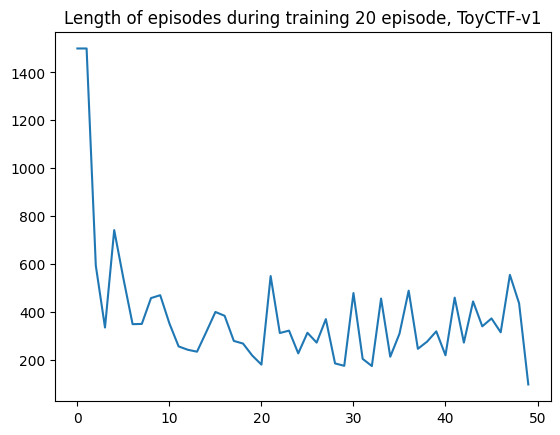

In [31]:
plt.plot([len(episodes)  for episodes in dql_run['all_episodes_availability']])
plt.title("Length of episodes during training 20 episode, ToyCTF-v1")
plt.show()

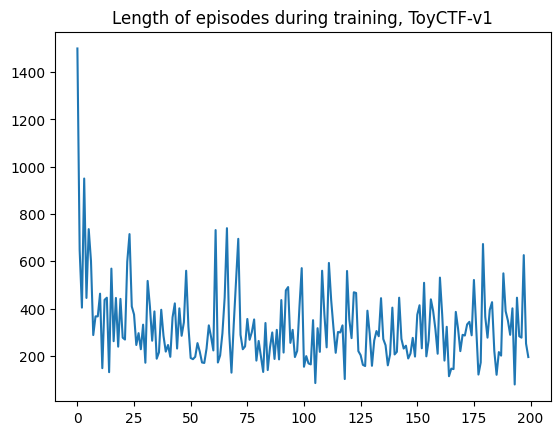

In [32]:
plt.plot([len(episodes)  for episodes in dql_run_200['all_episodes_availability']])
plt.title("Length of episodes during training, ToyCTF-v1")
plt.show()

In [39]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

wrapped_env = AgentWrapper(gym_env,
                           ActionTrackingStateAugmentation(ep, gym_env.reset()))

learners = {'dql for 1000 episodes': dql_run_1000['learner'], 'dql for 20 episodes': dql_run['learner'], 'dql for 200 episodes': dql_run_200['learner']}
 #copy.deepcopy(dql_exploit_run['learner'])
obs = []
h = []
n=20 

render = True
for name, learner_m in learners.items():
    rewards = []
    for i_episode in range(n):
        observation = wrapped_env.reset()
        #learner.new_episode()
        obs.append(observation['action_mask']['local_vulnerability'])
        a = observation['action_mask']
        total_reward = 0

        for t in range(1000):
            action_style, gym_action, action_metadata  = learner_m.exploit(wrapped_env, observation) ## gym action
            if render and i_episode == n-1: print(gym_action)
            if not gym_action:
                _, gym_action, action_metadata = learner_m.explore(wrapped_env)

            observation, reward, done, info = wrapped_env.step(gym_action)

            #print(info)
            #learner.on_step(wrapped_env, observation, reward, done, info, action_metadata)
            #learner.end_of_iteration(t, done)

            total_reward += reward

            h.append((gym_env.get_explored_network_node_properties_bitmap_as_numpy(observation), gym_action))
            #print(h[-1])
            if gym_action is None:
                break

            if render and i_episode == n-1 and reward>0:
                print('####### rewarded action: {action}')
                print(f'total_reward={total_reward} reward={reward}')
                wrapped_env.render()

            if done:  ####### If AttackerGoal is not NONE or all 0
                print("Episode finished after {} timesteps".format(t+1))
                break
        rewards += [total_reward]

        if done: wrapped_env.render()

    wrapped_env.close()
    plt.plot(rewards, label=name)
print("simulation ended")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_31315/2377501929.py", line 16, in <module>
    learners = {'dql for 1000 episodes': dql_run_1000['learner'], 'dql for 20 episodes': dql_run['learner'], 'dql for 200 episodes': dql_run_200['learner']}
NameError: name 'dql_run_1000' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1006, in structured_traceback
    return

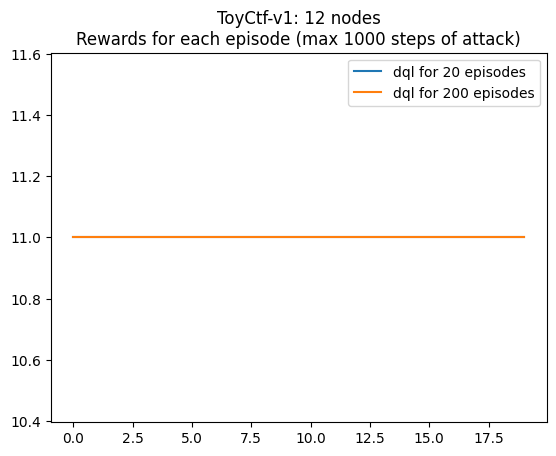

In [38]:
plt.title("ToyCtf-v1: 12 nodes\nRewards for each episode (max 1000 steps of attack)")
plt.legend()
plt.show()

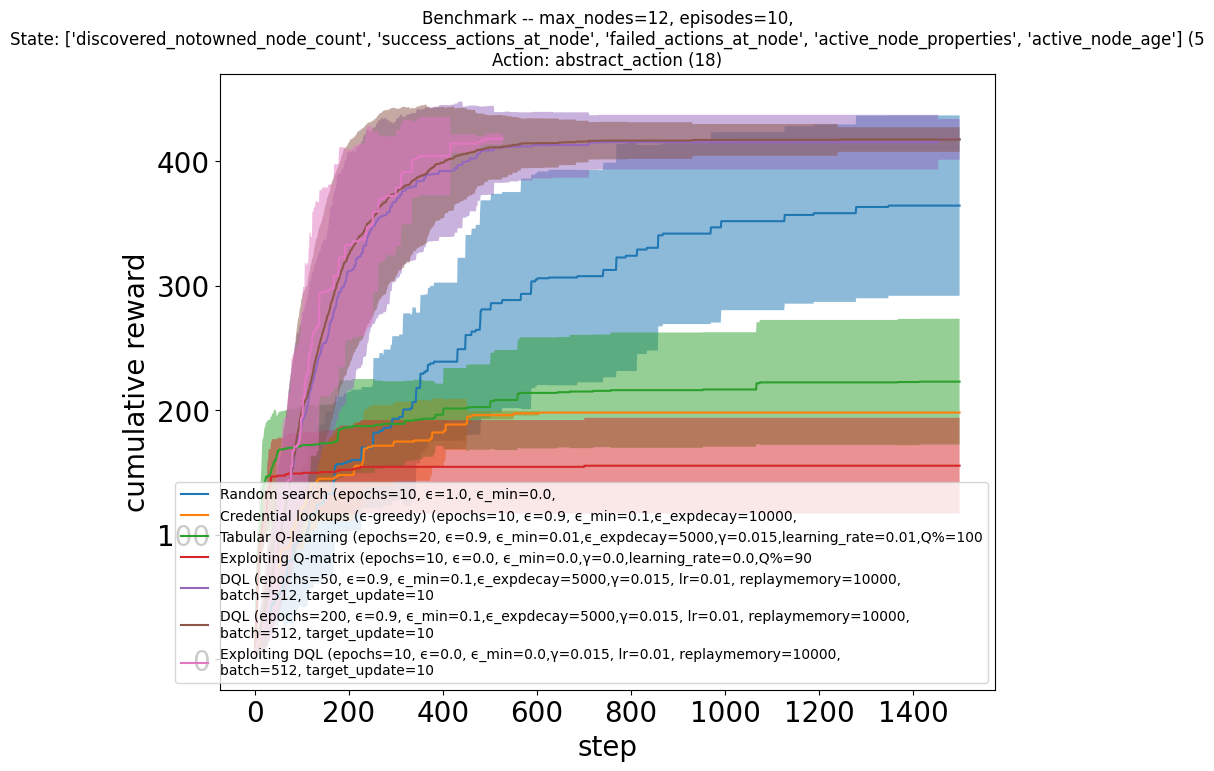

In [35]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_run_200,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

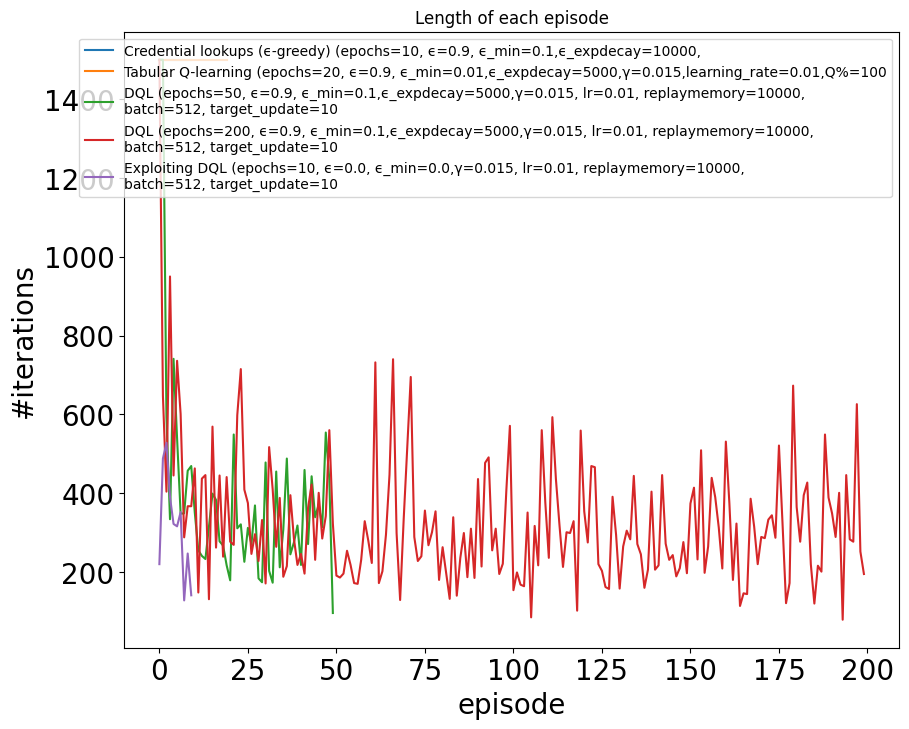

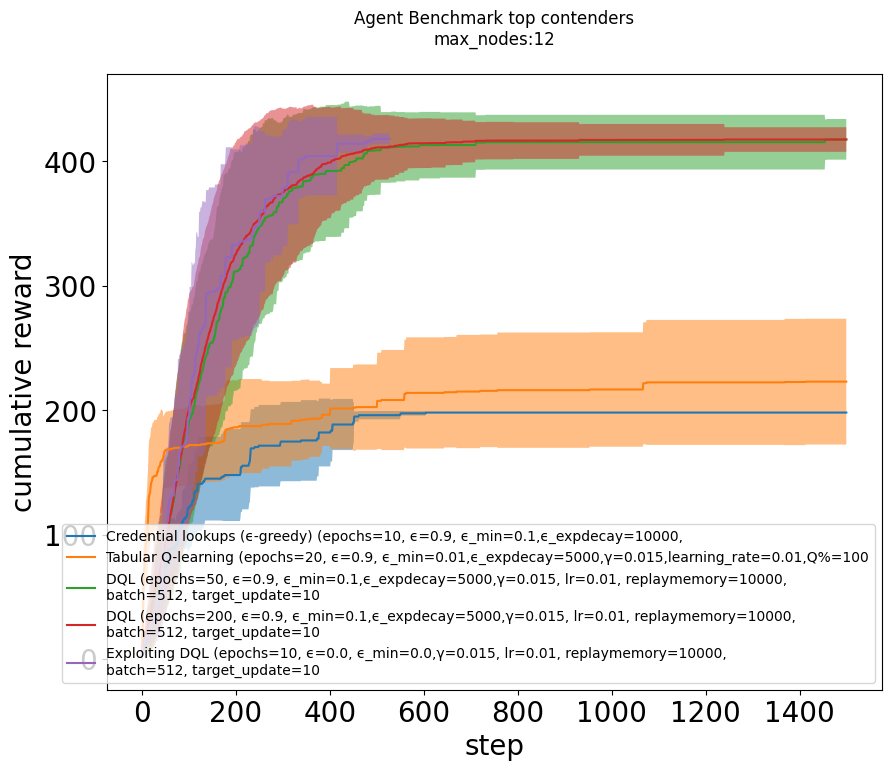

In [36]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_run_200,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

### Before PR

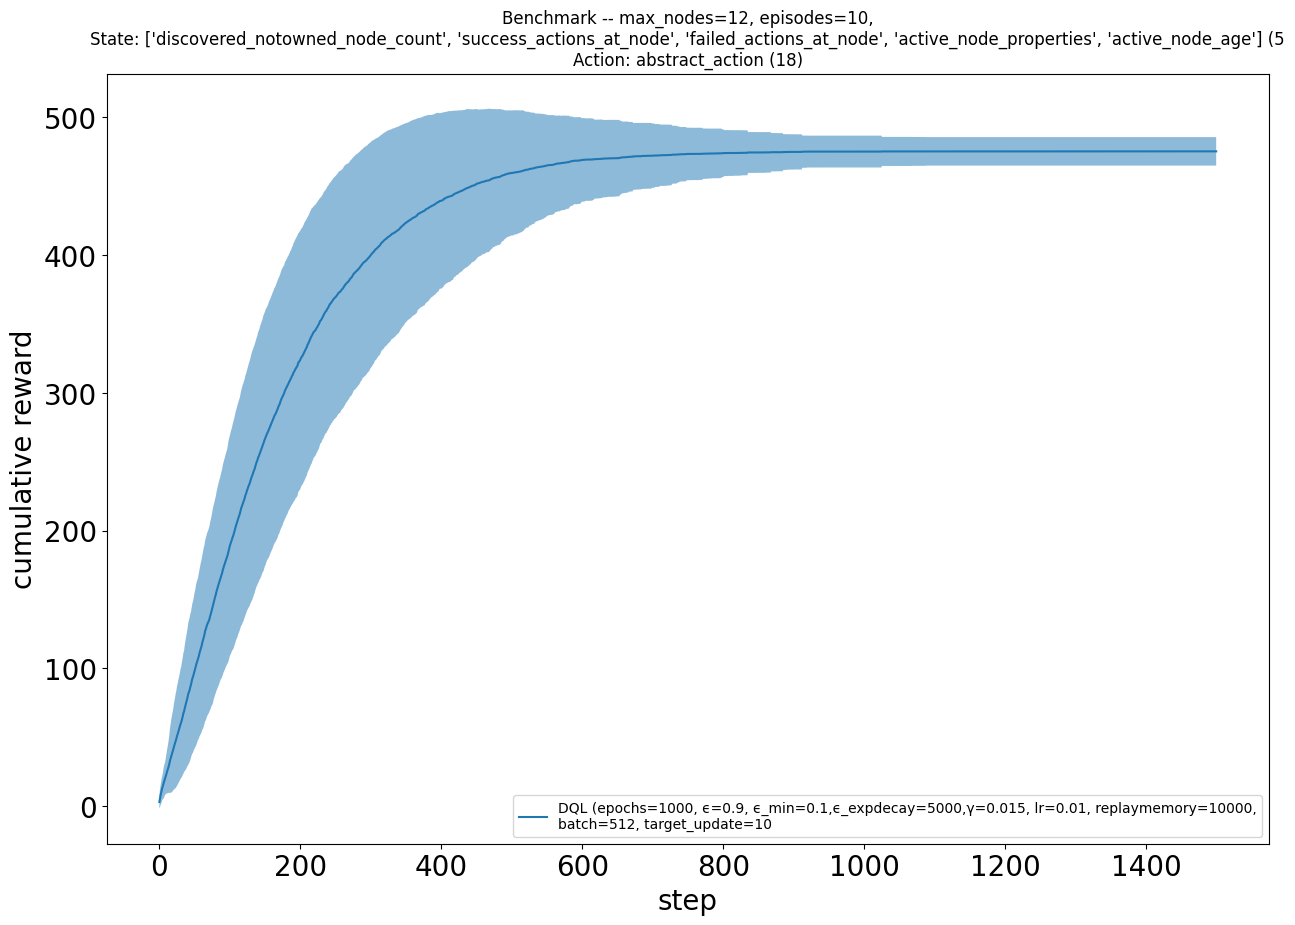

In [13]:
# Compare and plot results for all the agents
all_runs = [
    #random_run,
    #credlookup_run,
    #tabularq_run,
    #tabularq_exploit_run,
    dql_run,
    #dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
from matplotlib import pyplot as plt

themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})", 
    figsize = (15, 10))

In [ ]:
##### dumb all_runs for further usage

os.makedirs(logs_dir, exist_ok=True)
with open(os.path.join(logs_dir, "all_runs.pkl"), "wb") as f:
    pkl.dump(all_runs, f)

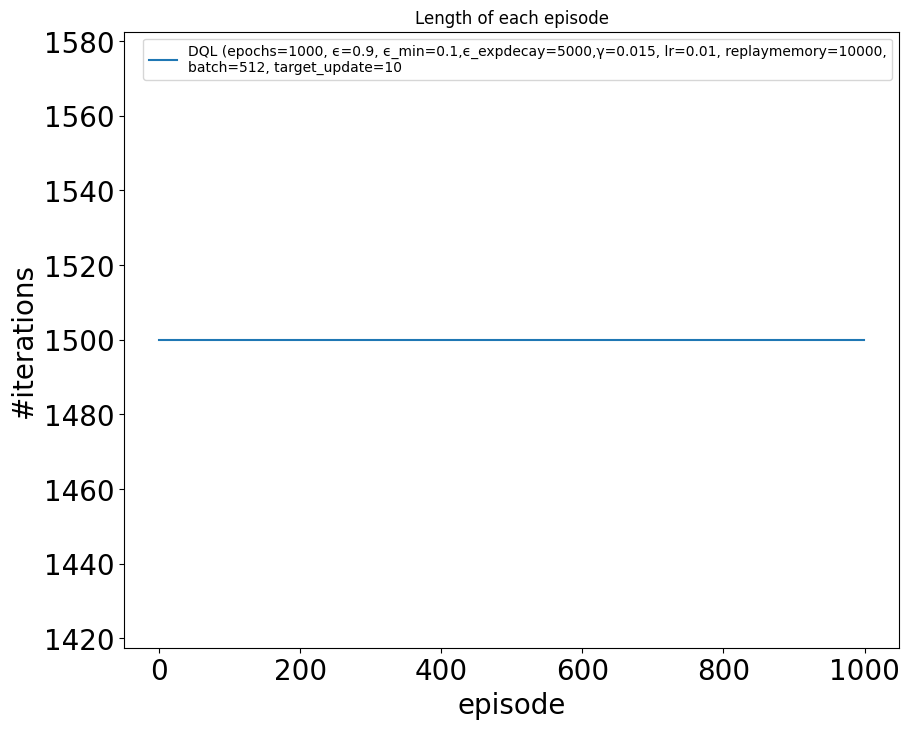

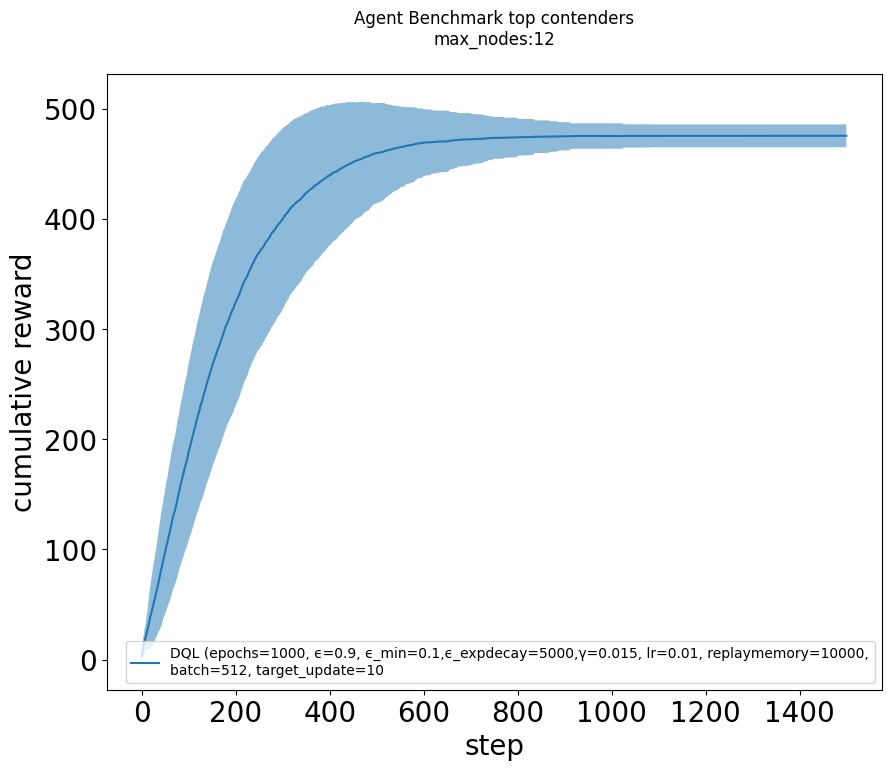

In [8]:
contenders = [
    #credlookup_run,
    #tabularq_run,
    dql_run,
    #dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

In [ ]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)